In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Spotify Most Streamed Songs.csv to Spotify Most Streamed Songs.csv


In [ ]:
df=pd.read_csv('Spotify Most Streamed Songs.csv')
df

track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
4             2023               5            18                  3133   
..             ...             ...           ...                   ...   
948           2022              11             3                   953   
949           2022              10            21                  1180   
950           2022              11             3                   573   
951           2022              10            20                  1320   
952           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...  key   mode  \
0                  147  141381703                  43  ...    B  Major   
1                   48  133716286                  48  ...   C#  Major   
2                  113  140003974                  94  ...    F  Major   
3                  100  800840817                 116  ...    A  Major   
4                   50  303236322                  84  ...    A  Minor   
..                 ...        ...                 ...  ...  ...    ...   
948                  0   91473363                  61  ...    A  Major   
949                  0  121871870                   4  ...   F#  Major   
950                  0   73513683                   2  ...   C#  Major   
951                  0  133895612                  29  ...   C#  Major   
952                  2   96007391                  27  ...    E  Minor   

     danceability_% valence_%  energy_% acousticness_% instrumentalness_%  \
0                80        89        83             31                  0   
1                71        61        74              7                  0   
2                51        32        53             17                  0   
3                55        58        72             11                  0   
4                65        23        80             14                 63   
..              ...       ...       ...            ...                ...   
948              60        24        39             57                  0   
949              42         7        24             83                  1   
950              80        81        67              4                  0   
951              82        67        77              8                  0   
952              61        32        67             15                  0   

     liveness_%  speechiness_%  \
0             8              4   
1            10              4   
2            31              6   
3            11             15   
4            11              6   
..          ...            ...   
948           8              3   
949          12              6   
950           8              6   
951          12              5   
952          11 

# **DATA PREPROCESSING**

In [ ]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
# Compute the mode safely
if not df['key'].mode().empty:
    key_mode = df['key'].mode()[0]  # Safely get the most frequent value
else:
    key_mode = 0  # Fallback to a default value if mode is empty

# Replace NaN with the mode or fallback
df['key'].fillna(key_mode, inplace=True)

# Verify if missing values are handled
null_counts_after_mode_fix = df['key'].isnull().sum()
print(f"Remaining missing values in 'key': {null_counts_after_mode_fix}")

Remaining missing values in 'key': 0


<ipython-input-9-2f28dc0f08af>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['key'].fillna(key_mode, inplace=True)


In [ ]:
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

# Replace missing values in 'key' and 'in_shazam_charts' with their respective means
df['in_shazam_charts'].fillna(df['in_shazam_charts'].mean(), inplace=True)

# Verify if null values are replaced
null_counts = df[['key', 'in_shazam_charts']].isnull().sum()
print(null_counts)

key                 0
in_shazam_charts    0
dtype: int64


<ipython-input-10-dc94fef6b600>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['in_shazam_charts'].fillna(df['in_shazam_charts'].mean(), inplace=True)


In [ ]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
cover_url               0
dtype: int64

In [ ]:
df.shape

(953, 25)

In [ ]:
df.describe()

artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000           0.000000           13.000000   
50%             2224.000000           3.000000           34.000000   
75%             5542.000000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_charts  in_shazam_charts         bpm  \
count       953.000000        953.000000        953.000000  953.000000   
mean         51.908709          2.666317         51.176339  122.540399   
std          50.630241          6.035599        122.642749   28.057802   
min           0.000000          0.000000          0.000000   65.000000   
25%           7.000000          0.000000          0.000000  100.000000   
50%          38.000000          0.000000          4.000000  121.000000   
75%          87.000000          2.000000         51.176339  140.000000   
max         275.000000         58.000000        953.000000  206.000000   

       danceability_%   valence_%    energy_%  acousticness_%  \
count       953.00000  953.000000  953.000000      953.000000   
mean         66.96957   51.431270   64.279119       27.057712   
std          14.63061   23.480632   16.550526       25.996077   
min          23.00000    4.000000    9.000000        0.000000   
25%          57.00000   32.000000   53.000000        6.000000   
50%          69.00000   51.000000   66.000000       18.000000   
75%          78.00000   70.000000   77.000000       43.000000   
max          96.00000   97.000000   97.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  
count          953.000000  953.000000     953.000000  
mean             1.581322   18.213012      10.131165  
std              8.409800   13.711223       9.912888  
min              0.000000    3.000000       2.000000  
25%              0.000000   10.000000       4.000000  
50%              0.000000   12.000000       6.000000  
75%              0.000000   24.000000      11.000000  
max             91.000000   97.000000      64.000000

In [ ]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')

In [ ]:
df['mode'] = df['mode'].map({'Minor': 0, 'Major': 1})

In [ ]:
# Convert 'streams' column to numeric, handling errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Replace any remaining non-numeric values with NaN
df['streams'] = df['streams'].fillna(df['streams'].mean())

# Now, calculate the quantiles
low_threshold = df['streams'].quantile(0.33)
moderate_threshold = df['streams'].quantile(0.66)
max_value = df['streams'].max()

# Define the bins and labels
bins = [0, low_threshold, moderate_threshold, max_value]
labels = ['Low Popular', 'Moderately Popular', 'Highly Popular']

# Create the 'popular_category' variable using pd.cut
df['popular_category1'] = pd.cut(
    df['streams'],
    bins=bins,
    labels=labels,
    include_lowest=True
)



# Display the distribution of the new variable
popular_category_distribution = df['popular_category1'].value_counts()

popular_category_distribution

popular_category1
Highly Popular        324
Low Popular           315
Moderately Popular    314
Name: count, dtype: int64

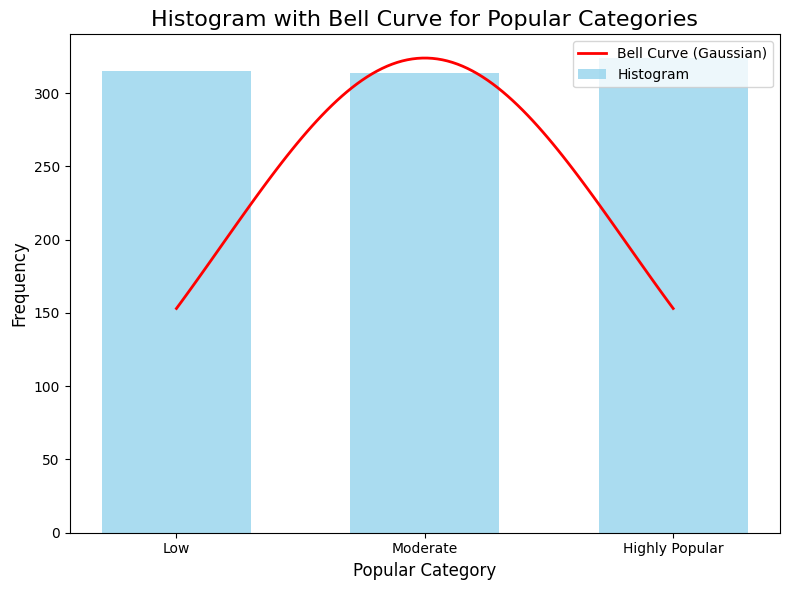

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Calculate the frequencies of each category
category_counts = df['popular_category1'].value_counts(sort=False)

# Create x-coordinates for the categories
categories = np.arange(len(category_counts))

# Generate data for a Gaussian curve
mean = np.mean(categories)
std_dev = np.std(categories)
x = np.linspace(min(categories), max(categories), 100)  # Create x-axis points
y = norm.pdf(x, mean, std_dev)  # Generate the Gaussian (bell curve)

# Normalize the bell curve to match histogram scale
y = y / y.max() * category_counts.max()

# Plot the histogram for 'popular_category'
plt.figure(figsize=(8, 6))
plt.bar(categories, category_counts.values, width=0.6, alpha=0.7, label='Histogram', color='skyblue')

# Plot the bell curve
plt.plot(x, y, color='red', label='Bell Curve (Gaussian)', linewidth=2)

# Add title and labels
plt.title('Histogram with Bell Curve for Popular Categories', fontsize=16)
plt.xlabel('Popular Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Update the x-ticks with category labels
plt.xticks(ticks=categories, labels=['Low', 'Moderate', 'Highly Popular'])

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df['popular_category1'] = df['popular_category1'].map({'Low Popular': 0, 'Moderately Popular': 1,'Highly Popular':2})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   track_name            953 non-null    object  
 1   artist(s)_name        953 non-null    object  
 2   artist_count          953 non-null    int64   
 3   released_year         953 non-null    int64   
 4   released_month        953 non-null    int64   
 5   released_day          953 non-null    int64   
 6   in_spotify_playlists  953 non-null    int64   
 7   in_spotify_charts     953 non-null    int64   
 8   streams               953 non-null    float64 
 9   in_apple_playlists    953 non-null    int64   
 10  in_apple_charts       953 non-null    int64   
 11  in_deezer_playlists   953 non-null    object  
 12  in_deezer_charts      953 non-null    int64   
 13  in_shazam_charts      953 non-null    float64 
 14  bpm                   953 non-null    int64   
 15  key   

In [ ]:
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce').fillna(0).astype(int)
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce').fillna(0).astype(int)

In [ ]:
df['popular_category1'] = df['popular_category1'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    int64  
 14  bpm                   953 non-null    int64  
 15  key                   9

In [ ]:
df.drop(columns=['cover_url'], inplace=True)

In [ ]:
df['key'] = pd.Categorical(df['key']).codes
df['key']

0      2
1      3
2      7
3      0
4      0
      ..
948    0
949    8
950    3
951    3
952    6
Name: key, Length: 953, dtype: int8

In [ ]:
artist_mapping = {artist: idx for idx, artist in enumerate(df['artist(s)_name'].unique())}
track_mapping = {track: idx for idx, track in enumerate(df['track_name'].unique())}

# Map the original columns to their integer representations
df['artist_id'] = df['artist(s)_name'].map(artist_mapping)
df['track_id'] = df['track_name'].map(track_mapping)

# Drop the original columns if they are no longer need

# Verify that all columns are now numeric
all_numeric = df.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))
numeric_summary = all_numeric.value_counts()

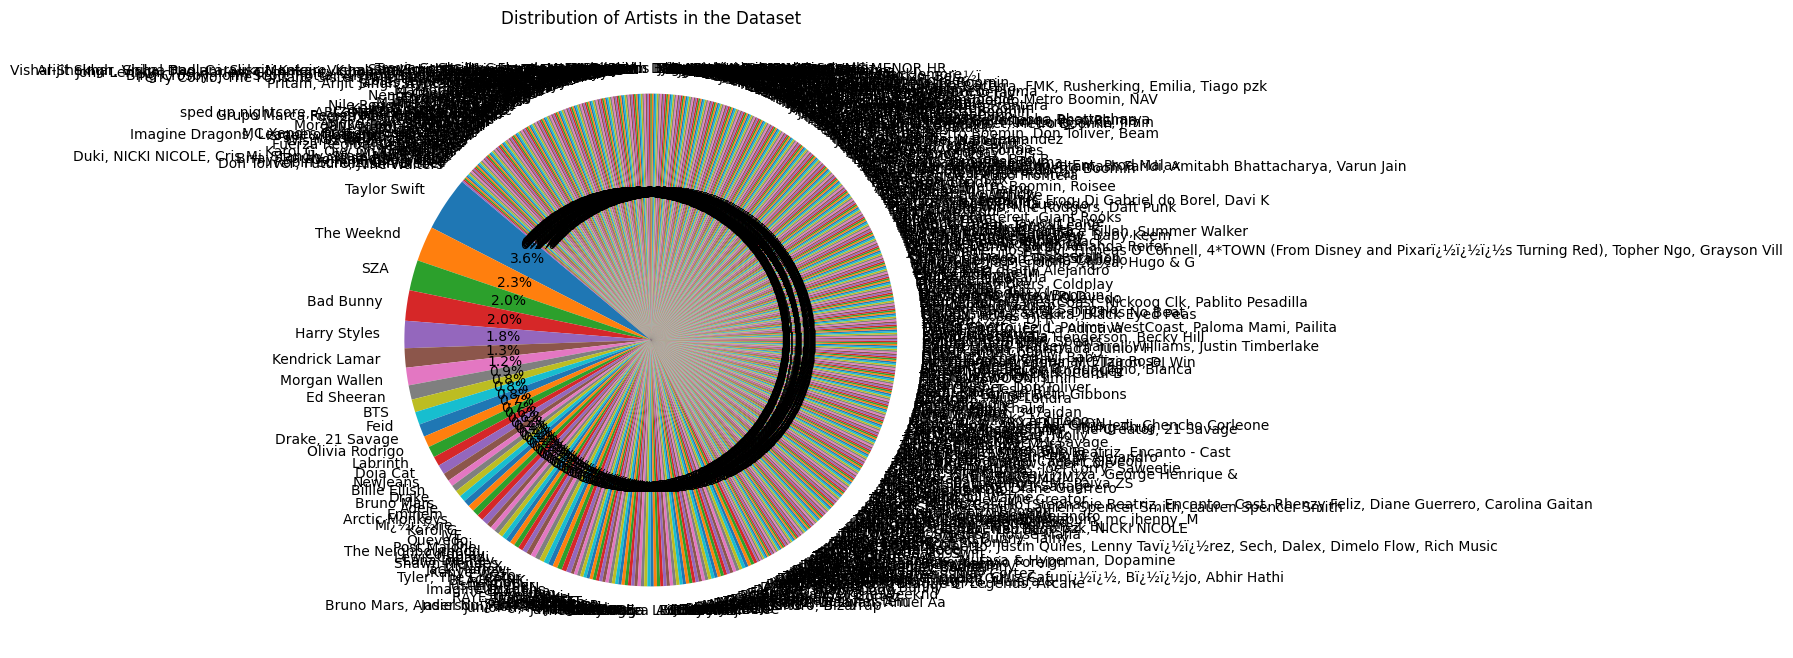

In [ ]:
artist_counts = df['artist(s)_name'].value_counts()

# Pie chart
plt.figure(figsize=(10, 8))  # Set the figure size
plt.pie(
    artist_counts,
    labels=artist_counts.index,
    autopct='%1.1f%%',  # Display percentages
    startangle=140  # Start angle for better visualization
)

# Title of the pie chart
plt.title('Distribution of Artists in the Dataset')

# Display the plot
plt.show()

In [ ]:
df['artist_id']

0        0
1        1
2        2
3        3
4        4
      ... 
948    642
949      3
950    643
951    644
952    605
Name: artist_id, Length: 953, dtype: int64

In [ ]:
df.iloc[:,7].value_counts()

in_spotify_charts
0     405
4      48
2      42
6      36
3      18
     ... 
66      1
88      1
58      1
62      1
63      1
Name: count, Length: 82, dtype: int64

In [ ]:
for i in range(df.shape[1]):
  print(df.iloc[:,i].unique())
  print(df.iloc[:,i].value_counts())

['Seven (feat. Latto) (Explicit Ver.)' 'LALA' 'vampire' 'Cruel Summer'
 'WHERE SHE GOES' 'Sprinter' 'Ella Baila Sola' 'Columbia' 'fukumean'
 'La Bebe - Remix' 'un x100to' 'Super Shy' 'Flowers' 'Daylight'
 'As It Was' 'Kill Bill' 'Cupid - Twin Ver.'
 'What Was I Made For? [From The Motion Picture "Barbie"]' 'Classy 101'
 'Like Crazy' 'LADY GAGA'
 'I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From The ' 'I Wanna Be Yours'
 'Peso Pluma: Bzrp Music Sessions, Vol. 55'
 'Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series)'
 'SABOR FRESA' 'Calm Down (with Selena Gomez)' 'MOJABI GHOST' 'Last Night'
 'Dance The Night (From Barbie The Album)' 'Rush' 'TULUM' "Creepin'"
 'Anti-Hero' 'TQG' 'Los del Espacio' 'Frï¿½ï¿½gil (feat. Grupo Front'
 'Blank Space' 'Style' 'TQM' 'El Azul'
 'Sunflower - Spider-Man: Into the Spider-Verse' "I'm Good (Blue)"
 'See You Again' 'Barbie World (with Aqua) [From Barbie The Album]'
 'Angels Like You' "I Ain't Worried" 'Die For You'

In [ ]:
df.iloc[:,7].value_counts()

in_spotify_charts
0     405
4      48
2      42
6      36
3      18
     ... 
66      1
88      1
58      1
62      1
63      1
Name: count, Length: 82, dtype: int64

In [ ]:
for i in range(df.shape[1]):
  print(df.iloc[:,i].value_counts())

track_name
About Damn Time       2
Miss You              2
SPIT IN MY FACE!      2
Daylight              2
Die For You           2
                     ..
Gangsta's Paradise    1
CAIRO                 1
I Love You So         1
Dark Red              1
Leï¿½                 1
Name: count, Length: 943, dtype: int64
artist(s)_name
Taylor Swift                          34
The Weeknd                            22
SZA                                   19
Bad Bunny                             19
Harry Styles                          17
                                      ..
Gorillaz, Bad Bunny                    1
j-hope, J. Cole                        1
Robin Schulz, Oliver Tree              1
Don Toliver, Future, Justin Bieber     1
The Walters                            1
Name: count, Length: 645, dtype: int64
artist_count
1    587
2    254
3     85
4     15
5      5
6      3
8      2
7      2
Name: count, dtype: int64
released_year
2022    402
2023    175
2021    119
2020     37
2019    

In [ ]:
print(df)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    int64  
 14  bpm                   953 non-null    int64  
 15  key                   9

# **DATA VISUALIZATION**

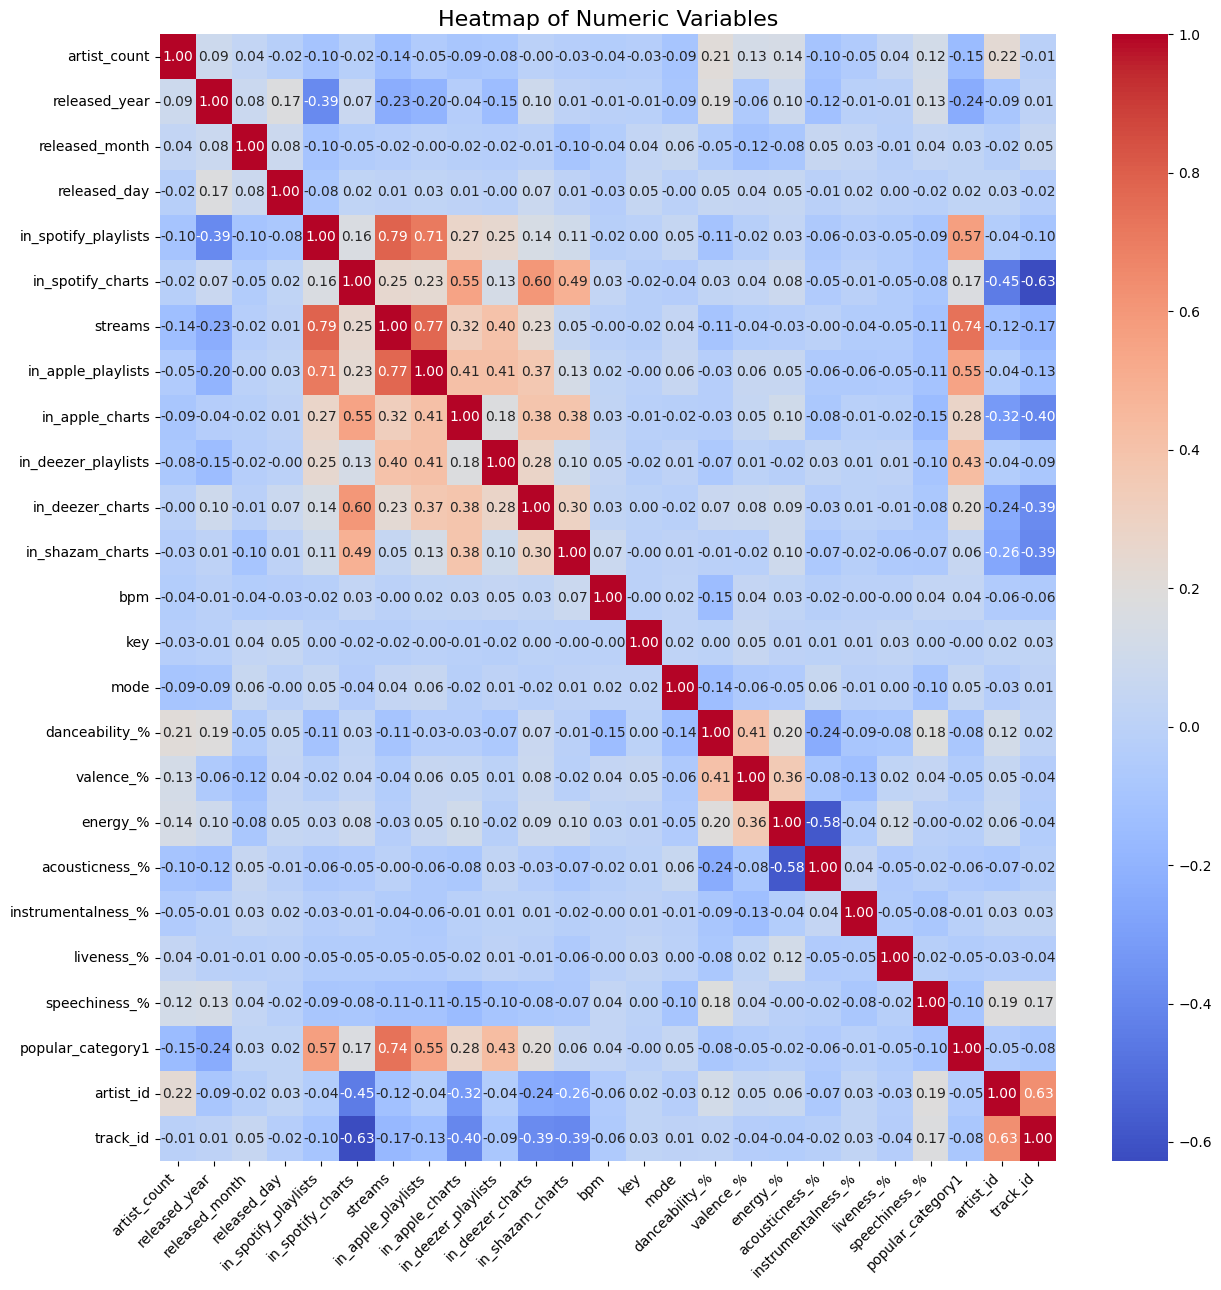

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only columns with integer and float data types for the heatmap
numeric_data = df.select_dtypes(include=['int64', 'float64','int8'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Generate the heatmap
plt.figure(figsize=(13, 13))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Add title and labels
plt.title('Heatmap of Numeric Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

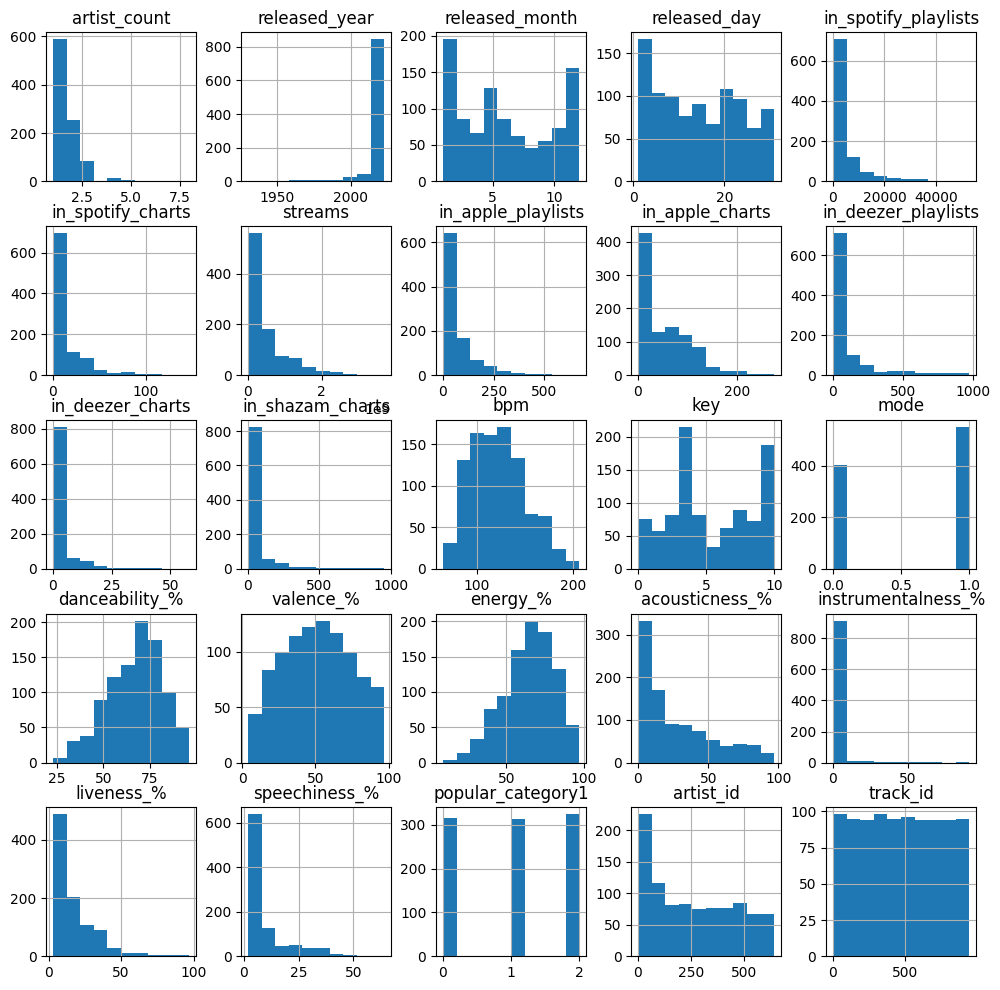

In [ ]:
df.hist(figsize=(12, 12))
plt.show()

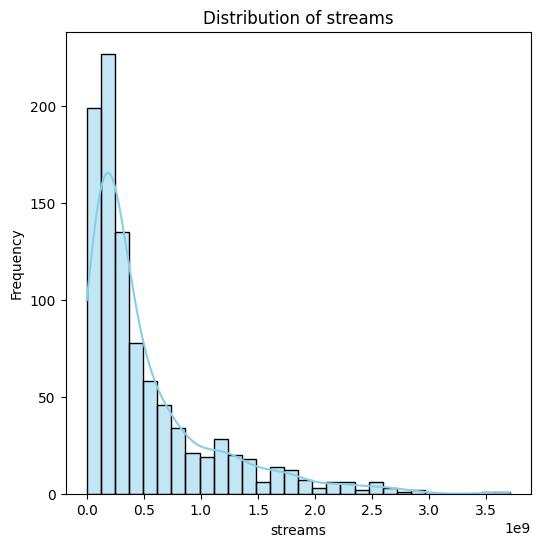

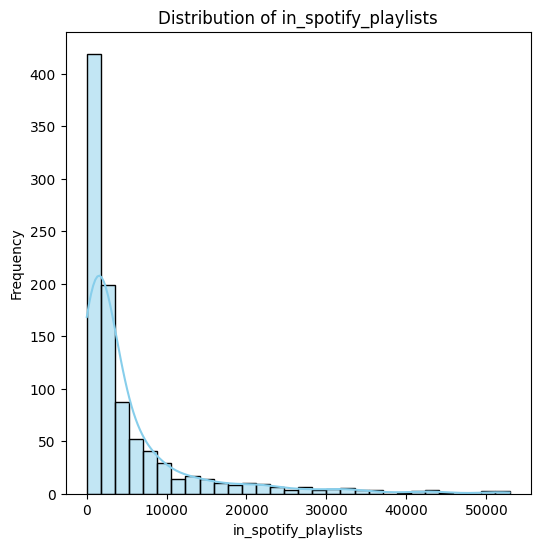

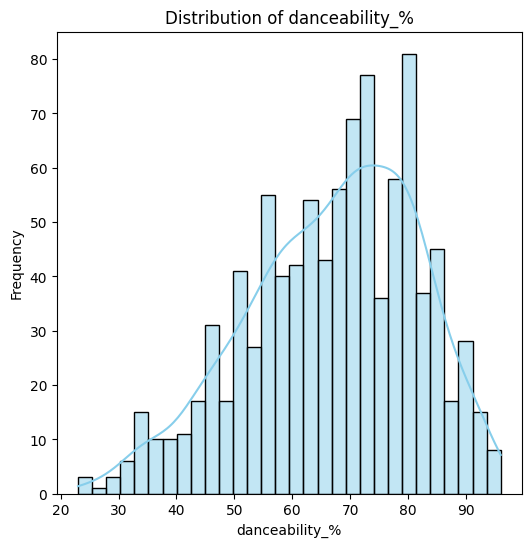

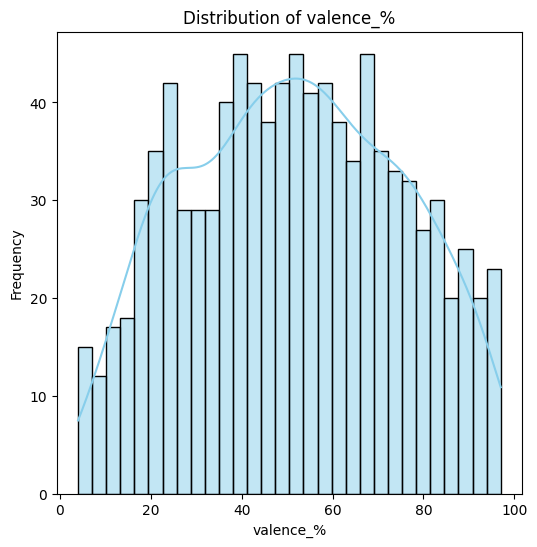

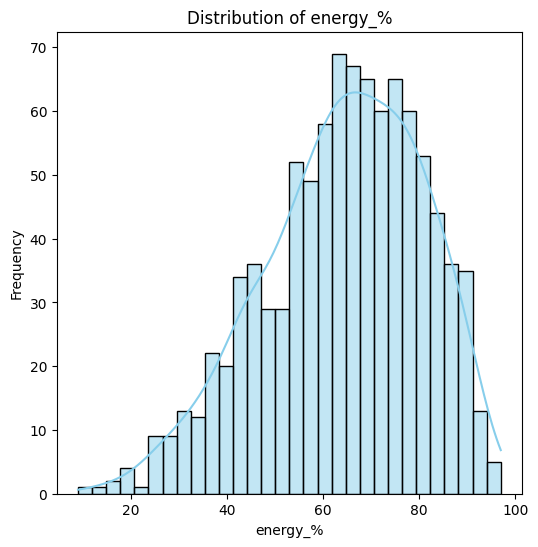

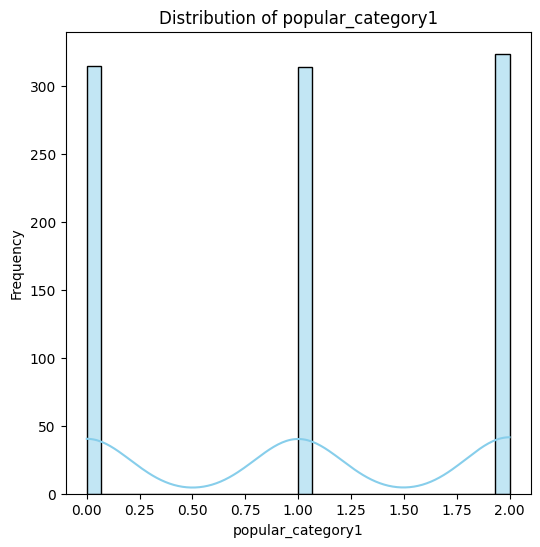

In [ ]:
numerical_vars = ['streams', 'in_spotify_playlists', 'danceability_%', 'valence_%', 'energy_%','popular_category1']

# Plot histograms for each numerical variable
for var in numerical_vars:
    plt.figure(figsize=(6, 6))
    sns.histplot(df[var], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

<ipython-input-39-4f27386ec0fd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(data=df, x=var, palette='viridis', order=year_order)


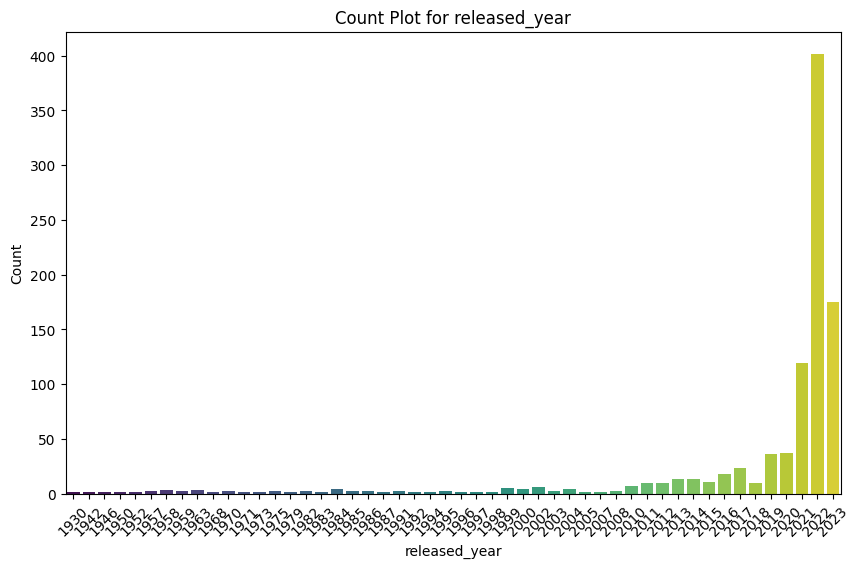

<ipython-input-39-4f27386ec0fd>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(data=df, x=var, palette='viridis', order=month_order)
<ipython-input-39-4f27386ec0fd>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  countplot.set_xticklabels(month_labels)  # Set month names as labels


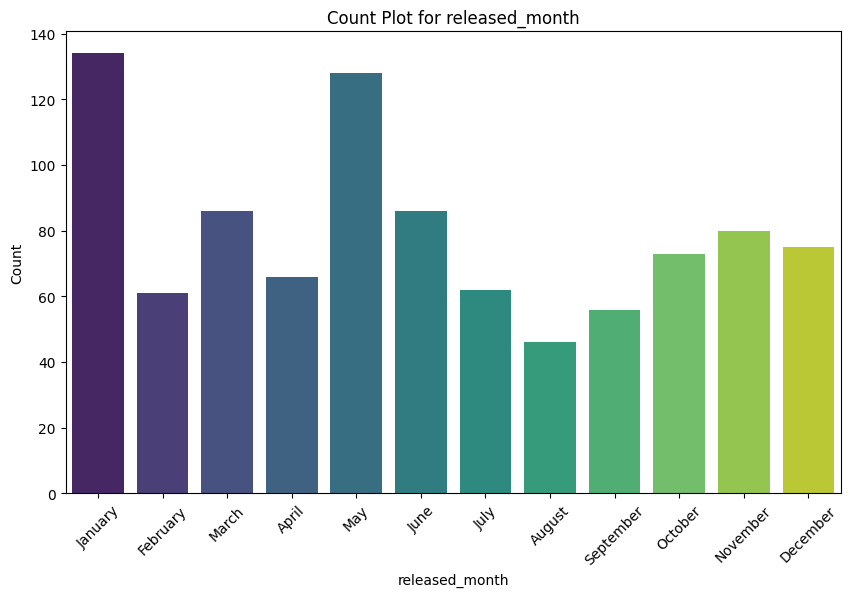

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of months in correct order
month_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_labels = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Get sorted unique years for chronological order
year_order = sorted(df['released_year'].unique())

# Plot count plots for each categorical variable
categorical_vars = ['released_year', 'released_month']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))

    if var == 'released_month':
        # Plot with month order and proper labels
        countplot = sns.countplot(data=df, x=var, palette='viridis', order=month_order)
        countplot.set_xticklabels(month_labels)  # Set month names as labels
    elif var == 'released_year':
        # Plot with year order
        countplot = sns.countplot(data=df, x=var, palette='viridis', order=year_order)
    else:
        # General case for categorical variables
        # Changed 'sdf' to 'df' to reference the DataFrame
        countplot = sns.countplot(data=df, x=var, palette='viridis', order=df[var].value_counts().index)


    plt.title(f"Count Plot for {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

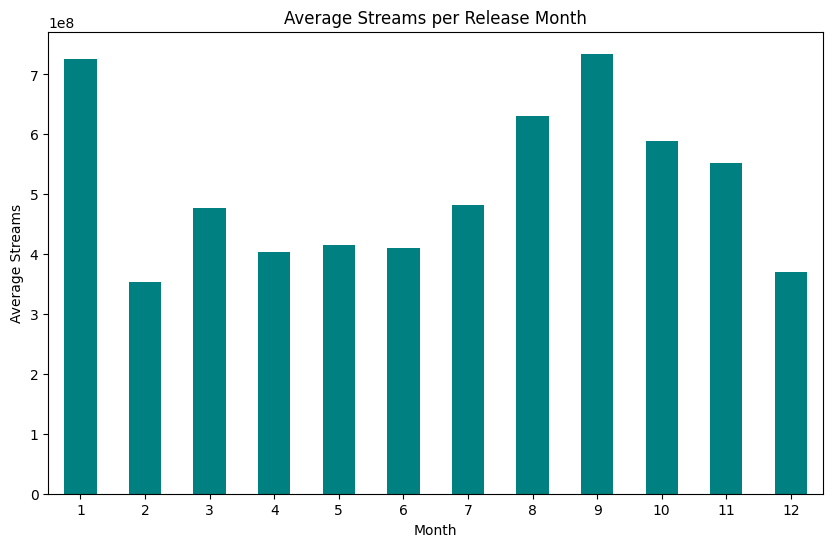

In [ ]:
avg_streams_per_month = df.groupby('released_month')['streams'].mean().sort_index()
plt.figure(figsize=(10, 6))
avg_streams_per_month.plot(kind='bar', color='teal')
plt.title("Average Streams per Release Month")
plt.xlabel("Month")
plt.ylabel("Average Streams")
plt.xticks(rotation=0)
plt.show()

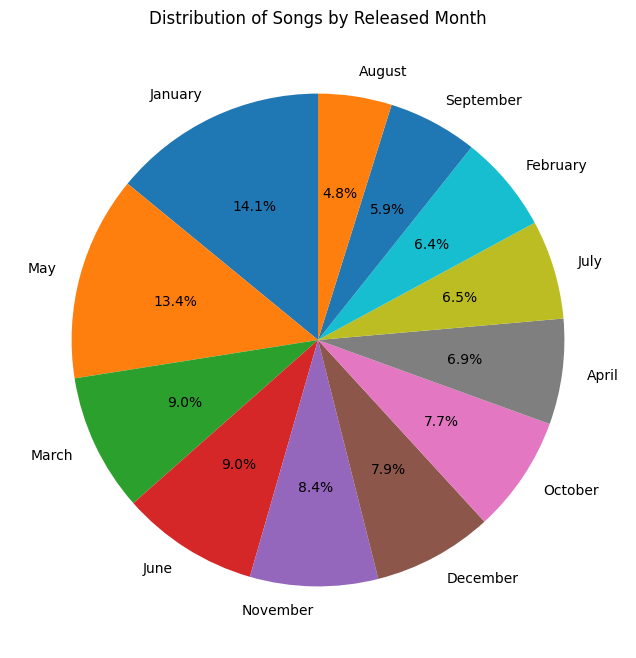

In [ ]:
month_counts = df['released_month'].value_counts()

# Map month numbers to names
month_labels = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
month_counts.index = month_counts.index.map(lambda x: month_labels[x - 1])
plt.figure(figsize=(8, 8))
plt.pie(month_counts,labels=month_counts.index,  autopct='%1.1f%%',startangle=90)
plt.title("Distribution of Songs by Released Month")
plt.show()

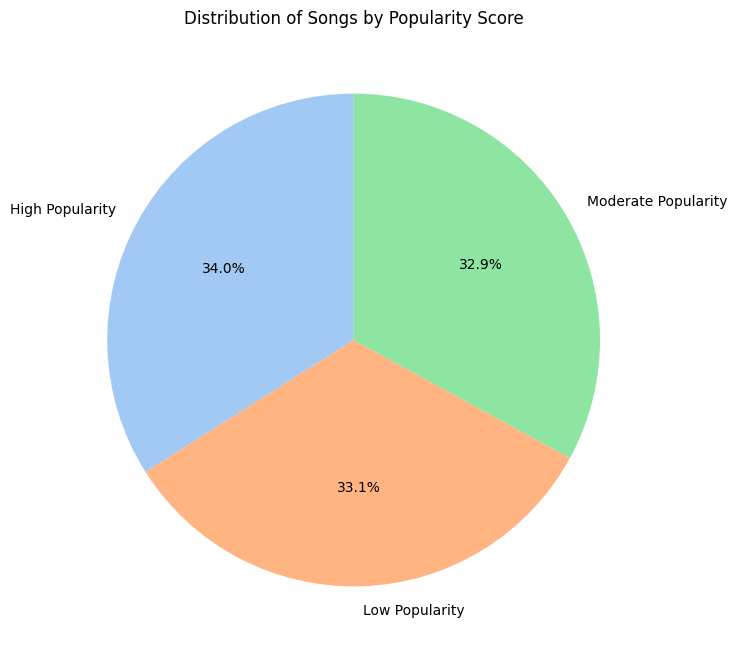

In [ ]:
# Define the mapping for labels
popularity_labels = {0: 'Low Popularity', 1: 'Moderate Popularity', 2: 'High Popularity'}

# Count the number of songs in each popularity category
popularity_counts = df['popular_category1'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    popularity_counts,
    labels=[popularity_labels[idx] for idx in popularity_counts.index],  # Map labels directly
    autopct='%1.1f%%',                                                   # Show percentages
    startangle=90,                                                       # Rotate for better aesthetics
    colors=sns.color_palette('pastel', len(popularity_counts))           # Use pastel colors for better aesthetics
)
plt.title("Distribution of Songs by Popularity Score")
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    int64  
 14  bpm                   953 non-null    int64  
 15  key                   9

In [ ]:
df.drop(columns=['popularity_label','popularity_labels'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    int64  
 14  bpm                   953 non-null    int64  
 15  key                   9

<ipython-input-56-bdeff437484f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='released_month', y='danceability_%', palette='coolwarm')


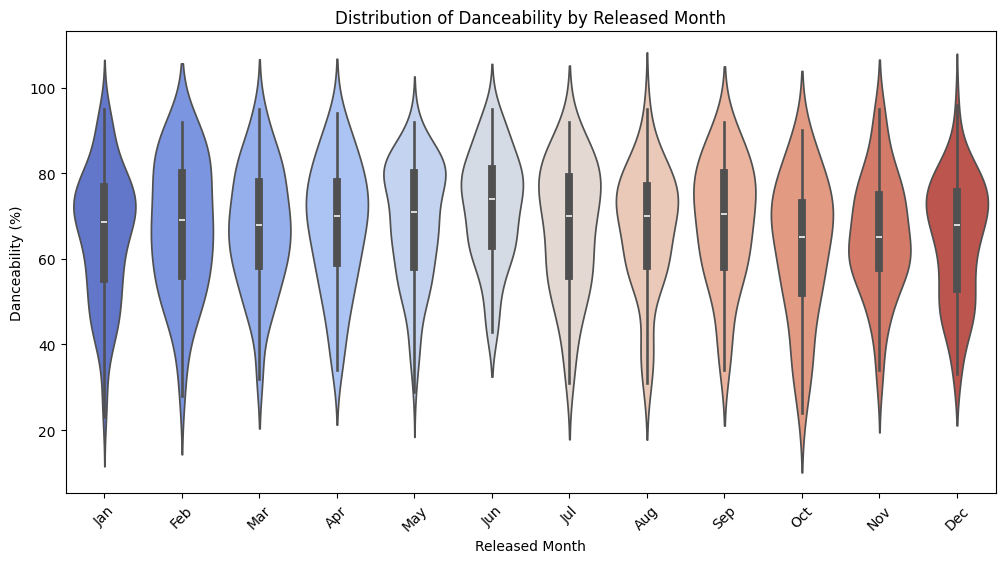

In [ ]:
# Violin plot for danceability across released_month
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='released_month', y='danceability_%', palette='coolwarm')
plt.title("Distribution of Danceability by Released Month")
plt.xlabel("Released Month")
plt.ylabel("Danceability (%)")
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

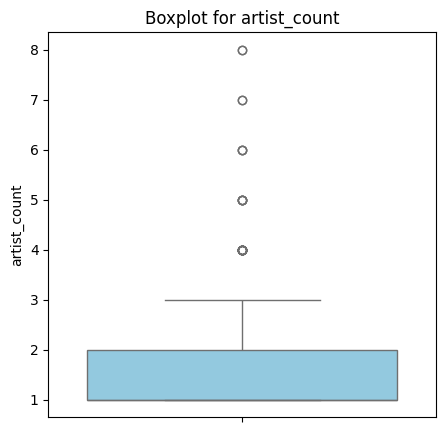

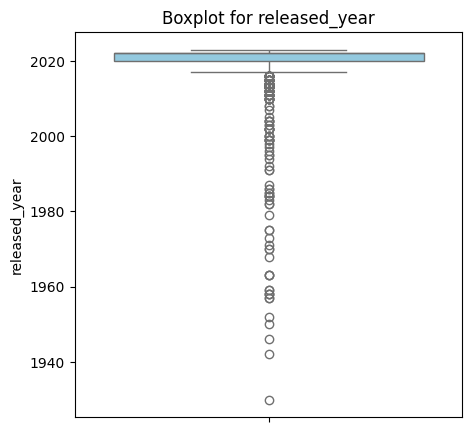

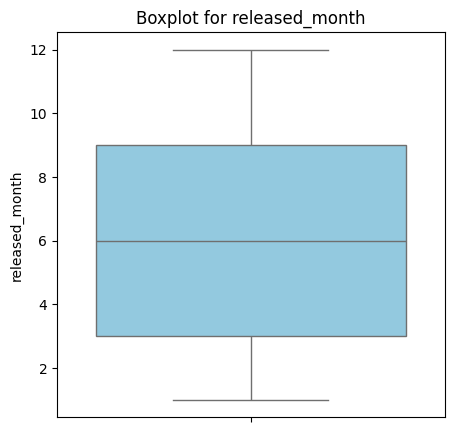

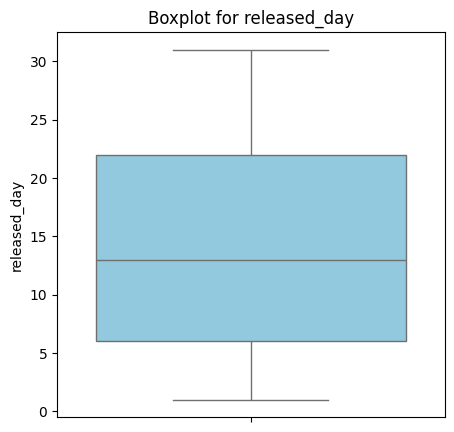

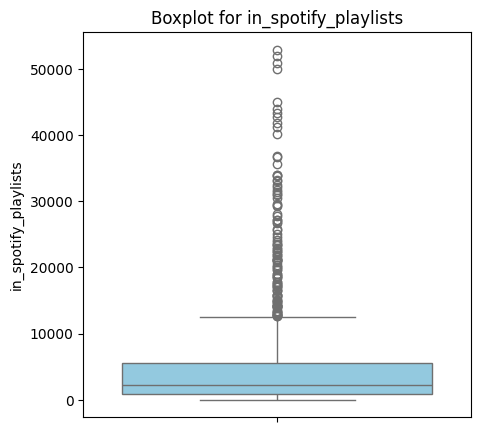

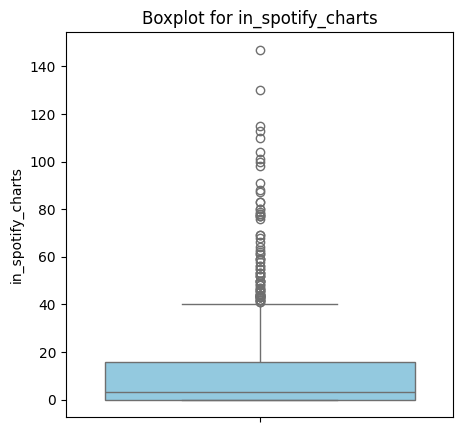

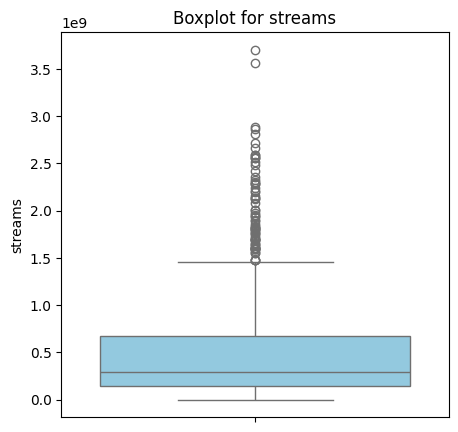

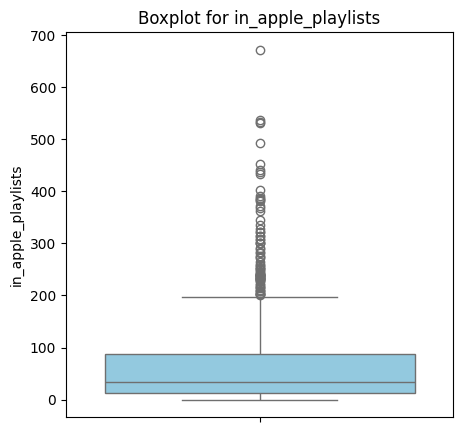

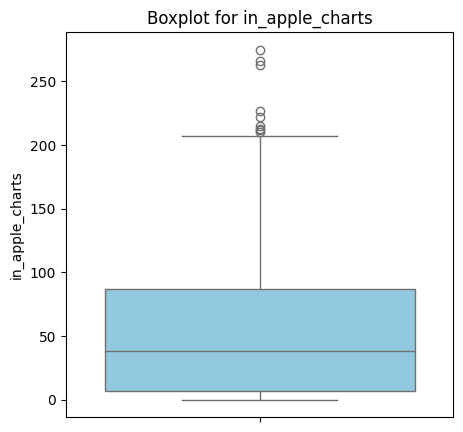

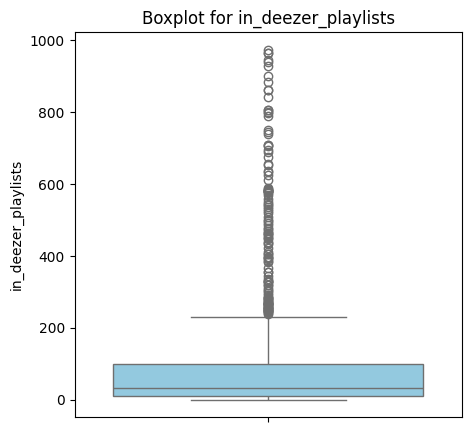

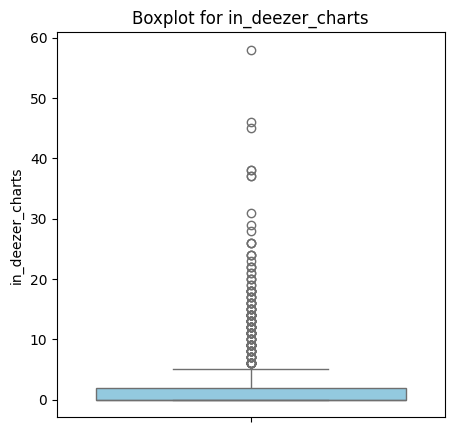

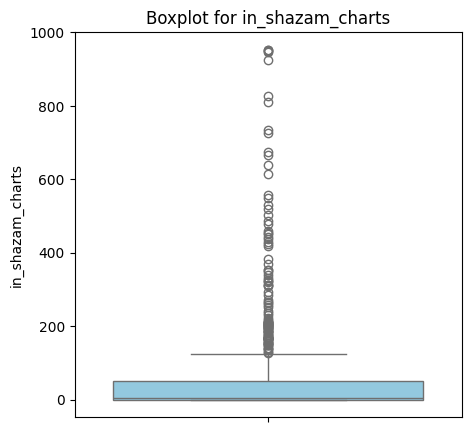

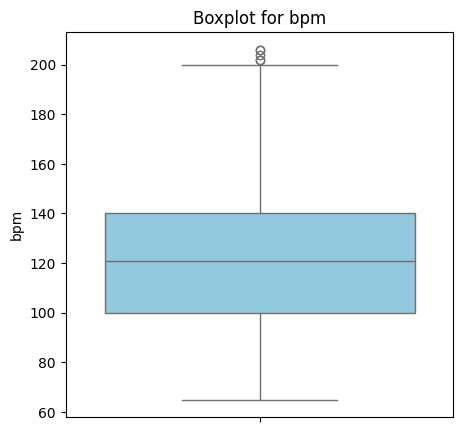

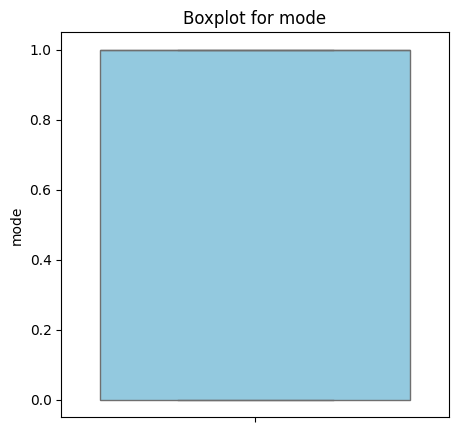

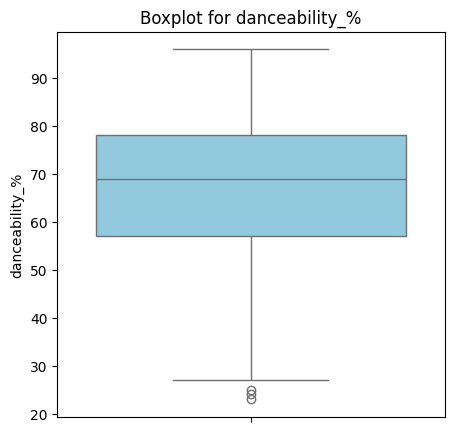

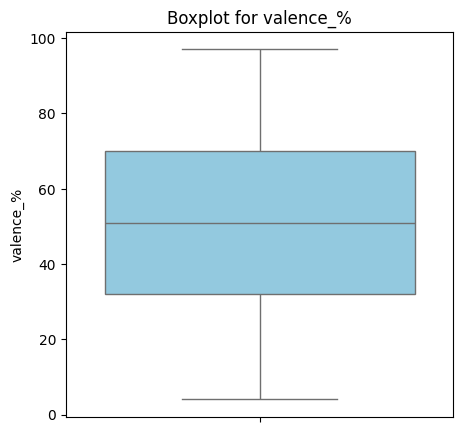

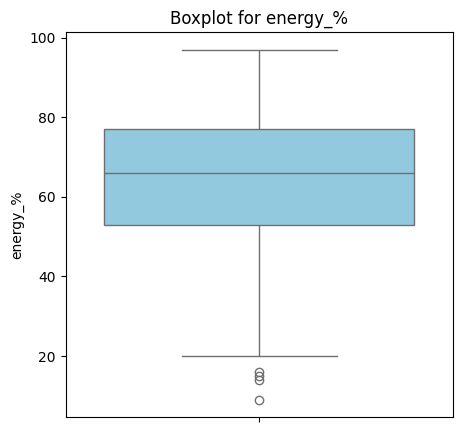

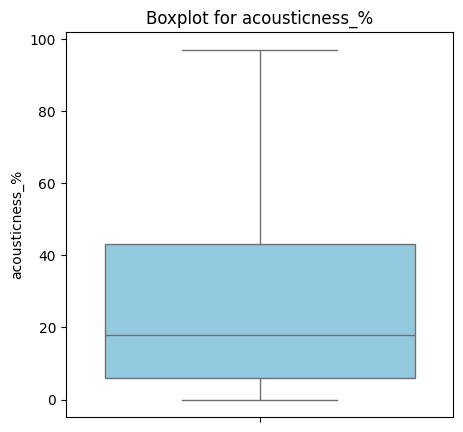

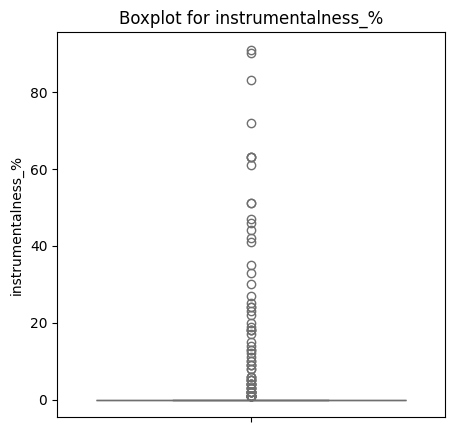

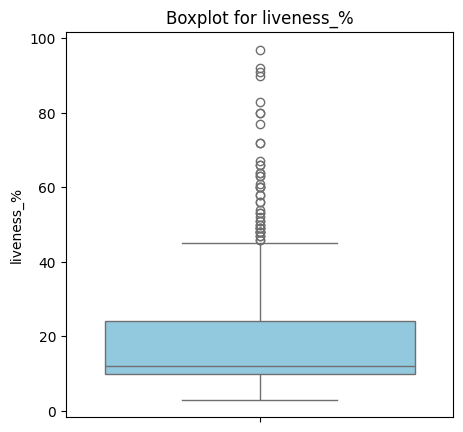

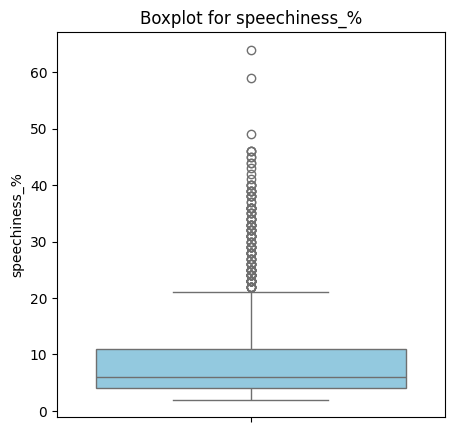

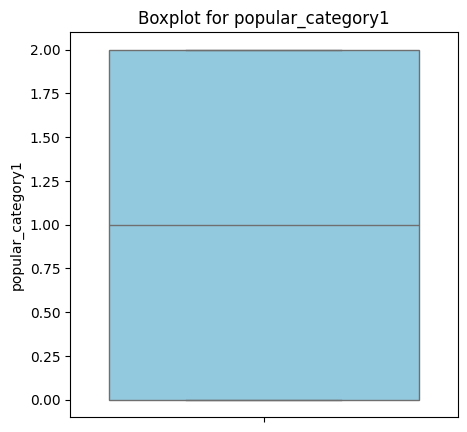

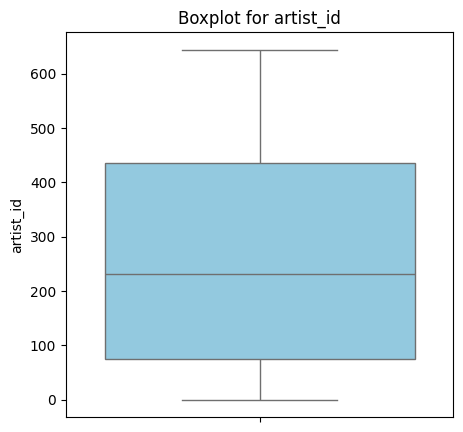

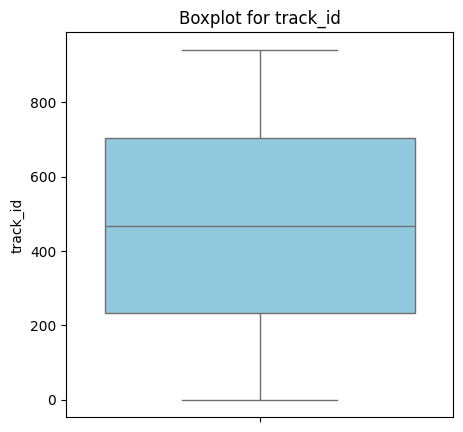

In [ ]:
numeric_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplot for each numeric variable
for var in numeric_vars:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=df, y=var, color='skyblue')
    plt.title(f"Boxplot for {var}")
    plt.ylabel(var)
    plt.show()

In [ ]:
numeric_vars = df.select_dtypes(include=['float64', 'int64','int8']).columns

# Create the pair plot
plt.figure(figsize=(12, 10))
sns.pairplot(df[numeric_vars], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()

# **ANALYSIS**

In [ ]:
# Select numerical columns for independent variables (X)
X = df.select_dtypes(include=['int64','float64','int8'])  # Exclude the target column if it's in numerical format

# Select the dependent variable (y)
y = df['popular_category1']  # Target variable (popularity category)

# Display the resulting datasets
print("Independent Variables (X):")
print(X.head())
print("\nDependent Variable (y):")
print(y.head())

Independent Variables (X):
   artist_count  released_year  released_month  released_day  \
0             2           2023               7            14   
1             1           2023               3            23   
2             1           2023               6            30   
3             1           2019               8            23   
4             1           2023               5            18   

   in_spotify_playlists  in_spotify_charts      streams  in_apple_playlists  \
0                   553                147  141381703.0                  43   
1                  1474                 48  133716286.0                  48   
2                  1397                113  140003974.0                  94   
3                  7858                100  800840817.0                 116   
4                  3133                 50  303236322.0                  84   

   in_apple_charts  in_deezer_playlists  ...  danceability_%  valence_%  \
0              263                   4

In [ ]:
# Select numerical columns for independent variables (X)
X = df.select_dtypes(include=['int64','float64','int8']).drop(columns=['popular_category1'])  # Exclude the target column if it's in numerical format

# Select the dependent variable (y)
y = df['popular_category1']  # Target variable (popularity category)

# Display the resulting datasets
print("Independent Variables (X):")
print(X.head())
print("\nDependent Variable (y):")
print(y.head())

Independent Variables (X):
   artist_count  released_year  released_month  released_day  \
0             2           2023               7            14   
1             1           2023               3            23   
2             1           2023               6            30   
3             1           2019               8            23   
4             1           2023               5            18   

   in_spotify_playlists  in_spotify_charts      streams  in_apple_playlists  \
0                   553                147  141381703.0                  43   
1                  1474                 48  133716286.0                  48   
2                  1397                113  140003974.0                  94   
3                  7858                100  800840817.0                 116   
4                  3133                 50  303236322.0                  84   

   in_apple_charts  in_deezer_playlists  ...  mode  danceability_%  valence_%  \
0              263              

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Variables with visible outliers based on boxplots
outlier_cols = [
    'artist_count', 'released_year', 'in_spotify_playlists', 'in_spotify_charts',
    'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
    'in_shazam_charts', 'bpm', 'instrumentalness_%'
]

# Function to remove outliers using the IQR method
def remove_outliers(df, columns):
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            # Calculate outlier boundaries
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Remove rows containing outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Apply outlier removal
df_cleaned = remove_outliers(df, outlier_cols)

# Display the new dataset size after outlier removal
print(f"Dataset size after outlier removal: {df_cleaned.shape}")

# Save the cleaned dataset (optional)
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

print("Outliers removed successfully. Cleaned dataset saved as 'cleaned_dataset.csv'")


Dataset size after outlier removal: (410, 27)
Outliers removed successfully. Cleaned dataset saved as 'cleaned_dataset.csv'


In [ ]:
df=df_cleaned

In [ ]:
# Select numerical columns for independent variables (X)
X = df.select_dtypes(include=['int64','float64','int8']).drop(columns=['popular_category1'])  # Exclude the target column if it's in numerical format

# Select the dependent variable (y)
y = df['popular_category1']  # Target variable (popularity category)

# Display the resulting datasets
print("Independent Variables (X):")
print(X.head())
print("\nDependent Variable (y):")
print(y.head())

Independent Variables (X):
     artist_count  released_year  released_month  released_day  \
69              1           2023               7             7   
83              1           2023               7             7   
93              1           2017              11             8   
107             1           2017               4            28   
113             1           2023               7             7   

     in_spotify_playlists  in_spotify_charts       streams  \
69                    148                 24  3.957818e+07   
83                    139                 17  3.922893e+07   
93                   4875                 23  6.850325e+08   
107                  3423                 21  1.116996e+09   
113                    99                 15  3.691212e+07   

     in_apple_playlists  in_apple_charts  in_deezer_playlists  ...  mode  \
69                   32               93                    8  ...     1   
83                   16               72           

# **TRAIN-TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=0.4, random_state=42)


# **80-20 SPLIT**

# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Step 1: Split data into training and testing sets (80-20 split)

# Step 2: Apply Standard Scaling to ensure features are on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)

# Step 3: Initialize Logistic Regression Model with regularization (C=0.01 for stronger regularization)
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, C=0.01)

# Step 4: Apply Recursive Feature Elimination (RFE) to select important features
selector = RFE(log_reg_model, n_features_to_select=7, step=1)  # Choose top 7 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train_1)
X_test_selected = selector.transform(X_test_scaled)

# Step 5: Train the Logistic Regression Model
log_reg_model.fit(X_train_selected, y_train_1)

# Step 6: Make predictions on the test set
y_pred = log_reg_model.predict(X_test_selected)

# Step 7: Evaluate the model
print("Classification Report:")
print(classification_report(y_test_1, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_1, y_pred)
print(confusion_matrix(y_test_1, y_pred))


print("\nAccuracy Score:", accuracy_score(y_test_1, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        41
           1       0.78      0.85      0.81        33
           2       1.00      0.12      0.22         8

    accuracy                           0.84        82
   macro avg       0.89      0.65      0.65        82
weighted avg       0.86      0.84      0.81        82


Confusion Matrix:
[[40  1  0]
 [ 5 28  0]
 [ 0  7  1]]

Accuracy Score: 0.8414634146341463


# **RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Feature Scaling (Preprocessing)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)

# Step 3: Initialize Logistic Regression with Regularization
# Using L2 regularization (penalty='l2') and setting C=0.1 for stronger regularization
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',  # Supports L2 regularization
    penalty='l2',    # Apply L2 regularization
    C=0.1,           # Regularization strength
    max_iter=1000
)

# Step 4: Train the Model
model.fit(X_train_scaled, y_train_1)

# Step 5: Make Predictions
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluate Performance
# Calculate accuracy
accuracy = accuracy_score(y_test_1, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test_1, y_pred)



# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred))


Accuracy: 0.9024

Confusion Matrix:
[[39  2  0]
 [ 2 31  0]
 [ 0  4  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.84      0.94      0.89        33
           2       1.00      0.50      0.67         8

    accuracy                           0.90        82
   macro avg       0.93      0.80      0.83        82
weighted avg       0.91      0.90      0.90        82



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# **KNN**

Accuracy: 0.8537


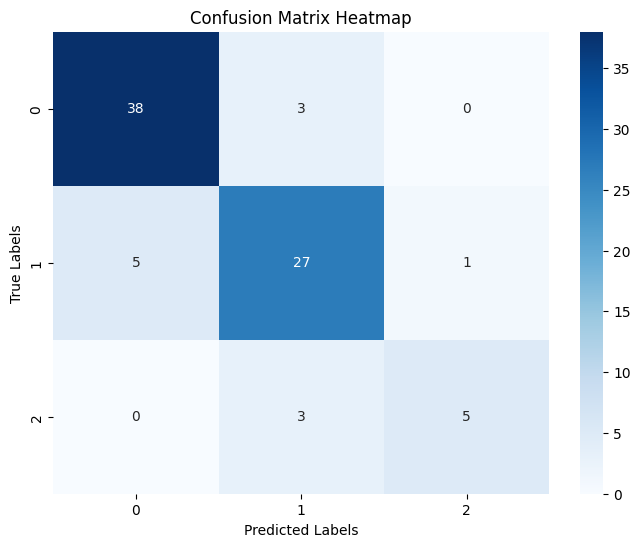


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.82      0.82      0.82        33
           2       0.83      0.62      0.71         8

    accuracy                           0.85        82
   macro avg       0.85      0.79      0.81        82
weighted avg       0.85      0.85      0.85        82



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)

# Step 3: Initialize the KNN classifier
# Set n_neighbors to a default value (e.g., 5), which can be tuned later
knn = KNeighborsClassifier(n_neighbors=5)

# Step 4: Train the KNN classifier
knn.fit(X_train_scaled, y_train_1)

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Step 6: Evaluate Performance
# Calculate accuracy
accuracy = accuracy_score(y_test_1, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test_1, y_pred)
best_knn=5
# Plot heatmap for confusion matrix
cm = confusion_matrix(y_test_1, y_pred)

# Plot heatmap for confusion matrix
plt.figure(figsize=(8, 6))
# Access classes_ from the knn model instead of best_knn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred))


# **SVM**

Accuracy: 0.8293

Confusion Matrix:
[[35  6  0]
 [ 3 28  2]
 [ 0  3  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.89        41
           1       0.76      0.85      0.80        33
           2       0.71      0.62      0.67         8

    accuracy                           0.83        82
   macro avg       0.80      0.78      0.78        82
weighted avg       0.83      0.83      0.83        82



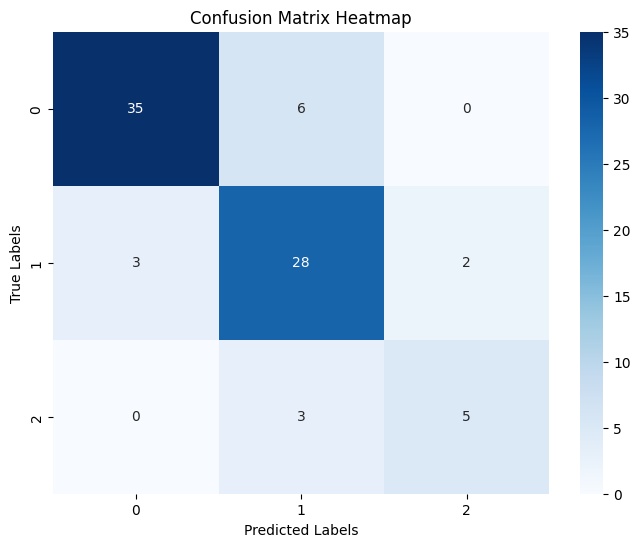

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)

# Step 3: Initialize the SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr')

# Step 4: Train the SVM model
svm_model.fit(X_train_scaled, y_train_1)

# Step 5: Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Step 6: Evaluate Performance
# Calculate accuracy
accuracy = accuracy_score(y_test_1, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test_1, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred))

# Step 7: Visualize Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


# DECISION TREE

✅ Final Decision Tree Accuracy (After Final Adjustments): 0.9268

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        41
           1       0.85      1.00      0.92        33
           2       1.00      0.75      0.86         8

    accuracy                           0.93        82
   macro avg       0.95      0.88      0.91        82
weighted avg       0.94      0.93      0.93        82


Confusion Matrix:
[[37  4  0]
 [ 0 33  0]
 [ 0  2  6]]


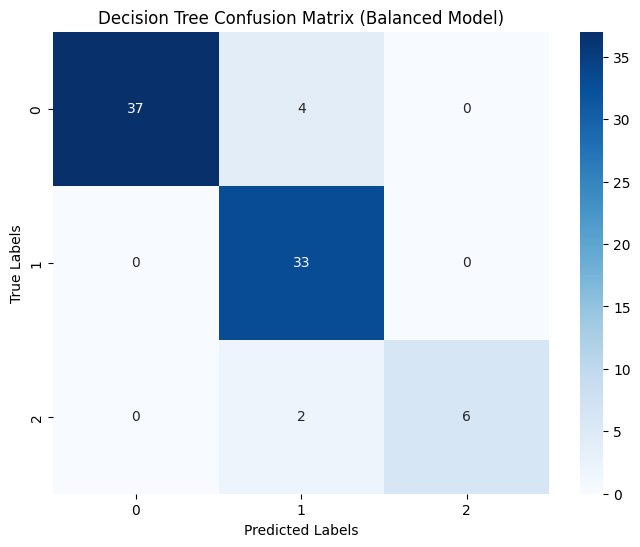

📉 Cross-validation Accuracy (80-20): 0.9298
🔍 Features Selected by RFE: ['streams', 'key', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 10 features for better learning
dt = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=dt, n_features_to_select=10)  # Keeping 10 most predictive features
rfe.fit(X_train_1, y_train_1)

# Keep only the selected features
X_train_selected = rfe.transform(X_train_1)
X_test_selected = rfe.transform(X_test_1)

# Step 3: Initialize Decision Tree with Adjusted Hyperparameters
dt_model = DecisionTreeClassifier(
    max_depth=6,              # Increased depth for better learning
    min_samples_split=30,     # Allows more splits (previously 50)
    min_samples_leaf=10,      # Allows smaller leaf nodes (previously 20)
    max_features=0.7,         # Uses 70% of features per split for variation
    random_state=42
)

# Step 4: Train the Model
dt_model.fit(X_train_selected, y_train_1)

# Step 5: Make Predictions
y_pred = dt_model.predict(X_test_selected)

# Step 6: Evaluate Model Performance
accuracy = accuracy_score(y_test_1, y_pred)
print(f"✅ Final Decision Tree Accuracy (After Final Adjustments): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_1, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 7: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix (Balanced Model)')
plt.show()

# Step 8: Cross-Validation Score
cv_scores = cross_val_score(dt_model, X_train_selected, y_train_1, cv=5)
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")

# Step 9: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **RANDOM FOREST**

✅ Final Random Forest Accuracy (Further Optimized): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.80      1.00      0.89        33
           2       0.00      0.00      0.00         8

    accuracy                           0.90        82
   macro avg       0.60      0.67      0.63        82
weighted avg       0.82      0.90      0.86        82


Confusion Matrix:
[[41  0  0]
 [ 0 33  0]
 [ 0  8  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


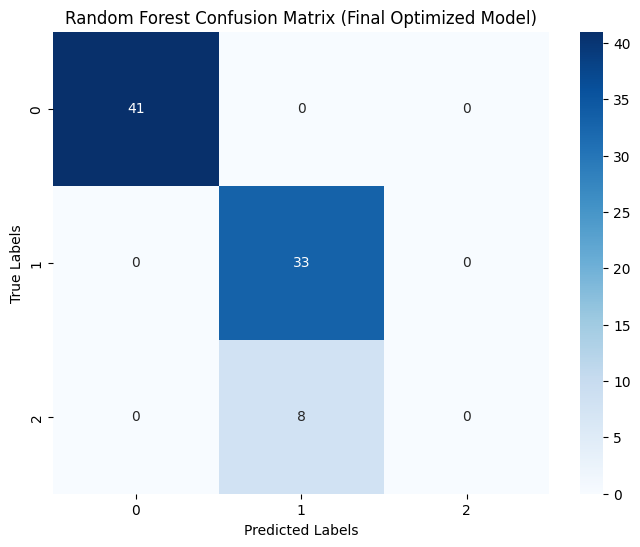

📉 Cross-validation Accuracy (80-20): 0.8964
🔍 Features Selected by RFE: ['released_year', 'in_spotify_playlists', 'streams', 'in_apple_playlists', 'in_apple_charts']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 most important features
rf = RandomForestClassifier(n_estimators=15, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=5)
rfe.fit(X_train_1, y_train_1)

# Keep only the selected features
X_train_selected = rfe.transform(X_train_1)
X_test_selected = rfe.transform(X_test_1)

# Step 3: Initialize a More Regularized Random Forest
rf_model = RandomForestClassifier(
    n_estimators=15,           # Fewer trees to avoid memorization
    max_depth=3,               # Further limiting tree depth
    min_samples_split=80,      # Requires 80+ samples to split (avoids excessive branching)
    min_samples_leaf=30,       # Ensures each leaf has 30+ samples for better generalization
    max_features=0.4,          # Uses only 40% of features per tree to prevent overfitting
    random_state=42
)

# Step 4: Train the Model
rf_model.fit(X_train_selected, y_train_1)

# Step 5: Make Predictions
y_pred = rf_model.predict(X_test_selected)

# Step 6: Evaluate Model Performance
accuracy = accuracy_score(y_test_1, y_pred)
print(f"✅ Final Random Forest Accuracy (Further Optimized): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_1, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 7: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix (Final Optimized Model)')
plt.show()

# Step 8: Cross-Validation Score
cv_scores = cross_val_score(rf_model, X_train_selected, y_train_1, cv=5)
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")

# Step 9: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# ADABOOST

✅ Final AdaBoost Accuracy (Optimized): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.80      1.00      0.89        33
           2       0.00      0.00      0.00         8

    accuracy                           0.90        82
   macro avg       0.60      0.67      0.63        82
weighted avg       0.82      0.90      0.86        82


Confusion Matrix:
[[41  0  0]
 [ 0 33  0]
 [ 0  8  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


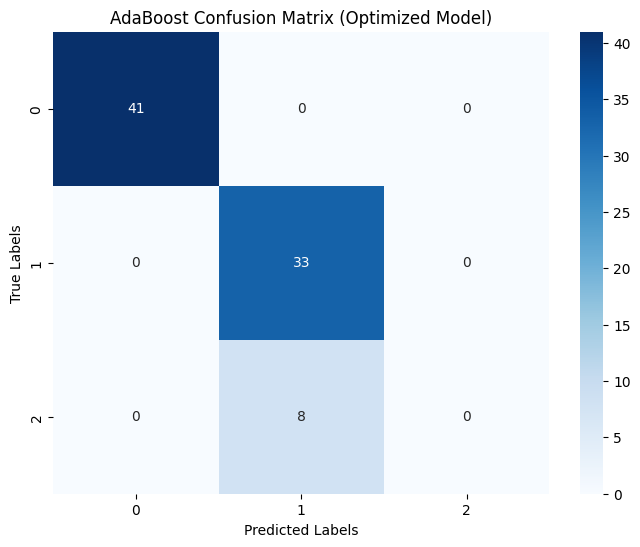

📉 Cross-validation Accuracy (80-20): 0.8994
🔍 Features Selected by RFE: ['streams', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 7 most predictive features
base_learner = DecisionTreeClassifier(max_depth=1, min_samples_leaf=50, random_state=42)
rfe = RFE(estimator=base_learner, n_features_to_select=7)
rfe.fit(X_train_1, y_train_1)

# Keep only the selected features
X_train_selected = rfe.transform(X_train_1)
X_test_selected = rfe.transform(X_test_1)

# Step 3: Initialize AdaBoost with Regularization
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=50),  # Weak learner
    n_estimators=20,           # Fewer rounds of boosting
    learning_rate=0.05,        # Slow learning for better generalization
    random_state=42
)

# Step 4: Train the Model
adaboost_model.fit(X_train_selected, y_train_1)

# Step 5: Make Predictions
y_pred = adaboost_model.predict(X_test_selected)

# Step 6: Evaluate Model Performance
accuracy = accuracy_score(y_test_1, y_pred)
print(f"✅ Final AdaBoost Accuracy (Optimized): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_1, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 7: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=adaboost_model.classes_, yticklabels=adaboost_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('AdaBoost Confusion Matrix (Optimized Model)')
plt.show()

# Step 8: Cross-Validation Score
cv_scores = cross_val_score(adaboost_model, X_train_selected, y_train_1, cv=5)
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")

# Step 9: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **GRADIENT BOOST**

✅ Final Gradient Boosting Accuracy (Further Optimized): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.80      1.00      0.89        33
           2       0.00      0.00      0.00         8

    accuracy                           0.90        82
   macro avg       0.60      0.67      0.63        82
weighted avg       0.82      0.90      0.86        82


Confusion Matrix:
[[41  0  0]
 [ 0 33  0]
 [ 0  8  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


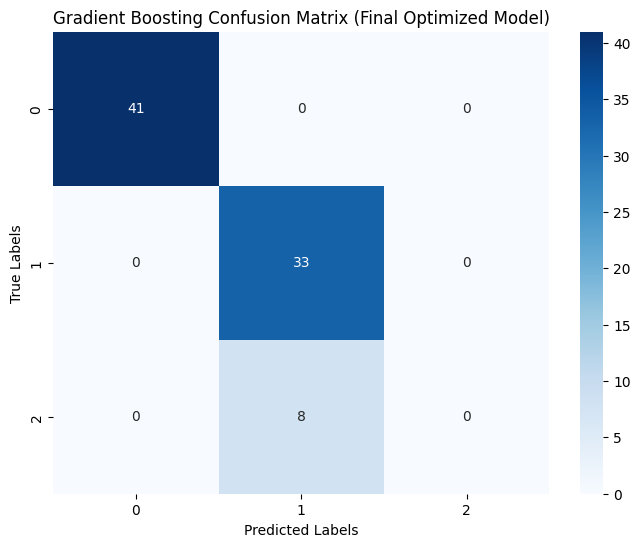

📉 Cross-validation Accuracy (80-20): 0.8994
🔍 Features Selected by RFE: ['streams', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 most important features
gb = GradientBoostingClassifier(n_estimators=30, learning_rate=0.01, max_depth=1, random_state=42)
rfe = RFE(estimator=gb, n_features_to_select=5)
rfe.fit(X_train_1, y_train_1)

# Keep only the selected features
X_train_selected = rfe.transform(X_train_1)
X_test_selected = rfe.transform(X_test_1)

# Step 3: Initialize a More Regularized Gradient Boosting Model
gb_model = GradientBoostingClassifier(
    n_estimators=30,          # Fewer trees to prevent excessive learning
    learning_rate=0.01,       # Slower learning rate for better generalization
    max_depth=1,              # Restricts tree depth further
    min_samples_split=50,     # Requires 50+ samples to split (avoids excessive branching)
    min_samples_leaf=50,      # Ensures each leaf has 50+ samples for better generalization
    random_state=42
)

# Step 4: Train the Model
gb_model.fit(X_train_selected, y_train_1)

# Step 5: Make Predictions
y_pred = gb_model.predict(X_test_selected)

# Step 6: Evaluate Model Performance
accuracy = accuracy_score(y_test_1, y_pred)
print(f"✅ Final Gradient Boosting Accuracy (Further Optimized): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_1, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 7: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gb_model.classes_, yticklabels=gb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix (Final Optimized Model)')
plt.show()

# Step 8: Cross-Validation Score
cv_scores = cross_val_score(gb_model, X_train_selected, y_train_1, cv=5)
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")

# Step 9: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **XG BOOST**

✅ Final XGBoost Accuracy (Further Optimized): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.80      1.00      0.89        33
           2       0.00      0.00      0.00         8

    accuracy                           0.90        82
   macro avg       0.60      0.67      0.63        82
weighted avg       0.82      0.90      0.86        82


Confusion Matrix:
[[41  0  0]
 [ 0 33  0]
 [ 0  8  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


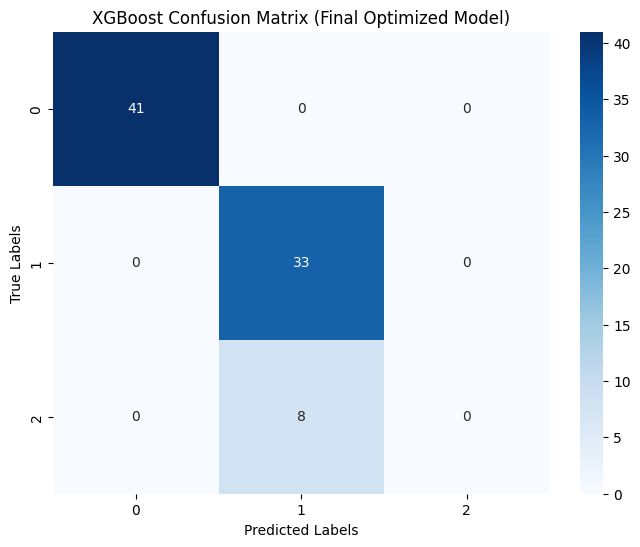

📉 Cross-validation Accuracy (80-20): 0.8964
🔍 Features Selected by RFE: ['streams', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
xgb = XGBClassifier(n_estimators=30, learning_rate=0.01, max_depth=2, random_state=42)
rfe = RFE(estimator=xgb, n_features_to_select=5)
rfe.fit(X_train_1, y_train_1)

# Keep only the selected features
X_train_selected = rfe.transform(X_train_1)
X_test_selected = rfe.transform(X_test_1)

# Step 3: Initialize XGBoost with Extreme Regularization
xgb_model = XGBClassifier(
    objective='multi:softmax',  # Multiclass classification
    num_class=3,               # Adjust based on dataset classes
    n_estimators=30,           # Even fewer boosting rounds
    learning_rate=0.01,        # Slower learning rate
    max_depth=2,               # Further reduced tree complexity
    min_child_weight=20,       # Ensures large nodes to prevent overfitting
    reg_lambda=20,             # Stronger L2 regularization
    reg_alpha=10,              # Stronger L1 regularization
    subsample=0.5,             # Uses only 50% of data per tree (reduces memorization)
    colsample_bytree=0.5,      # Uses only 50% of features per tree
    random_state=42
)

# Step 4: Train the Model
xgb_model.fit(X_train_selected, y_train_1)

# Step 5: Make Predictions
y_pred = xgb_model.predict(X_test_selected)

# Step 6: Evaluate Model Performance
accuracy = accuracy_score(y_test_1, y_pred)
print(f"✅ Final XGBoost Accuracy (Further Optimized): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_1, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 7: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGBoost Confusion Matrix (Final Optimized Model)')
plt.show()

# Step 8: Cross-Validation Score
cv_scores = cross_val_score(xgb_model, X_train_selected, y_train_1, cv=5)
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")

# Step 9: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **CATBOOST**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


✅ Final CatBoost Accuracy (Extreme Regularization): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.80      1.00      0.89        33
           2       0.00      0.00      0.00         8

    accuracy                           0.90        82
   macro avg       0.60      0.67      0.63        82
weighted avg       0.82      0.90      0.86        82


Confusion Matrix:
[[41  0  0]
 [ 0 33  0]
 [ 0  8  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


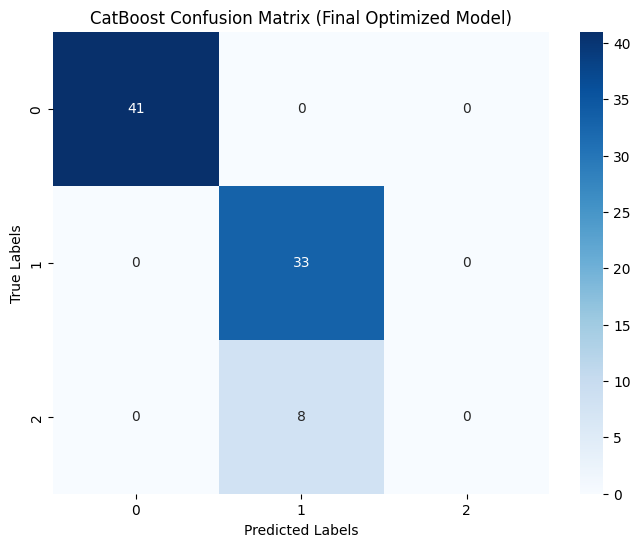

📉 Cross-validation Accuracy (80-20): 0.8994
🔍 Features Selected by RFE: ['streams', 'energy_%', 'speechiness_%']


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 3 Features
cat = CatBoostClassifier(iterations=20, learning_rate=0.005, depth=2, random_seed=42, verbose=0)
rfe = RFE(estimator=cat, n_features_to_select=3)
rfe.fit(X_train_1, y_train_1)

# Keep only the selected features
X_train_selected = rfe.transform(X_train_1)
X_test_selected = rfe.transform(X_test_1)

# Step 3: Initialize CatBoost with Strongest Regularization
cat_model = CatBoostClassifier(
    iterations=20,         # Further reduce boosting rounds
    learning_rate=0.005,   # Ultra-slow learning rate
    depth=2,               # Minimum tree depth
    l2_leaf_reg=20,        # Stronger L2 regularization
    min_data_in_leaf=100,  # Prevents small leaf nodes
    bagging_temperature=1.0,  # Maximum randomness to prevent memorization
    colsample_bylevel=0.5, # Uses only 50% of features per tree
    loss_function='MultiClass',
    random_seed=42,
    verbose=0
)

# Step 4: Train the Model
cat_model.fit(X_train_selected, y_train_1)

# Step 5: Make Predictions
y_pred = cat_model.predict(X_test_selected)

# Step 6: Evaluate Model Performance
accuracy = accuracy_score(y_test_1, y_pred)
print(f"✅ Final CatBoost Accuracy (Extreme Regularization): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_1, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 7: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cat_model.classes_, yticklabels=cat_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CatBoost Confusion Matrix (Final Optimized Model)')
plt.show()

# Step 8: Cross-Validation Score
cv_scores = cross_val_score(cat_model, X_train_selected, y_train_1, cv=5)
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")

# Step 9: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# BAGGING

✅ Final Bagging Accuracy (Extreme Regularization): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.80      1.00      0.89        33
           2       0.00      0.00      0.00         8

    accuracy                           0.90        82
   macro avg       0.60      0.67      0.63        82
weighted avg       0.82      0.90      0.86        82


Confusion Matrix:
[[41  0  0]
 [ 0 33  0]
 [ 0  8  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


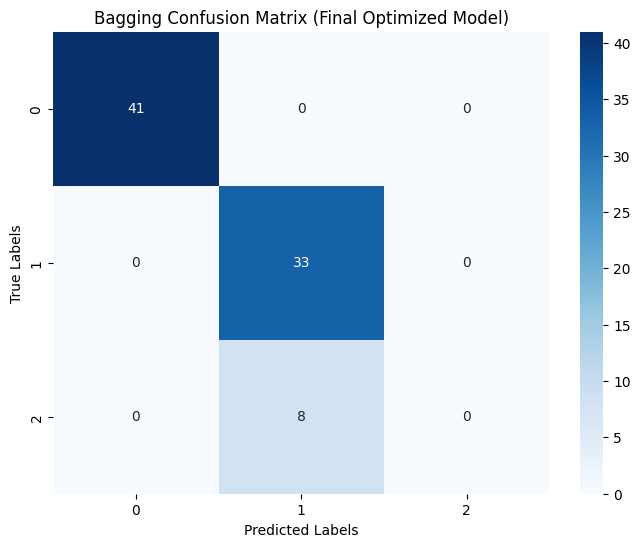

📉 Cross-validation Accuracy (80-20): 0.8841
🔍 Features Selected by RFE: ['streams', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=50, random_state=42)
rfe = RFE(estimator=dt, n_features_to_select=5)
rfe.fit(X_train_1, y_train_1)

# Keep only selected features
X_train_selected = rfe.transform(X_train_1)
X_test_selected = rfe.transform(X_test_1)

# Step 3: Initialize Bagging with Stronger Regularization
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=2, min_samples_leaf=50),  # Weaker base model
    n_estimators=30,           # Further reduce number of trees
    max_samples=0.5,           # Uses only 50% of samples per tree
    max_features=0.5,          # Uses only 50% of features per tree
    random_state=42,
    n_jobs=-1
)

# Step 4: Train the Model
bagging_model.fit(X_train_selected, y_train_1)

# Step 5: Make Predictions
y_pred = bagging_model.predict(X_test_selected)

# Step 6: Evaluate Model Performance
accuracy = accuracy_score(y_test_1, y_pred)
print(f"✅ Final Bagging Accuracy (Extreme Regularization): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_1, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 7: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Bagging Confusion Matrix (Final Optimized Model)')
plt.show()

# Step 8: Cross-Validation Score
cv_scores = cross_val_score(bagging_model, X_train_selected, y_train_1, cv=5)
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")

# Step 9: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **ARTIFICIAL NEURAL NETWORK**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3505 - loss: 1.6979 - val_accuracy: 0.0976 - val_loss: 3.3779
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7788 - loss: 0.5744 - val_accuracy: 0.1220 - val_loss: 3.0872
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8375 - loss: 0.4136 - val_accuracy: 0.1707 - val_loss: 3.2028
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7779 - loss: 0.5937 - val_accuracy: 0.2195 - val_loss: 2.8968
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8757 - loss: 0.3442 - val_accuracy: 0.2805 - val_loss: 2.5331
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8792 - loss: 0.3230 - val_accuracy: 0.3902 - val_loss: 2.1817
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8874 - loss: 0.3412 - val_accuracy: 0.4146 - val_loss: 2.0060
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8161 - loss: 0.5506 - val_accuracy: 0.4878 - val_l

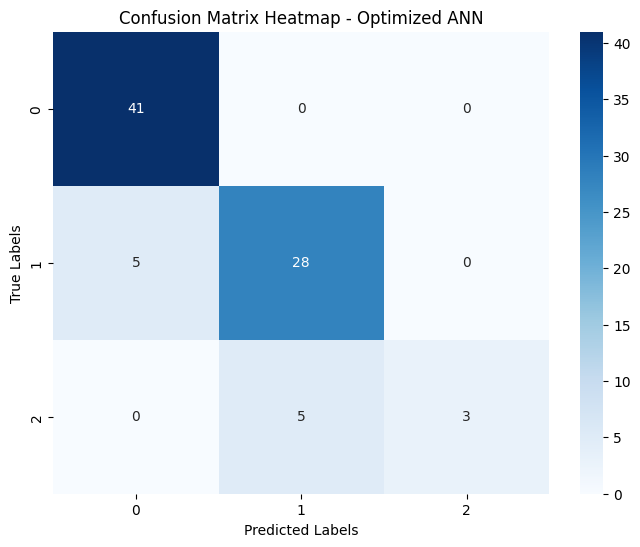

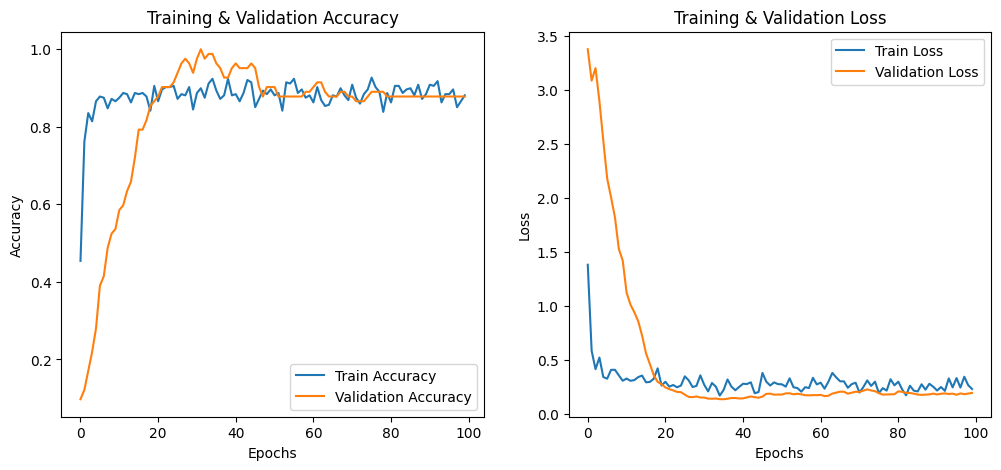

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Step 2: Define Optimized ANN Model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_1.shape[1],)),
    BatchNormalization(),  # Normalization for stable training
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(3, activation='softmax')  # Output layer (3 classes)
])

# Step 3: Compile the Model with AdamW Optimizer
model.compile(optimizer=Adam(learning_rate=0.0005),  # Smaller LR for stability
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the ANN Model
history = model.fit(X_train_1, y_train_1, epochs=100, batch_size=32, validation_data=(X_test_1, y_test_1), verbose=1)

# Step 5: Make Predictions
y_pred_prob = model.predict(X_test_1)
y_pred = np.argmax(y_pred_prob, axis=1)

# Accuracy
accuracy = accuracy_score(y_test_1, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred))

# Confusion Matrix
# Confusion Matrix
cm = confusion_matrix(y_test_1, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 6: Visualize Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Optimized ANN')
plt.show()

# Step 7: Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()


# 75-25 SPLIT

# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler


# Step 2: Apply Standard Scaling to ensure features are on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_2)
X_test_scaled = scaler.transform(X_test_2)

# Step 3: Initialize Logistic Regression Model with regularization (C=0.01 for stronger regularization)
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, C=0.01)

# Step 4: Apply Recursive Feature Elimination (RFE) to select important features
selector = RFE(log_reg_model, n_features_to_select=7, step=1)  # Choose top 7 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train_2)
X_test_selected = selector.transform(X_test_scaled)

# Step 5: Train the Logistic Regression Model
log_reg_model.fit(X_train_selected, y_train_2)

# Step 6: Make predictions on the test set
y_pred = log_reg_model.predict(X_test_selected)

# Step 7: Evaluate the model
print("Classification Report:")
print(classification_report(y_test_2, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_2, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test_2, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        54
           1       0.77      0.87      0.82        39
           2       1.00      0.20      0.33        10

    accuracy                           0.85       103
   macro avg       0.90      0.68      0.70       103
weighted avg       0.87      0.85      0.83       103


Confusion Matrix:
[[52  2  0]
 [ 5 34  0]
 [ 0  8  2]]

Accuracy Score: 0.8543689320388349


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

# RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 2: Feature Scaling (Preprocessing)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_2)
X_test_scaled = scaler.transform(X_test_2)

# Step 3: Initialize Logistic Regression with Regularization
# Using L2 regularization (penalty='l2') and setting C=0.1 for stronger regularization
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',  # Supports L2 regularization
    penalty='l2',    # Apply L2 regularization
    C=0.1,           # Regularization strength
    max_iter=1000
)

# Step 4: Train the Model
model.fit(X_train_scaled, y_train_2)

# Step 5: Make Predictions
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluate Performance
# Calculate accuracy
accuracy = accuracy_score(y_test_2, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test_2, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred))


Accuracy: 0.9126

Confusion Matrix:
[[52  2  0]
 [ 2 37  0]
 [ 0  5  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.84      0.95      0.89        39
           2       1.00      0.50      0.67        10

    accuracy                           0.91       103
   macro avg       0.93      0.80      0.84       103
weighted avg       0.92      0.91      0.91       103



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# **KNN**

Accuracy: 0.8058


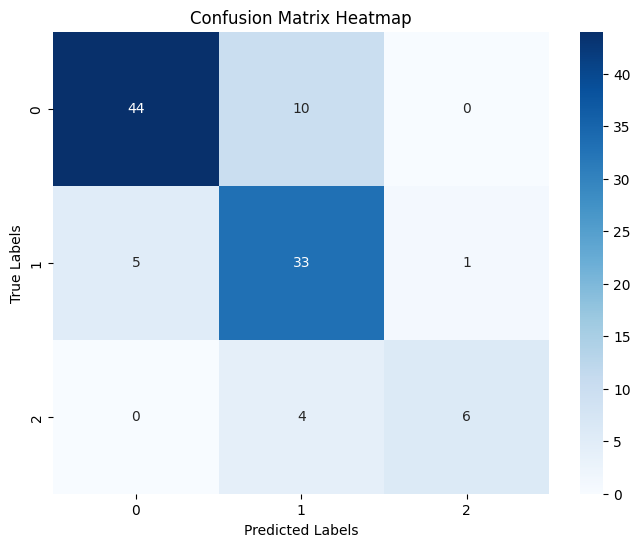


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        54
           1       0.70      0.85      0.77        39
           2       0.86      0.60      0.71        10

    accuracy                           0.81       103
   macro avg       0.82      0.75      0.78       103
weighted avg       0.82      0.81      0.81       103



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_2)
X_test_scaled = scaler.transform(X_test_2)

# Step 3: Initialize the KNN classifier
# Set n_neighbors to a default value (e.g., 5), which can be tuned later
knn = KNeighborsClassifier(n_neighbors=5)

# Step 4: Train the KNN classifier
knn.fit(X_train_scaled, y_train_2)

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Step 6: Evaluate Performance
# Calculate accuracy
accuracy = accuracy_score(y_test_2, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test_2, y_pred)

# Plot heatmap for confusion matrix
cm = confusion_matrix(y_test_2, y_pred)

# Plot heatmap for confusion matrix
plt.figure(figsize=(8, 6))
# Access classes_ from the knn model instead of best_knn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred))


# **SVM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_2)
X_test_scaled = scaler.transform(X_test_2)

# Step 3: Initialize the SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr')

# Step 4: Train the SVM model
svm_model.fit(X_train_scaled, y_train_2)

# Step 5: Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Step 6: Evaluate Performance
# Calculate accuracy
accuracy = accuracy_score(y_test_2, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test_2, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred))

Accuracy: 0.8447

Confusion Matrix:
[[45  9  0]
 [ 3 35  1]
 [ 0  3  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        54
           1       0.74      0.90      0.81        39
           2       0.88      0.70      0.78        10

    accuracy                           0.84       103
   macro avg       0.85      0.81      0.82       103
weighted avg       0.86      0.84      0.85       103



# **DECISION TREE**

✅ Final Decision Tree Accuracy (75-25 Split): 0.9417

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.87      1.00      0.93        39
           2       1.00      0.80      0.89        10

    accuracy                           0.94       103
   macro avg       0.96      0.91      0.93       103
weighted avg       0.95      0.94      0.94       103



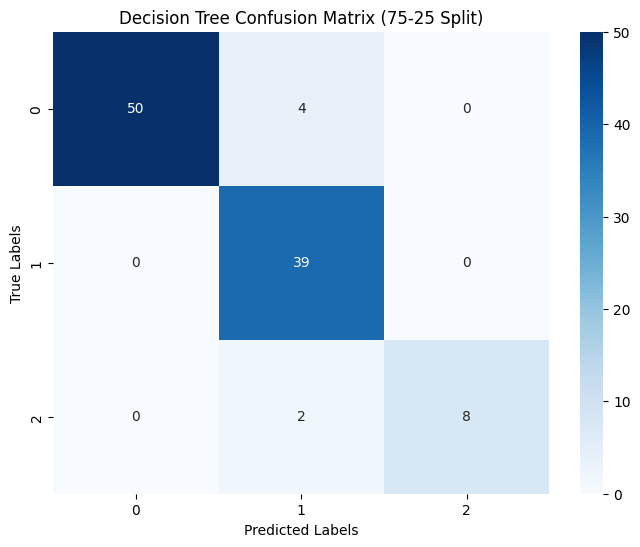

📉 Cross-validation Accuracy (75-25 Split): 0.9282
🔍 Features Selected by RFE: ['streams', 'key', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 10 features
dt = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=dt, n_features_to_select=10)
rfe.fit(X_train_2, y_train_2)

# Keep only selected features
X_train_selected = rfe.transform(X_train_2)
X_test_selected = rfe.transform(X_test_2)

# Step 3: Initialize Decision Tree with Adjusted Hyperparameters
dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=30,
    min_samples_leaf=10,
    max_features=0.7,
    random_state=42
)

# Step 4: Train the Model
dt_model.fit(X_train_selected, y_train_2)

# Step 5: Make Predictions
y_pred = dt_model.predict(X_test_selected)

# Step 6: Evaluate Model Performance
accuracy = accuracy_score(y_test_2, y_pred)
print(f"✅ Final Decision Tree Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix (75-25 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(dt_model, X_train_selected, y_train_2, cv=5)
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **RANDOM FOREST**

✅ Final Random Forest Accuracy (75-25 Split): 0.9029

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.80      1.00      0.89        39
           2       0.00      0.00      0.00        10

    accuracy                           0.90       103
   macro avg       0.60      0.67      0.63       103
weighted avg       0.83      0.90      0.86       103



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


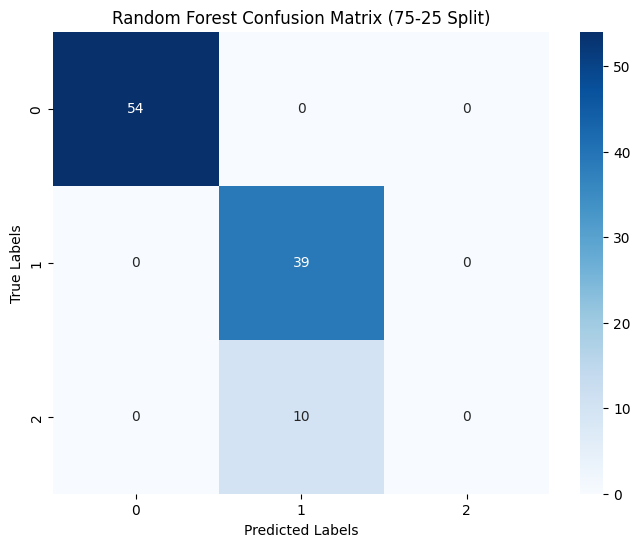

📉 Cross-validation Accuracy (75-25 Split): 0.8958
🔍 Features Selected by RFE: ['released_year', 'in_spotify_playlists', 'streams', 'in_apple_playlists', 'in_apple_charts']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
rf = RandomForestClassifier(n_estimators=15, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=5)
rfe.fit(X_train_2, y_train_2)

# Keep only selected features
X_train_selected = rfe.transform(X_train_2)
X_test_selected = rfe.transform(X_test_2)

# Step 3: Initialize Random Forest with Regularization
rf_model = RandomForestClassifier(
    n_estimators=15,
    max_depth=3,
    min_samples_split=70,
    min_samples_leaf=30,
    max_features=0.4,
    random_state=42
)

# Step 4: Train the Model
rf_model.fit(X_train_selected, y_train_2)

# Step 5: Make Predictions
y_pred = rf_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_2, y_pred)
print(f"✅ Final Random Forest Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix (75-25 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(rf_model, X_train_selected, y_train_2, cv=5)
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **ADABOOST**

✅ Final AdaBoost Accuracy (75-25 Split): 0.9029

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.80      1.00      0.89        39
           2       0.00      0.00      0.00        10

    accuracy                           0.90       103
   macro avg       0.60      0.67      0.63       103
weighted avg       0.83      0.90      0.86       103



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


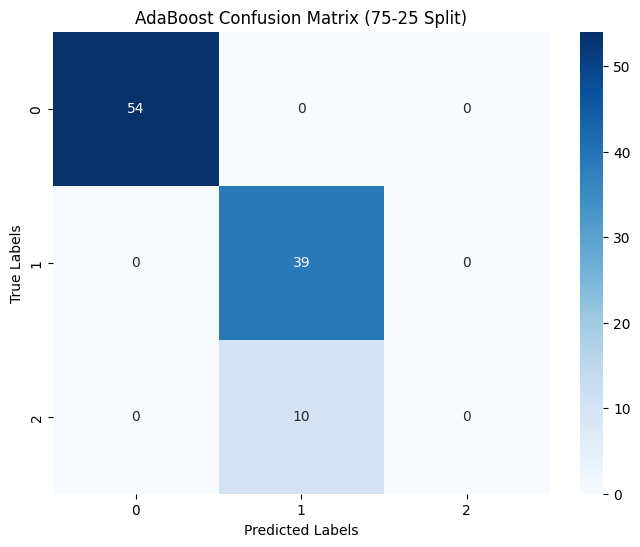

📉 Cross-validation Accuracy (75-25 Split): 0.8958
🔍 Features Selected by RFE: ['streams', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 7 Features
base_learner = DecisionTreeClassifier(max_depth=1, min_samples_leaf=50, random_state=42)
rfe = RFE(estimator=base_learner, n_features_to_select=7)
rfe.fit(X_train_2, y_train_2)

# Keep only selected features
X_train_selected = rfe.transform(X_train_2)
X_test_selected = rfe.transform(X_test_2)

# Step 3: Initialize AdaBoost with Regularization
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=50),  # Weak learner
    n_estimators=20,           # Fewer boosting rounds
    learning_rate=0.05,        # Slow learning for better generalization
    random_state=42
)

# Step 4: Train the Model
adaboost_model.fit(X_train_selected, y_train_2)

# Step 5: Make Predictions
y_pred = adaboost_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_2, y_pred)
print(f"✅ Final AdaBoost Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=adaboost_model.classes_, yticklabels=adaboost_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('AdaBoost Confusion Matrix (75-25 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(adaboost_model, X_train_selected, y_train_2, cv=5)
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# GRADIENT BOOST

✅ Final Gradient Boosting Accuracy (75-25 Split): 0.9029

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.80      1.00      0.89        39
           2       0.00      0.00      0.00        10

    accuracy                           0.90       103
   macro avg       0.60      0.67      0.63       103
weighted avg       0.83      0.90      0.86       103



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


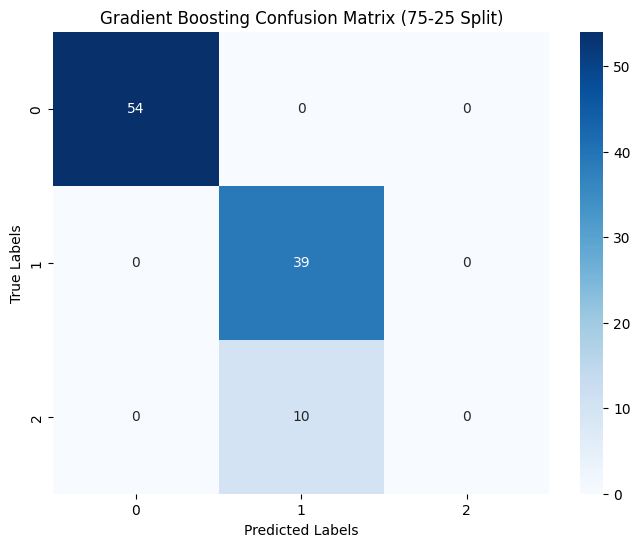

📉 Cross-validation Accuracy (75-25 Split): 0.8958
🔍 Features Selected by RFE: ['streams', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Split Data (75-25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
gb = GradientBoostingClassifier(n_estimators=30, learning_rate=0.01, max_depth=1, random_state=42)
rfe = RFE(estimator=gb, n_features_to_select=5)
rfe.fit(X_train_2, y_train_2)

# Keep only selected features
X_train_selected = rfe.transform(X_train_2)
X_test_selected = rfe.transform(X_test_2)

# Step 3: Initialize Gradient Boosting with Regularization
gb_model = GradientBoostingClassifier(
    n_estimators=30,
    learning_rate=0.01,
    max_depth=1,
    min_samples_split=50,
    min_samples_leaf=50,
    random_state=42
)

# Step 4: Train the Model
gb_model.fit(X_train_selected, y_train_2)

# Step 5: Make Predictions
y_pred = gb_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_2, y_pred)
print(f"✅ Final Gradient Boosting Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gb_model.classes_, yticklabels=gb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix (75-25 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(gb_model, X_train_selected, y_train_2, cv=5)
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **XG BOOST**

✅ Final XGBoost Accuracy (75-25 Split): 0.9029

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.80      1.00      0.89        39
           2       0.00      0.00      0.00        10

    accuracy                           0.90       103
   macro avg       0.60      0.67      0.63       103
weighted avg       0.83      0.90      0.86       103



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


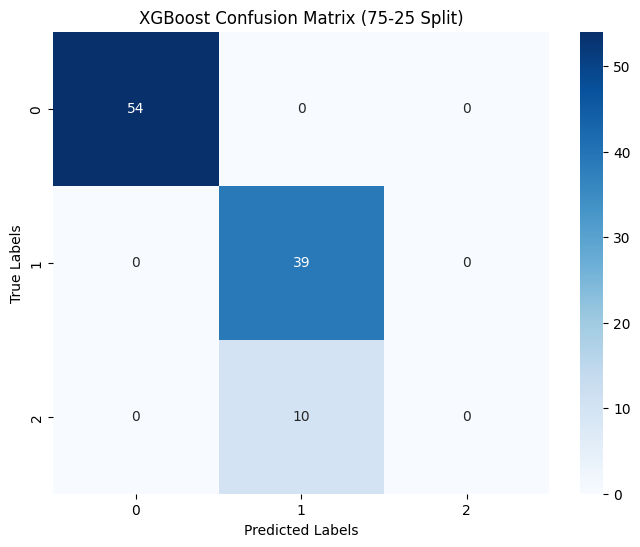

📉 Cross-validation Accuracy (75-25 Split): 0.8958
🔍 Features Selected by RFE: ['streams', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
xgb = XGBClassifier(n_estimators=30, learning_rate=0.01, max_depth=2, random_state=42)
rfe = RFE(estimator=xgb, n_features_to_select=5)
rfe.fit(X_train_2, y_train_2)

# Keep only selected features
X_train_selected = rfe.transform(X_train_2)
X_test_selected = rfe.transform(X_test_2)

# Step 3: Initialize XGBoost with Regularization
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=30,
    learning_rate=0.01,
    max_depth=2,
    min_child_weight=20,
    reg_lambda=20,
    reg_alpha=10,
    subsample=0.5,
    colsample_bytree=0.5,
    random_state=42
)

# Step 4: Train the Model
xgb_model.fit(X_train_selected, y_train_2)

# Step 5: Make Predictions
y_pred = xgb_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_2, y_pred)
print(f"✅ Final XGBoost Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGBoost Confusion Matrix (75-25 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(xgb_model, X_train_selected, y_train_2, cv=5)
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **CAT BOOST**

In [ ]:
!pip install catboost

✅ Final CatBoost Accuracy (75-25 Split): 0.9029

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.80      1.00      0.89        39
           2       0.00      0.00      0.00        10

    accuracy                           0.90       103
   macro avg       0.60      0.67      0.63       103
weighted avg       0.83      0.90      0.86       103



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


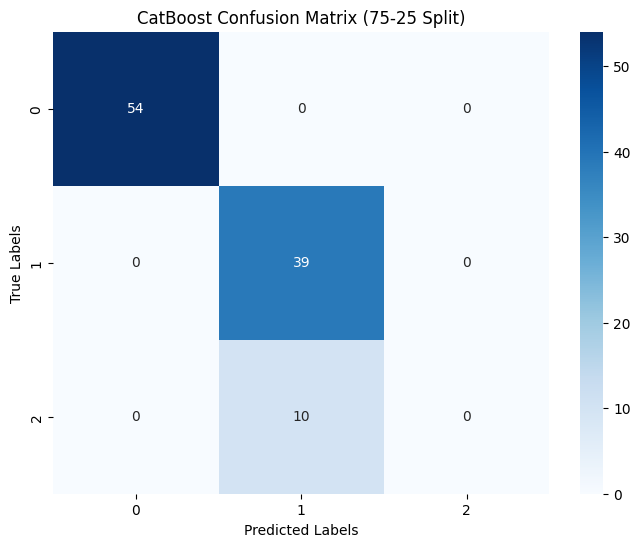

📉 Cross-validation Accuracy (75-25 Split): 0.8958
🔍 Features Selected by RFE: ['streams', 'in_deezer_playlists', 'acousticness_%']


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 3 Features
cat = CatBoostClassifier(iterations=20, learning_rate=0.005, depth=2, random_seed=42, verbose=0)
rfe = RFE(estimator=cat, n_features_to_select=3)
rfe.fit(X_train_2, y_train_2)

# Keep only selected features
X_train_selected = rfe.transform(X_train_2)
X_test_selected = rfe.transform(X_test_2)

# Step 3: Initialize CatBoost with Regularization
cat_model = CatBoostClassifier(
    iterations=20,
    learning_rate=0.005,
    depth=2,
    l2_leaf_reg=20,
    min_data_in_leaf=100,
    bagging_temperature=1.0,
    colsample_bylevel=0.5,
    loss_function='MultiClass',
    random_seed=42,
    verbose=0
)

# Step 4: Train the Model
cat_model.fit(X_train_selected, y_train_2)

# Step 5: Make Predictions
y_pred = cat_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_2, y_pred)
print(f"✅ Final CatBoost Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cat_model.classes_, yticklabels=cat_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CatBoost Confusion Matrix (75-25 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(cat_model, X_train_selected, y_train_2, cv=5)
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **BAGGING**

✅ Final Bagging Accuracy (75-25 Split): 0.9029

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.80      1.00      0.89        39
           2       0.00      0.00      0.00        10

    accuracy                           0.90       103
   macro avg       0.60      0.67      0.63       103
weighted avg       0.83      0.90      0.86       103



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


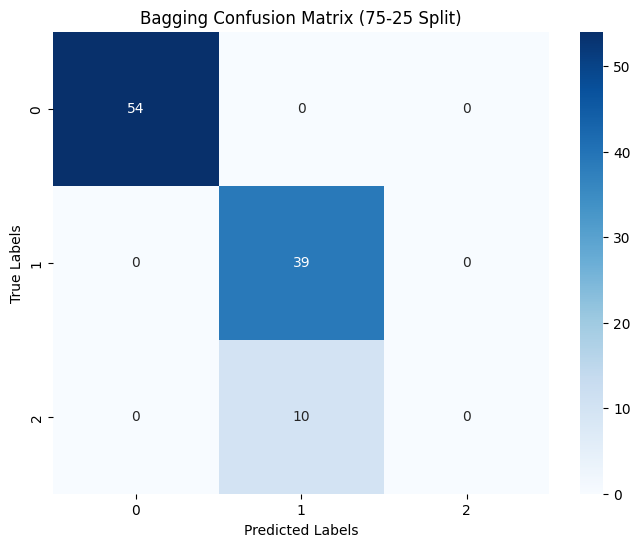

📉 Cross-validation Accuracy (75-25 Split): 0.8762
🔍 Features Selected by RFE: ['streams', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=50, random_state=42)
rfe = RFE(estimator=dt, n_features_to_select=5)
rfe.fit(X_train_2, y_train_2)

# Keep only selected features
X_train_selected = rfe.transform(X_train_2)
X_test_selected = rfe.transform(X_test_2)

# Step 3: Initialize Bagging with Regularization
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=2, min_samples_leaf=50),
    n_estimators=30,
    max_samples=0.5,
    max_features=0.5,
    random_state=42,
    n_jobs=-1
)

# Step 4: Train the Model
bagging_model.fit(X_train_selected, y_train_2)

# Step 5: Make Predictions
y_pred = bagging_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_2, y_pred)
print(f"✅ Final Bagging Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Bagging Confusion Matrix (75-25 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(bagging_model, X_train_selected, y_train_2, cv=5)
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **ARTIFICIAL NUERAL NETWORK**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.5702 - loss: 1.0365 - val_accuracy: 0.3786 - val_loss: 3.2419
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7718 - loss: 0.6171 - val_accuracy: 0.1165 - val_loss: 3.1320
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8241 - loss: 0.4690 - val_accuracy: 0.1359 - val_loss: 3.2576
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8213 - loss: 0.5720 - val_accuracy: 0.2039 - val_loss: 2.9296
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8645 - loss: 0.3843 - val_accuracy: 0.2330 - val_loss: 2.6390
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8720 - loss: 0.3468 - val_accuracy: 0.3010 - val_loss: 2.3091
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8741 - loss: 0.3372 - val_accuracy: 0.3204 - val_loss: 2.0548
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8705 - loss: 0.4007 - val_accuracy: 0.

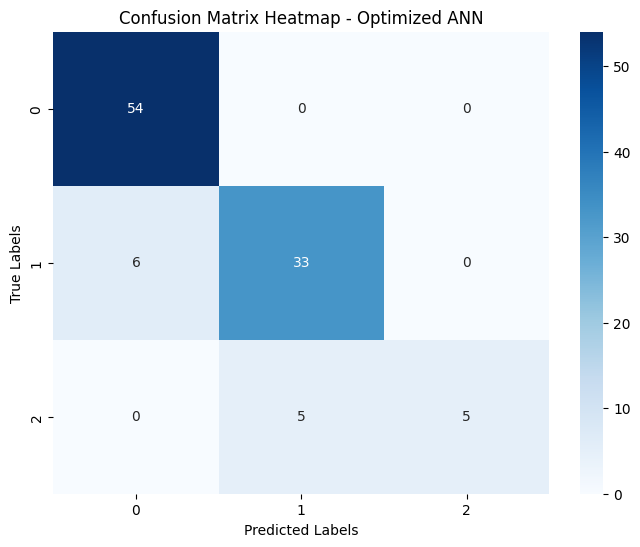

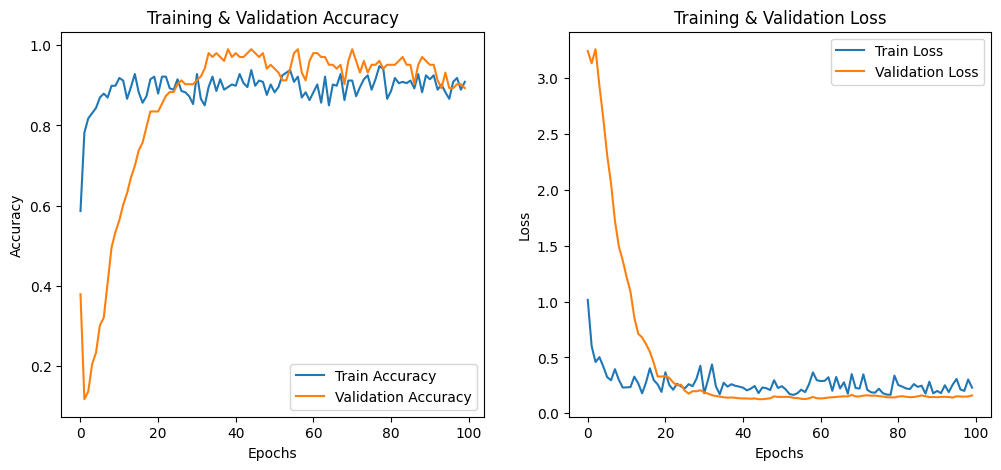

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Step 2: Define Optimized ANN Model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_2.shape[1],)),
    BatchNormalization(),  # Normalization for stable training
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(3, activation='softmax')  # Output layer (3 classes)
])

# Step 3: Compile the Model with AdamW Optimizer
model.compile(optimizer=Adam(learning_rate=0.0005),  # Smaller LR for stability
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the ANN Model
history = model.fit(X_train_2, y_train_2, epochs=100, batch_size=32, validation_data=(X_test_2, y_test_2), verbose=1)

# Step 5: Make Predictions
y_pred_prob = model.predict(X_test_2)
y_pred = np.argmax(y_pred_prob, axis=1)

# Accuracy
accuracy = accuracy_score(y_test_2, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred))

# Confusion Matrix
# Confusion Matrix
cm = confusion_matrix(y_test_2, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 6: Visualize Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Optimized ANN')
plt.show()

# Step 7: Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()


# 70-30 SPLIT

# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Step 2: Apply Standard Scaling to ensure features are on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_3)
X_test_scaled = scaler.transform(X_test_3)

# Step 3: Initialize Logistic Regression Model with regularization (C=0.01 for stronger regularization)
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, C=0.01)

# Step 4: Apply Recursive Feature Elimination (RFE) to select important features
selector = RFE(log_reg_model, n_features_to_select=7, step=1)  # Choose top 7 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train_3)
X_test_selected = selector.transform(X_test_scaled)

# Step 5: Train the Logistic Regression Model
log_reg_model.fit(X_train_selected, y_train_3)

# Step 6: Make predictions on the test set
y_pred = log_reg_model.predict(X_test_selected)

# Step 7: Evaluate the model
print("Classification Report:")
print(classification_report(y_test_3, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_3, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test_3, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        67
           1       0.77      0.82      0.80        45
           2       1.00      0.18      0.31        11

    accuracy                           0.85       123
   macro avg       0.89      0.66      0.68       123
weighted avg       0.86      0.85      0.82       123


Confusion Matrix:
[[65  2  0]
 [ 8 37  0]
 [ 0  9  2]]

Accuracy Score: 0.8455284552845529


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

# **RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Feature Scaling (Preprocessing)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_3)
X_test_scaled = scaler.transform(X_test_3)

# Step 3: Initialize Logistic Regression with Regularization
# Using L2 regularization (penalty='l2') and setting C=0.1 for stronger regularization
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',  # Supports L2 regularization
    penalty='l2',    # Apply L2 regularization
    C=0.1,           # Regularization strength
    max_iter=1000
)

# Step 4: Train the Model
model.fit(X_train_scaled, y_train_3)

# Step 5: Make Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

# Step 6: Evaluate Performance
# Calculate accuracy
accuracy = accuracy_score(y_test_3, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test_3, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_3, y_pred))


# Generate confusion matrix
cm = confusion_matrix(y_test_3, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_3, y_pred))


Accuracy: 0.8862

Confusion Matrix:
[[62  5  0]
 [ 3 42  0]
 [ 0  6  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.79      0.93      0.86        45
           2       1.00      0.45      0.62        11

    accuracy                           0.89       123
   macro avg       0.92      0.77      0.81       123
weighted avg       0.90      0.89      0.88       123


Confusion Matrix:
[[62  5  0]
 [ 3 42  0]
 [ 0  6  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.79      0.93      0.86        45
           2       1.00      0.45      0.62        11

    accuracy                           0.89       123
   macro avg       0.92      0.77      0.81       123
weighted avg       0.90      0.89      0.88       123



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# **KNN**

Accuracy: 0.7642


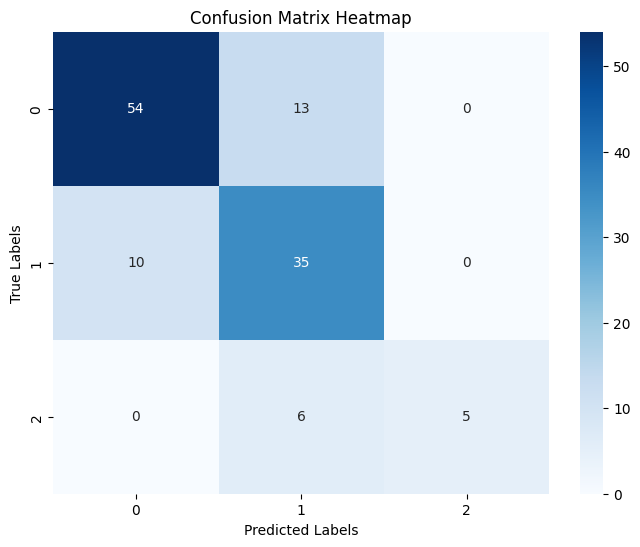


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        67
           1       0.65      0.78      0.71        45
           2       1.00      0.45      0.62        11

    accuracy                           0.76       123
   macro avg       0.83      0.68      0.72       123
weighted avg       0.79      0.76      0.76       123



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_3)
X_test_scaled = scaler.transform(X_test_3)

# Step 3: Initialize the KNN classifier
# Set n_neighbors to a default value (e.g., 5), which can be tuned later
knn = KNeighborsClassifier(n_neighbors=5)

# Step 4: Train the KNN classifier
knn.fit(X_train_scaled, y_train_3)

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Step 6: Evaluate Performance
# Calculate accuracy
accuracy = accuracy_score(y_test_3, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test_3, y_pred)

# Plot heatmap for confusion matrix
cm = confusion_matrix(y_test_3, y_pred)

# Plot heatmap for confusion matrix
plt.figure(figsize=(8, 6))
# Access classes_ from the knn model instead of best_knn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_3, y_pred))


# **SVM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_3)
X_test_scaled = scaler.transform(X_test_3)

# Step 3: Initialize the SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr')

# Step 4: Train the SVM model
svm_model.fit(X_train_scaled, y_train_3)

# Step 5: Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Step 6: Evaluate Performance
# Calculate accuracy
accuracy = accuracy_score(y_test_3, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test_3, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_3, y_pred))

Accuracy: 0.8618

Confusion Matrix:
[[60  7  0]
 [ 5 39  1]
 [ 0  4  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        67
           1       0.78      0.87      0.82        45
           2       0.88      0.64      0.74        11

    accuracy                           0.86       123
   macro avg       0.86      0.80      0.82       123
weighted avg       0.87      0.86      0.86       123



# **DECISION TREE**

✅ Final Decision Tree Accuracy (70-30 Split): 0.9268

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        67
           1       0.93      0.91      0.92        45
           2       0.62      0.91      0.74        11

    accuracy                           0.93       123
   macro avg       0.85      0.92      0.88       123
weighted avg       0.94      0.93      0.93       123



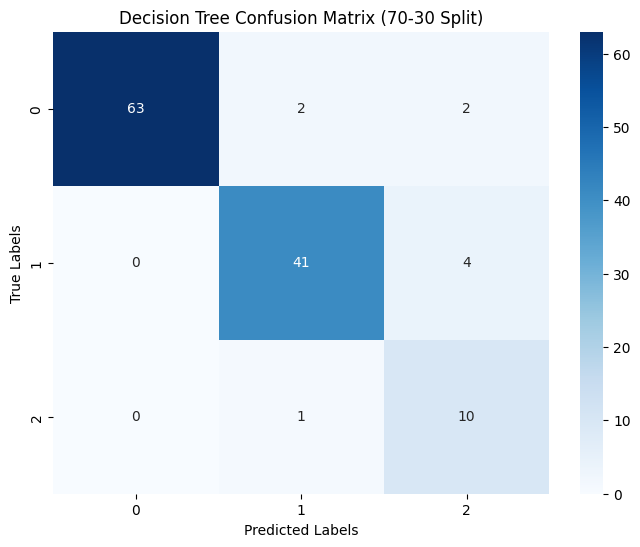

📉 Cross-validation Accuracy (70-30 Split): 0.8781
🔍 Features Selected by RFE: ['streams', 'key', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:


# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 10 features
dt = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=dt, n_features_to_select=10)
rfe.fit(X_train_3, y_train_3)

# Keep only selected features
X_train_selected = rfe.transform(X_train_3)
X_test_selected = rfe.transform(X_test_3)

# Step 3: Initialize Decision Tree with Adjusted Hyperparameters
dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features=0.8,
    random_state=42
)

# Step 4: Train the Model
dt_model.fit(X_train_selected, y_train_3)

# Step 5: Make Predictions
y_pred = dt_model.predict(X_test_selected)

# Step 6: Evaluate Model Performance
accuracy = accuracy_score(y_test_3, y_pred)
print(f"✅ Final Decision Tree Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_3, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_3, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix (70-30 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(dt_model, X_train_selected, y_train_3, cv=5)
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **RANDOM FOREST**

✅ Final Random Forest Accuracy (70-30 Split): 0.9106

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.80      1.00      0.89        45
           2       0.00      0.00      0.00        11

    accuracy                           0.91       123
   macro avg       0.60      0.67      0.63       123
weighted avg       0.84      0.91      0.87       123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


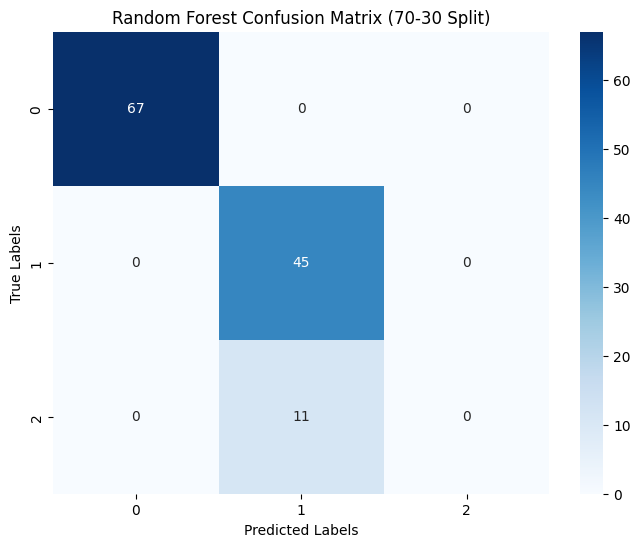

📉 Cross-validation Accuracy (70-30 Split): 0.8884
🔍 Features Selected by RFE: ['released_year', 'in_spotify_playlists', 'streams', 'in_apple_playlists', 'in_deezer_playlists']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
rf = RandomForestClassifier(n_estimators=15, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=5)
rfe.fit(X_train_3, y_train_3)

# Keep only selected features
X_train_selected = rfe.transform(X_train_3)
X_test_selected = rfe.transform(X_test_3)

# Step 3: Initialize Random Forest with Regularization
rf_model = RandomForestClassifier(
    n_estimators=15,
    max_depth=3,
    min_samples_split=70,
    min_samples_leaf=30,
    max_features=0.4,
    random_state=42
)

# Step 4: Train the Model
rf_model.fit(X_train_selected, y_train_3)

# Step 5: Make Predictions
y_pred = rf_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_3, y_pred)
print(f"✅ Final Random Forest Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_3, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_3, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix (70-30 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(rf_model, X_train_selected, y_train_3, cv=5)
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **ADABOOST**

✅ Final AdaBoost Accuracy (70-30 Split): 0.9106

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.80      1.00      0.89        45
           2       0.00      0.00      0.00        11

    accuracy                           0.91       123
   macro avg       0.60      0.67      0.63       123
weighted avg       0.84      0.91      0.87       123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


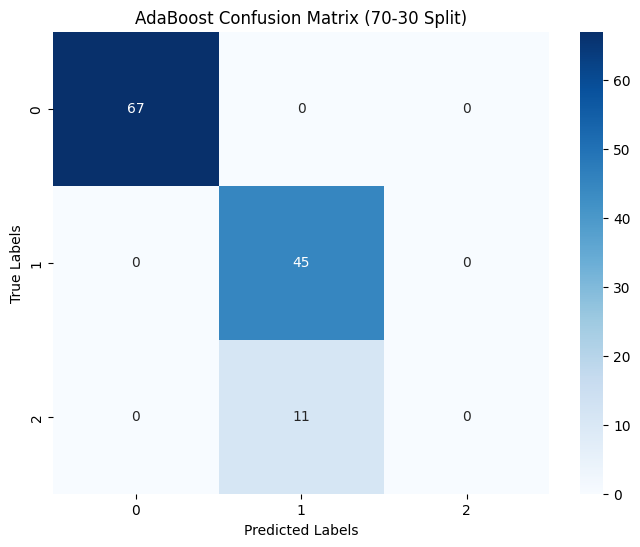

📉 Cross-validation Accuracy (70-30 Split): 0.8884
🔍 Features Selected by RFE: ['streams', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 7 Features
base_learner = DecisionTreeClassifier(max_depth=1, min_samples_leaf=50, random_state=42)
rfe = RFE(estimator=base_learner, n_features_to_select=7)
rfe.fit(X_train_3, y_train_3)

# Keep only selected features
X_train_selected = rfe.transform(X_train_3)
X_test_selected = rfe.transform(X_test_3)

# Step 3: Initialize AdaBoost with Regularization
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=50),  # Weak learner
    n_estimators=20,           # Fewer boosting rounds
    learning_rate=0.05,        # Slow learning for better generalization
    random_state=42
)

# Step 4: Train the Model
adaboost_model.fit(X_train_selected, y_train_3)

# Step 5: Make Predictions
y_pred = adaboost_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_3, y_pred)
print(f"✅ Final AdaBoost Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_3, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_3, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=adaboost_model.classes_, yticklabels=adaboost_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('AdaBoost Confusion Matrix (70-30 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(adaboost_model, X_train_selected, y_train_3, cv=5)
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **GRADIENT BOOST**

✅ Final Gradient Boosting Accuracy (70-30 Split): 0.9106

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.80      1.00      0.89        45
           2       0.00      0.00      0.00        11

    accuracy                           0.91       123
   macro avg       0.60      0.67      0.63       123
weighted avg       0.84      0.91      0.87       123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


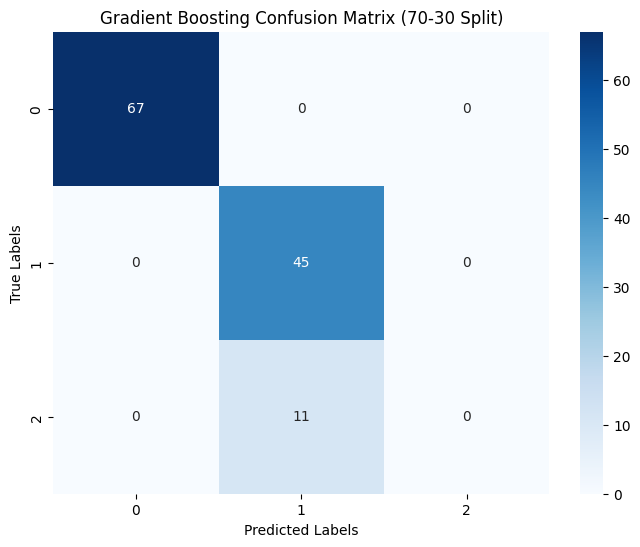

📉 Cross-validation Accuracy (70-30 Split): 0.8884
🔍 Features Selected by RFE: ['streams', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
gb = GradientBoostingClassifier(n_estimators=30, learning_rate=0.01, max_depth=1, random_state=42)
rfe = RFE(estimator=gb, n_features_to_select=5)
rfe.fit(X_train_3, y_train_3)

# Keep only selected features
X_train_selected = rfe.transform(X_train_3)
X_test_selected = rfe.transform(X_test_3)

# Step 3: Initialize Gradient Boosting with Regularization
gb_model = GradientBoostingClassifier(
    n_estimators=30,
    learning_rate=0.01,
    max_depth=1,
    min_samples_split=50,
    min_samples_leaf=50,
    random_state=42
)

# Step 4: Train the Model
gb_model.fit(X_train_selected, y_train_3)

# Step 5: Make Predictions
y_pred = gb_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_3, y_pred)
print(f"✅ Final Gradient Boosting Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_3, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_3, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gb_model.classes_, yticklabels=gb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix (70-30 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(gb_model, X_train_selected, y_train_3, cv=5)
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **XG BOOST**

✅ Final XGBoost Accuracy (70-30 Split): 0.9106

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.80      1.00      0.89        45
           2       0.00      0.00      0.00        11

    accuracy                           0.91       123
   macro avg       0.60      0.67      0.63       123
weighted avg       0.84      0.91      0.87       123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


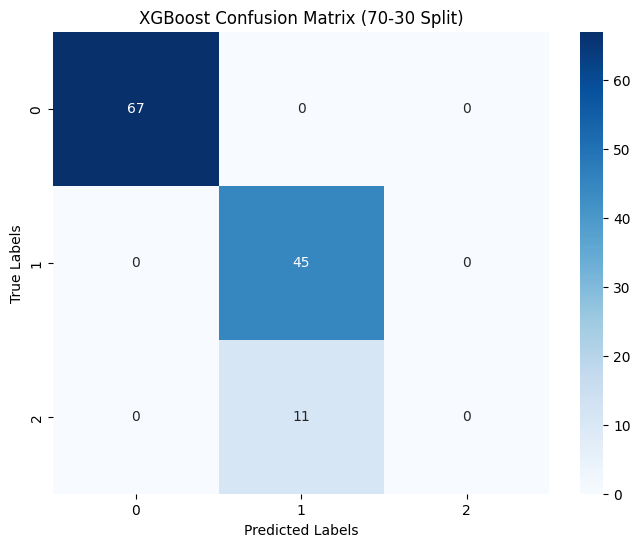

📉 Cross-validation Accuracy (70-30 Split): 0.8884
🔍 Features Selected by RFE: ['streams', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
xgb = XGBClassifier(n_estimators=30, learning_rate=0.01, max_depth=2, random_state=42)
rfe = RFE(estimator=xgb, n_features_to_select=5)
rfe.fit(X_train_3, y_train_3)

# Keep only selected features
X_train_selected = rfe.transform(X_train_3)
X_test_selected = rfe.transform(X_test_3)

# Step 3: Initialize XGBoost with Regularization
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=30,
    learning_rate=0.01,
    max_depth=2,
    min_child_weight=20,
    reg_lambda=20,
    reg_alpha=10,
    subsample=0.5,
    colsample_bytree=0.5,
    random_state=42
)

# Step 4: Train the Model
xgb_model.fit(X_train_selected, y_train_3)

# Step 5: Make Predictions
y_pred = xgb_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_3, y_pred)
print(f"✅ Final XGBoost Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_3, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_3, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGBoost Confusion Matrix (70-30 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(xgb_model, X_train_selected, y_train_3, cv=5)
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **CAT BOOST**

✅ Final CatBoost Accuracy (70-30 Split): 0.9106

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.80      1.00      0.89        45
           2       0.00      0.00      0.00        11

    accuracy                           0.91       123
   macro avg       0.60      0.67      0.63       123
weighted avg       0.84      0.91      0.87       123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


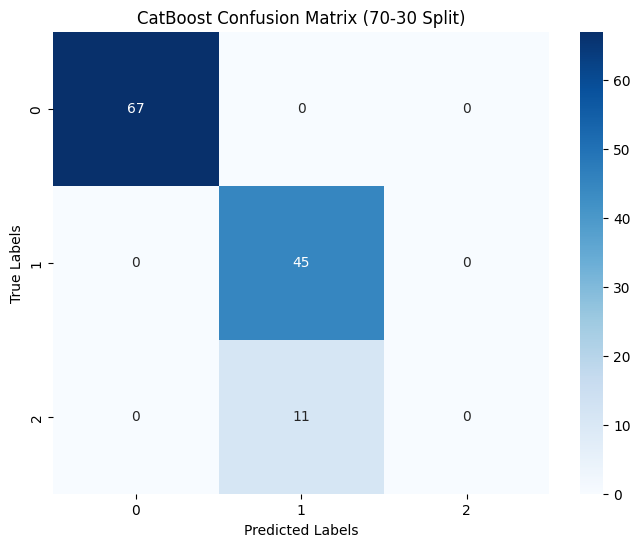

📉 Cross-validation Accuracy (70-30 Split): 0.8885
🔍 Features Selected by RFE: ['streams', 'artist_id', 'track_id']


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 3 Features
cat = CatBoostClassifier(iterations=20, learning_rate=0.005, depth=2, random_seed=42, verbose=0)
rfe = RFE(estimator=cat, n_features_to_select=3)
rfe.fit(X_train_3, y_train_3)

# Keep only selected features
X_train_selected = rfe.transform(X_train_3)
X_test_selected = rfe.transform(X_test_3)

# Step 3: Initialize CatBoost with Regularization
cat_model = CatBoostClassifier(
    iterations=20,
    learning_rate=0.005,
    depth=2,
    l2_leaf_reg=20,
    min_data_in_leaf=100,
    bagging_temperature=1.0,
    colsample_bylevel=0.5,
    loss_function='MultiClass',
    random_seed=42,
    verbose=0
)

# Step 4: Train the Model
cat_model.fit(X_train_selected, y_train_3)

# Step 5: Make Predictions
y_pred = cat_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_3, y_pred)
print(f"✅ Final CatBoost Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_3, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_3, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cat_model.classes_, yticklabels=cat_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CatBoost Confusion Matrix (70-30 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(cat_model, X_train_selected, y_train_3, cv=5)
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **BAGGING**

✅ Final Bagging Accuracy (70-30 Split): 0.9106

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.80      1.00      0.89        45
           2       0.00      0.00      0.00        11

    accuracy                           0.91       123
   macro avg       0.60      0.67      0.63       123
weighted avg       0.84      0.91      0.87       123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


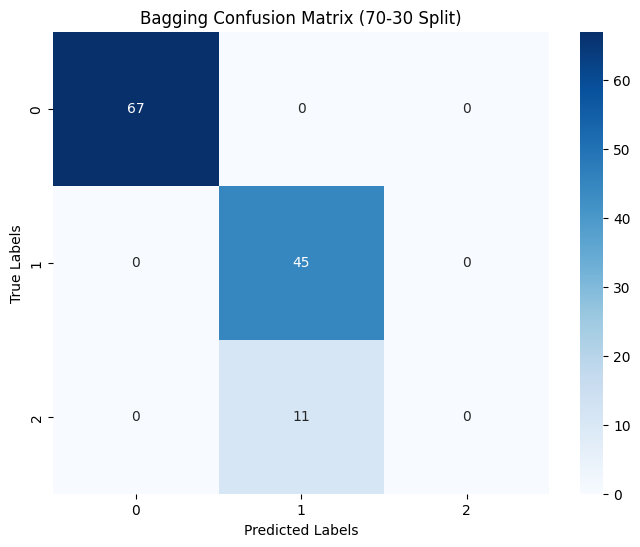

📉 Cross-validation Accuracy (70-30 Split): 0.8397
🔍 Features Selected by RFE: ['streams', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=50, random_state=42)
rfe = RFE(estimator=dt, n_features_to_select=5)
rfe.fit(X_train_3, y_train_3)

# Keep only selected features
X_train_selected = rfe.transform(X_train_3)
X_test_selected = rfe.transform(X_test_3)

# Step 3: Initialize Bagging with Regularization
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=2, min_samples_leaf=50),
    n_estimators=30,
    max_samples=0.5,
    max_features=0.5,
    random_state=42,
    n_jobs=-1
)

# Step 4: Train the Model
bagging_model.fit(X_train_selected, y_train_3)

# Step 5: Make Predictions
y_pred = bagging_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_3, y_pred)
print(f"✅ Final Bagging Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_3, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_3, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Bagging Confusion Matrix (70-30 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(bagging_model, X_train_selected, y_train_3, cv=5)
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")

# **ARTIFICIAL NEURAL NETWORK**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.3047 - loss: 1.7164 - val_accuracy: 0.0894 - val_loss: 2.3970
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7400 - loss: 0.6948 - val_accuracy: 0.1057 - val_loss: 2.5468
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7815 - loss: 0.5230 - val_accuracy: 0.1220 - val_loss: 2.5102
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8497 - loss: 0.3207 - val_accuracy: 0.1626 - val_loss: 2.4661
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8935 - loss: 0.3088 - val_accuracy: 0.2276 - val_loss: 2.2924
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9031 - loss: 0.3140 - val_accuracy: 0.2439 - val_loss: 2.0467
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8796 - loss: 0.3391 - val_accuracy: 0.3089 - val_loss: 1.8565
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8869 - loss: 0.2655 - val_accuracy: 0.3740 - val_loss:

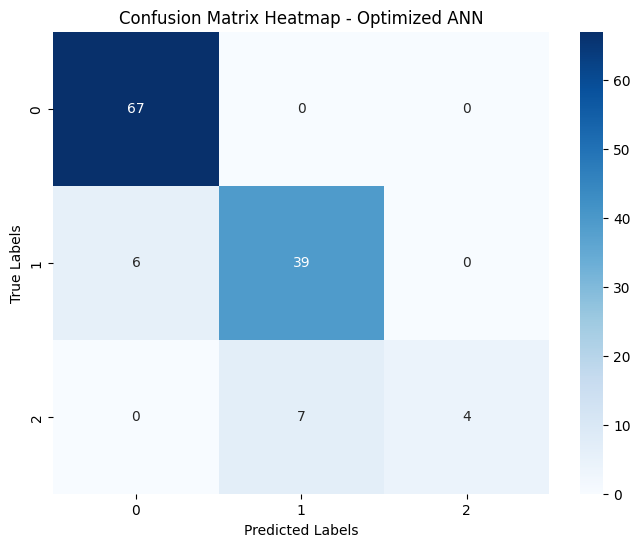

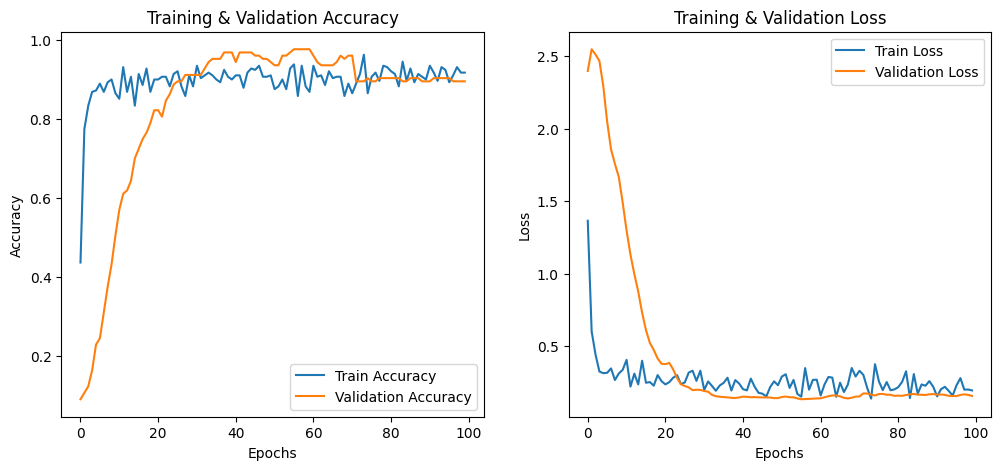

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Step 2: Define Optimized ANN Model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_3.shape[1],)),
    BatchNormalization(),  # Normalization for stable training
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(3, activation='softmax')  # Output layer (3 classes)
])

# Step 3: Compile the Model with AdamW Optimizer
model.compile(optimizer=Adam(learning_rate=0.0005),  # Smaller LR for stability
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the ANN Model
history = model.fit(X_train_3, y_train_3, epochs=100, batch_size=32, validation_data=(X_test_3, y_test_3), verbose=1)

# Step 5: Make Predictions
y_pred_prob = model.predict(X_test_3)
y_pred = np.argmax(y_pred_prob, axis=1)

# Accuracy
accuracy = accuracy_score(y_test_3, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_3, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_3, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 6: Visualize Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Optimized ANN')
plt.show()

# Step 7: Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()



# **60-40 SPLIT**

# **LOGISTIC REGRESSION**

In [ ]:

# Step 2: Apply Standard Scaling to ensure features are on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_4)
X_test_scaled = scaler.transform(X_test_4)

# Step 3: Initialize Logistic Regression Model with regularization (C=0.01 for stronger regularization)
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, C=0.01)

# Step 4: Apply Recursive Feature Elimination (RFE) to select important features
selector = RFE(log_reg_model, n_features_to_select=7, step=1)  # Choose top 7 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train_4)
X_test_selected = selector.transform(X_test_scaled)

# Step 5: Train the Logistic Regression Model
log_reg_model.fit(X_train_selected, y_train_4)

# Step 6: Make predictions on the test set
y_pred = log_reg_model.predict(X_test_selected)

print("\nAccuracy Score:", accuracy_score(y_test_4, y_pred))

# Step 7: Evaluate the model
print("Classification Report:")
print(classification_report(y_test_4, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_4, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi


Accuracy Score: 0.8292682926829268
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        86
           1       0.75      0.82      0.78        62
           2       1.00      0.12      0.22        16

    accuracy                           0.83       164
   macro avg       0.88      0.64      0.64       164
weighted avg       0.84      0.83      0.80       164


Confusion Matrix:
[[83  3  0]
 [11 51  0]
 [ 0 14  2]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# **RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 2: Feature Scaling (Preprocessing)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_4)
X_test_scaled = scaler.transform(X_test_4)

# Step 3: Initialize Logistic Regression with Regularization
# Using L2 regularization (penalty='l2') and setting C=0.1 for stronger regularization
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',  # Supports L2 regularization
    penalty='l2',    # Apply L2 regularization
    C=0.1,           # Regularization strength
    max_iter=1000
)

# Step 4: Train the Model
model.fit(X_train_scaled, y_train_4)

# Step 5: Make Predictions
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluate Performance
# Calculate accuracy
accuracy = accuracy_score(y_test_4, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test_4, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_4, y_pred))


Accuracy: 0.8537

Confusion Matrix:
[[78  8  0]
 [ 5 56  1]
 [ 0 10  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        86
           1       0.76      0.90      0.82        62
           2       0.86      0.38      0.52        16

    accuracy                           0.85       164
   macro avg       0.85      0.73      0.76       164
weighted avg       0.86      0.85      0.85       164



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# **KNN**

Accuracy: 0.7744


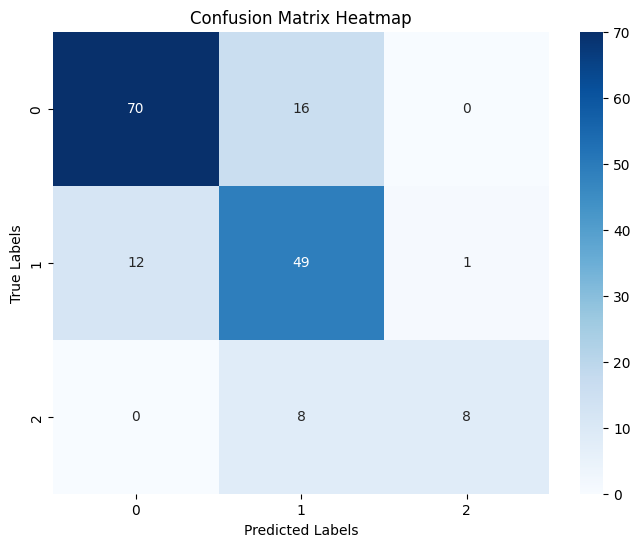


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        86
           1       0.67      0.79      0.73        62
           2       0.89      0.50      0.64        16

    accuracy                           0.77       164
   macro avg       0.80      0.70      0.73       164
weighted avg       0.79      0.77      0.77       164



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_4)
X_test_scaled = scaler.transform(X_test_4)

# Step 3: Initialize the KNN classifier
# Set n_neighbors to a default value (e.g., 5), which can be tuned later
knn = KNeighborsClassifier(n_neighbors=5)

# Step 4: Train the KNN classifier
knn.fit(X_train_scaled, y_train_4)

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Step 6: Evaluate Performance
# Calculate accuracy
accuracy = accuracy_score(y_test_4, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test_4, y_pred)

# Plot heatmap for confusion matrix
cm = confusion_matrix(y_test_4, y_pred)

# Plot heatmap for confusion matrix
plt.figure(figsize=(8, 6))
# Access classes_ from the knn model instead of best_knn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_4, y_pred))


# SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_4)
X_test_scaled = scaler.transform(X_test_4)

# Step 3: Initialize the SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr')

# Step 4: Train the SVM model
svm_model.fit(X_train_scaled, y_train_4)

# Step 5: Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Step 6: Evaluate Performance
# Calculate accuracy
accuracy = accuracy_score(y_test_4, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test_4, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_4, y_pred))

Accuracy: 0.8354

Confusion Matrix:
[[75 11  0]
 [ 6 55  1]
 [ 0  9  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        86
           1       0.73      0.89      0.80        62
           2       0.88      0.44      0.58        16

    accuracy                           0.84       164
   macro avg       0.84      0.73      0.76       164
weighted avg       0.85      0.84      0.83       164



# **DECISION TREE**

✅ Final Decision Tree Accuracy (60-40 Split): 0.9451

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        86
           1       0.87      1.00      0.93        62
           2       1.00      0.62      0.77        16

    accuracy                           0.95       164
   macro avg       0.96      0.86      0.89       164
weighted avg       0.95      0.95      0.94       164



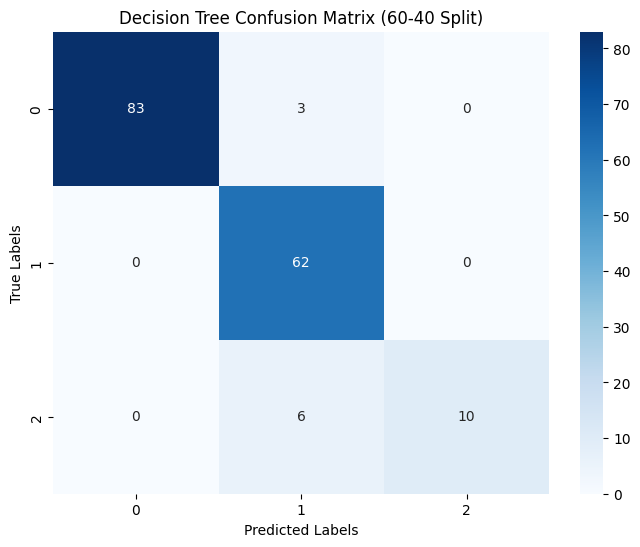

📉 Cross-validation Accuracy (60-40 Split): 0.8781
🔍 Features Selected by RFE: ['streams', 'key', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 10 features
dt = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=dt, n_features_to_select=10)
rfe.fit(X_train_4, y_train_4)

# Keep only selected features
X_train_selected = rfe.transform(X_train_4)
X_test_selected = rfe.transform(X_test_4)

# Step 3: Initialize Decision Tree with Adjusted Hyperparameters
dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=30,
    min_samples_leaf=10,
    max_features=0.7,
    random_state=42
)

# Step 4: Train the Model
dt_model.fit(X_train_selected, y_train_4)

# Step 5: Make Predictions
y_pred = dt_model.predict(X_test_selected)

# Step 6: Evaluate Model Performance
accuracy = accuracy_score(y_test_4, y_pred)
print(f"✅ Final Decision Tree Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_4, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_4, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix (60-40 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(dt_model, X_train_selected, y_train_4, cv=5)
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# RANDOM FOREST

✅ Final Random Forest Accuracy (60-40 Split): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.79      1.00      0.89        62
           2       0.00      0.00      0.00        16

    accuracy                           0.90       164
   macro avg       0.60      0.67      0.63       164
weighted avg       0.82      0.90      0.86       164



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


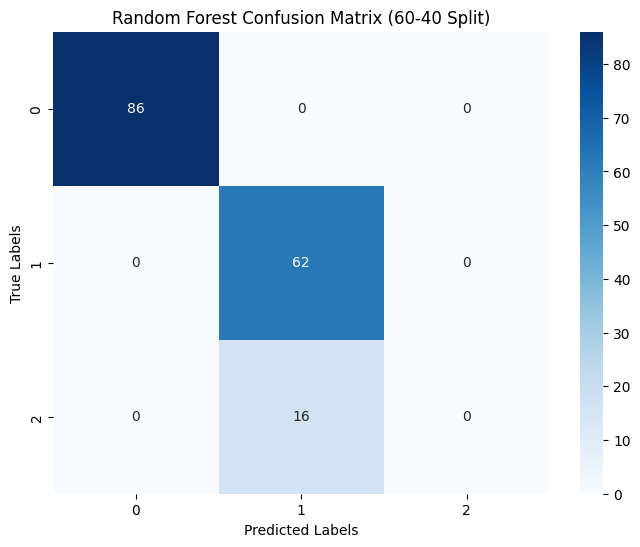

📉 Cross-validation Accuracy (60-40 Split): 0.8902
🔍 Features Selected by RFE: ['released_year', 'in_spotify_playlists', 'streams', 'in_apple_playlists', 'in_apple_charts']


In [ ]:

# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
rf = RandomForestClassifier(n_estimators=15, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=5)
rfe.fit(X_train_4, y_train_4)

# Keep only selected features
X_train_selected = rfe.transform(X_train_4)
X_test_selected = rfe.transform(X_test_4)

# Step 3: Initialize Random Forest with Regularization
rf_model = RandomForestClassifier(
    n_estimators=15,
    max_depth=3,
    min_samples_split=70,
    min_samples_leaf=30,
    max_features=0.4,
    random_state=42
)

# Step 4: Train the Model
rf_model.fit(X_train_selected, y_train_4)

# Step 5: Make Predictions
y_pred = rf_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_4, y_pred)
print(f"✅ Final Random Forest Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_4, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_4, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix (60-40 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(rf_model, X_train_selected, y_train_4, cv=5)
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **ADABOOST**

✅ Final AdaBoost Accuracy (60-40 Split): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.79      1.00      0.89        62
           2       0.00      0.00      0.00        16

    accuracy                           0.90       164
   macro avg       0.60      0.67      0.63       164
weighted avg       0.82      0.90      0.86       164



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


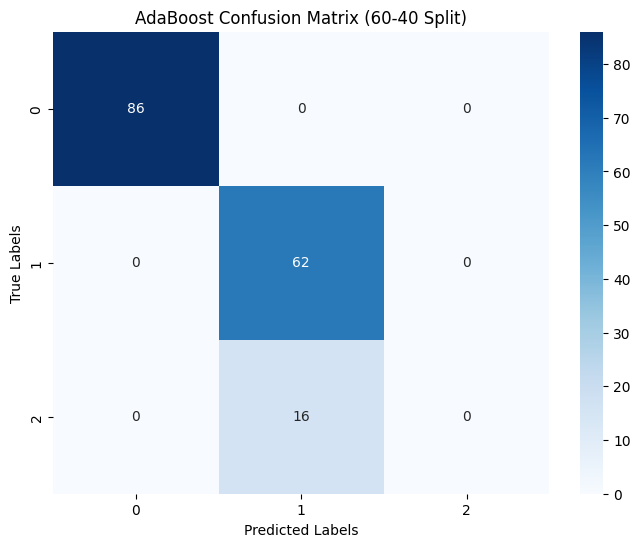

📉 Cross-validation Accuracy (60-40 Split): 0.8902
🔍 Features Selected by RFE: ['streams', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 7 Features
base_learner = DecisionTreeClassifier(max_depth=1, min_samples_leaf=50, random_state=42)
rfe = RFE(estimator=base_learner, n_features_to_select=7)
rfe.fit(X_train_4, y_train_4)

# Keep only selected features
X_train_selected = rfe.transform(X_train_4)
X_test_selected = rfe.transform(X_test_4)

# Step 3: Initialize AdaBoost with Regularization
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=50),  # Weak learner
    n_estimators=20,           # Fewer boosting rounds
    learning_rate=0.05,        # Slow learning for better generalization
    random_state=42
)

# Step 4: Train the Model
adaboost_model.fit(X_train_selected, y_train_4)

# Step 5: Make Predictions
y_pred = adaboost_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_4, y_pred)
print(f"✅ Final AdaBoost Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_4, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_4, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=adaboost_model.classes_, yticklabels=adaboost_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('AdaBoost Confusion Matrix (60-40 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(adaboost_model, X_train_selected, y_train_4, cv=5)
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# GRADIENT BOOST

✅ Final Gradient Boosting Accuracy (60-40 Split): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.79      1.00      0.89        62
           2       0.00      0.00      0.00        16

    accuracy                           0.90       164
   macro avg       0.60      0.67      0.63       164
weighted avg       0.82      0.90      0.86       164



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


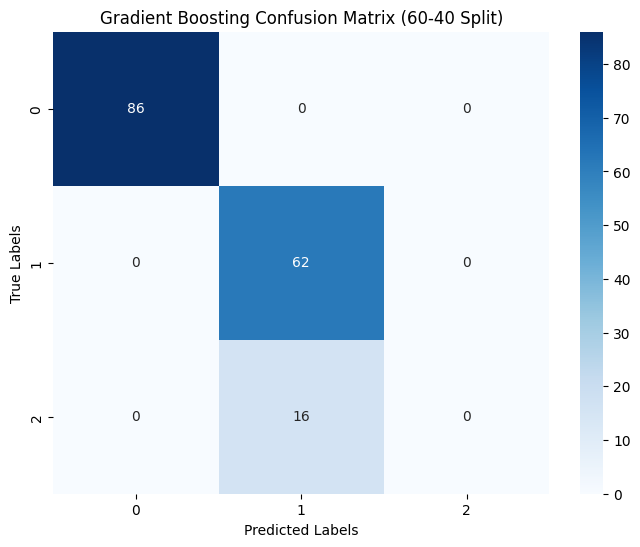

📉 Cross-validation Accuracy (60-40 Split): 0.8902
🔍 Features Selected by RFE: ['streams', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:

# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
gb = GradientBoostingClassifier(n_estimators=30, learning_rate=0.01, max_depth=1, random_state=42)
rfe = RFE(estimator=gb, n_features_to_select=5)
rfe.fit(X_train_4, y_train_4)

# Keep only selected features
X_train_selected = rfe.transform(X_train_4)
X_test_selected = rfe.transform(X_test_4)

# Step 3: Initialize Gradient Boosting with Regularization
gb_model = GradientBoostingClassifier(
    n_estimators=30,
    learning_rate=0.01,
    max_depth=1,
    min_samples_split=50,
    min_samples_leaf=50,
    random_state=42
)

# Step 4: Train the Model
gb_model.fit(X_train_selected, y_train_4)

# Step 5: Make Predictions
y_pred = gb_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_4, y_pred)
print(f"✅ Final Gradient Boosting Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_4, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_4, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gb_model.classes_, yticklabels=gb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix (60-40 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(gb_model, X_train_selected, y_train_4, cv=5)
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **XG BOOST**

✅ Final XGBoost Accuracy (60-40 Split): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.79      1.00      0.89        62
           2       0.00      0.00      0.00        16

    accuracy                           0.90       164
   macro avg       0.60      0.67      0.63       164
weighted avg       0.82      0.90      0.86       164



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


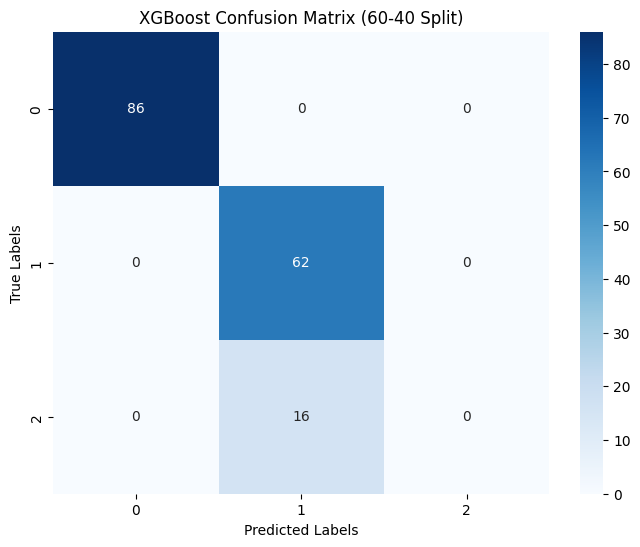

📉 Cross-validation Accuracy (60-40 Split): 0.8699
🔍 Features Selected by RFE: ['streams', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
xgb = XGBClassifier(n_estimators=30, learning_rate=0.01, max_depth=2, random_state=42)
rfe = RFE(estimator=xgb, n_features_to_select=5)
rfe.fit(X_train_4, y_train_4)

# Keep only selected features
X_train_selected = rfe.transform(X_train_4)
X_test_selected = rfe.transform(X_test_4)

# Step 3: Initialize XGBoost with Regularization
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=30,
    learning_rate=0.01,
    max_depth=2,
    min_child_weight=20,
    reg_lambda=20,
    reg_alpha=10,
    subsample=0.5,
    colsample_bytree=0.5,
    random_state=42
)

# Step 4: Train the Model
xgb_model.fit(X_train_selected, y_train_4)

# Step 5: Make Predictions
y_pred = xgb_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_4, y_pred)
print(f"✅ Final XGBoost Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_4, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_4, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGBoost Confusion Matrix (60-40 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(xgb_model, X_train_selected, y_train_4, cv=5)
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **CAT BOOST**

✅ Final CatBoost Accuracy (60-40 Split): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.79      1.00      0.89        62
           2       0.00      0.00      0.00        16

    accuracy                           0.90       164
   macro avg       0.60      0.67      0.63       164
weighted avg       0.82      0.90      0.86       164



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


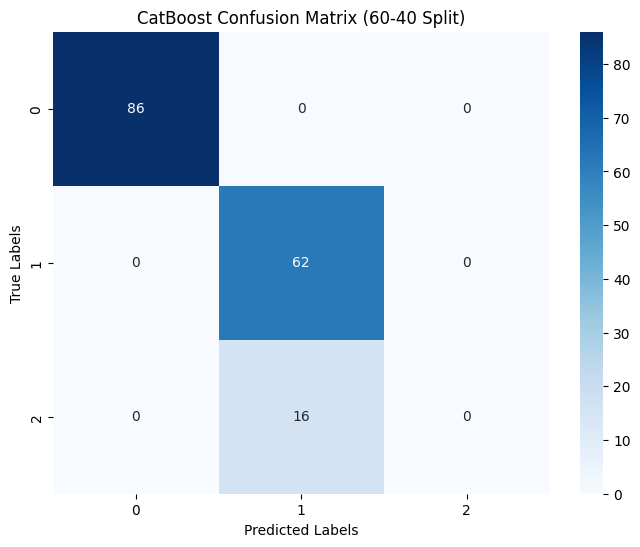

📉 Cross-validation Accuracy (60-40 Split): 0.8820
🔍 Features Selected by RFE: ['in_spotify_playlists', 'streams', 'valence_%']


In [ ]:

# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 3 Features
cat = CatBoostClassifier(iterations=20, learning_rate=0.005, depth=2, random_seed=42, verbose=0)
rfe = RFE(estimator=cat, n_features_to_select=3)
rfe.fit(X_train_4, y_train_4)

# Keep only selected features
X_train_selected = rfe.transform(X_train_4)
X_test_selected = rfe.transform(X_test_4)

# Step 3: Initialize CatBoost with Regularization
cat_model = CatBoostClassifier(
    iterations=20,
    learning_rate=0.005,
    depth=2,
    l2_leaf_reg=20,
    min_data_in_leaf=100,
    bagging_temperature=1.0,
    colsample_bylevel=0.5,
    loss_function='MultiClass',
    random_seed=42,
    verbose=0
)

# Step 4: Train the Model
cat_model.fit(X_train_selected, y_train_4)

# Step 5: Make Predictions
y_pred = cat_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_4, y_pred)
print(f"✅ Final CatBoost Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_4, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_4, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cat_model.classes_, yticklabels=cat_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CatBoost Confusion Matrix (60-40 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(cat_model, X_train_selected, y_train_4, cv=5)
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **BAGGING**

✅ Final Bagging Accuracy (60-40 Split): 0.8598

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        86
           1       0.77      0.89      0.83        62
           2       0.00      0.00      0.00        16

    accuracy                           0.86       164
   macro avg       0.57      0.63      0.60       164
weighted avg       0.78      0.86      0.82       164



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


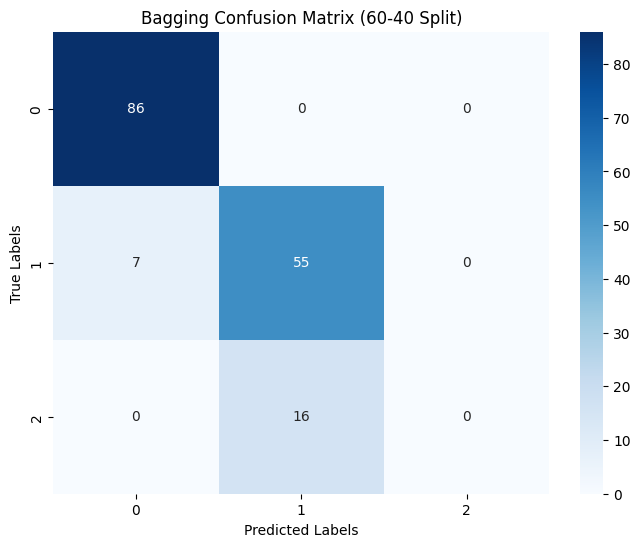

📉 Cross-validation Accuracy (60-40 Split): 0.4756
🔍 Features Selected by RFE: ['streams', 'liveness_%', 'speechiness_%', 'artist_id', 'track_id']


In [ ]:

# Step 2: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=50, random_state=42)
rfe = RFE(estimator=dt, n_features_to_select=5)
rfe.fit(X_train_4, y_train_4)

# Keep only selected features
X_train_selected = rfe.transform(X_train_4)
X_test_selected = rfe.transform(X_test_4)

# Step 3: Initialize Bagging with Regularization
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=2, min_samples_leaf=50),
    n_estimators=30,
    max_samples=0.5,
    max_features=0.5,
    random_state=42,
    n_jobs=-1
)

# Step 4: Train the Model
bagging_model.fit(X_train_selected, y_train_4)

# Step 5: Make Predictions
y_pred = bagging_model.predict(X_test_selected)

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test_4, y_pred)
print(f"✅ Final Bagging Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_4, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_4, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Bagging Confusion Matrix (60-40 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(bagging_model, X_train_selected, y_train_4, cv=5)
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")

# Step 8: Display Selected Features
selected_features = X.columns[rfe.support_]
print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **ARTIFICIAL NEURAL NETOWRK**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.3569 - loss: 1.6336 - val_accuracy: 0.0976 - val_loss: 5.9160
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6116 - loss: 0.9401 - val_accuracy: 0.0976 - val_loss: 5.9773
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7686 - loss: 0.7920 - val_accuracy: 0.1220 - val_loss: 5.9566
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8164 - loss: 0.5738 - val_accuracy: 0.1768 - val_loss: 5.4183
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8700 - loss: 0.4431 - val_accuracy: 0.2439 - val_loss: 4.4072
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8873 - loss: 0.3530 - val_accuracy: 0.2683 - val_loss: 3.5777
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8818 - loss: 0.4425 - val_accuracy: 0.3110 - val_loss: 3.0829
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8892 - loss: 0.4127 - val_accuracy: 0.3902 - val_loss:

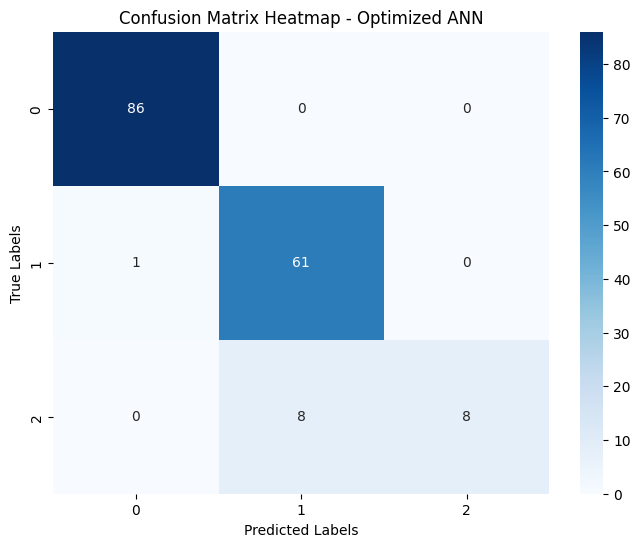

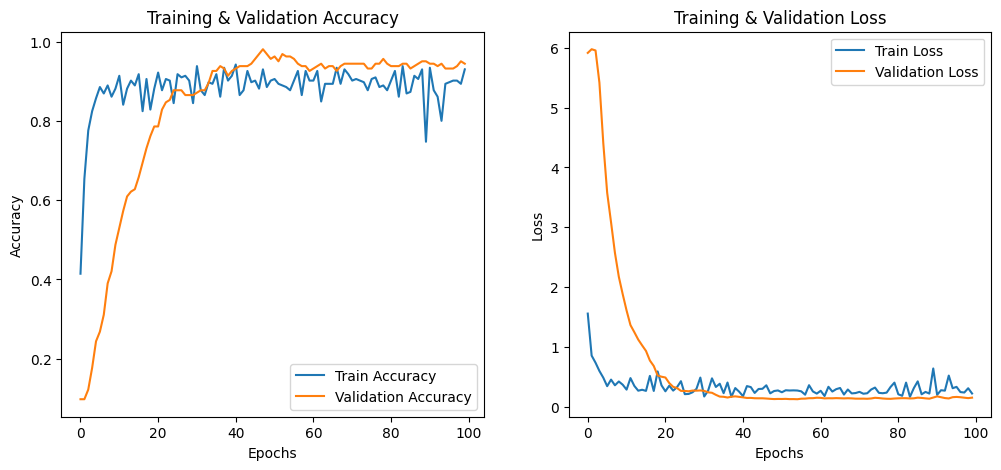

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Step 2: Define Optimized ANN Model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_4.shape[1],)),
    BatchNormalization(),  # Normalization for stable training
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(4, activation='softmax')  # Output layer (3 classes)
])

# Step 3: Compile the Model with AdamW Optimizer
model.compile(optimizer=Adam(learning_rate=0.0005),  # Smaller LR for stability
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the ANN Model
history = model.fit(X_train_4, y_train_4, epochs=100, batch_size=32, validation_data=(X_test_4, y_test_4), verbose=1)

# Step 5: Make Predictions
y_pred_prob = model.predict(X_test_4)
y_pred = np.argmax(y_pred_prob, axis=1)

# Accuracy
accuracy = accuracy_score(y_test_4, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_4, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_4, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 6: Visualize Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Optimized ANN')
plt.show()

# Step 7: Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()


# **MULTI-COLLINEARITY CHECK**

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Ensure all data is numeric (convert or handle non-numeric columns)
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)  # Handle missing values

# Step 2: Define a function to calculate VIF
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data

# Step 3: Iteratively remove features with high VIF
def remove_multicollinearity(data, threshold=5.0):
    while True:
        # Calculate VIF for all features
        vif = calculate_vif(data)
        print(vif)

        # Check if all VIF values are below the threshold
        max_vif = vif['VIF'].max()
        if max_vif < threshold:
            break  # Exit the loop if no VIF exceeds the threshold

        # Find the feature with the highest VIF
        max_vif_feature = vif.loc[vif['VIF'].idxmax(), 'Feature']
        print(f"Removing feature: {max_vif_feature} (VIF: {max_vif})")

        # Drop the feature with the highest VIF
        data = data.drop(columns=[max_vif_feature])

    return data

# Step 4: Remove multicollinearity
threshold = 5.0  # Set your desired VIF threshold
X_cleaned = remove_multicollinearity(X, threshold)

# Display the remaining features
print("\nRemaining features after multicollinearity removal:")
print(X_cleaned.columns)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                 Feature         VIF
0           artist_count    7.784550
1          released_year  116.473168
2         released_month    4.392105
3           released_day    3.821852
4   in_spotify_playlists    7.390204
5      in_spotify_charts    2.338205
6                streams    6.731476
7     in_apple_playlists    5.428292
8        in_apple_charts    2.772997
9    in_deezer_playlists    4.640004
10      in_deezer_charts    1.462782
11      in_shazam_charts    1.600581
12                   bpm   21.330666
13                   key    3.549201
14                  mode    2.379381
15        danceability_%   34.197244
16             valence_%    9.549962
17              energy_%   32.484691
18        acousticness_%    3.784340
19    instrumentalness_%         NaN
20            liveness_%    2.984602
21         speechiness_%    2.573656
22             artist_id    5.570168
23              track_id   13.093730
Removing feature: released_year (VIF: 116.47316815833214)
                 

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                 Feature        VIF
0           artist_count   6.830694
1         released_month   4.200367
2           released_day   3.578279
3   in_spotify_playlists   7.249081
4      in_spotify_charts   2.297264
5                streams   6.652426
6     in_apple_playlists   5.399544
7        in_apple_charts   2.608085
8    in_deezer_playlists   4.594226
9       in_deezer_charts   1.457026
10      in_shazam_charts   1.574810
11                   bpm  13.331463
12                   key   3.451020
13                  mode   2.260844
14             valence_%   6.488004
15        acousticness_%   2.219695
16    instrumentalness_%        NaN
17            liveness_%   2.777257
18         speechiness_%   2.528444
19             artist_id   5.465351
20              track_id  10.956531
Removing feature: bpm (VIF: 13.331463379699128)
                 Feature       VIF
0           artist_count  6.660956
1         released_month  4.111435
2           released_day  3.547885
3   in_spotify_playl

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
# Import necessary libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define a function to calculate VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i).round(1) for i in range(X.shape[1])]
    return vif

# Function to iteratively remove features with high VIF
def remove_high_vif(X, threshold=5.0):

    while True:
        vif = calc_vif(X)
        max_vif = vif['VIF'].max()
        if max_vif < threshold:
            break
        # Identify the feature with the highest VIF
        max_vif_feature = vif.loc[vif['VIF'].idxmax(), 'variables']
        print(f"Removing feature: {max_vif_feature} (VIF: {max_vif})")
        # Drop the feature with the highest VIF
        X = X.drop(columns=[max_vif_feature])
    return X, vif

# Set VIF threshold
threshold = 5.0  # Use 3.0 for stricter removal

# Remove high VIF variables
X_cleaned1, final_vif = remove_high_vif(X, threshold)

# Display remaining features and their VIF
print("\nRemaining features after multicollinearity removal:")
print(final_vif)

# X_cleaned1 contains the cleaned features


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature: released_year (VIF: 116.5)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature: energy_% (VIF: 24.1)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature: danceability_% (VIF: 22.6)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature: bpm (VIF: 13.3)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature: track_id (VIF: 9.6)
Removing feature: in_spotify_playlists (VIF: 7.0)
Removing feature: artist_count (VIF: 6.5)
Removing feature: valence_% (VIF: 5.3)

Remaining features after multicollinearity removal:
              variables  VIF
0        released_month  3.8
1          released_day  3.4
2     in_spotify_charts  2.1
3               streams  4.4
4    in_apple_playlists  4.6
5       in_apple_charts  2.4
6   in_deezer_playlists  4.4
7      in_deezer_charts  1.4
8      in_shazam_charts  1.5
9                   key  3.1
10                 mode  2.2
11       acousticness_%  2.1
12   instrumentalness_%  NaN
13           liveness_%  2.5
14        speechiness_%  2.3
15            artist_id  3.3


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


# **TRAIN-TEST SPLITS**

In [ ]:
from sklearn.model_selection import train_test_split
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X_cleaned1, y, test_size=0.2, random_state=42)
X_train_75, X_test_25, y_train_75, y_test_25 = train_test_split(X_cleaned1, y, test_size=0.25, random_state=42)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_cleaned1, y, test_size=0.3, random_state=42)
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X_cleaned1, y, test_size=0.4, random_state=42)



# **80-20 SPLIT**

# **LOGISTIC REGRESSION**

<ipython-input-41-c615cfe5658f>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_80['instrumentalness_%'].fillna(X_train_80['instrumentalness_%'].median(), inplace=True)
<ipython-input-41-c615cfe5658f>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

✅ Final Logistic Regression Accuracy (Optimized): 0.8902

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.85      0.88      0.87        33
           2       0.80      0.50      0.62         8

    accuracy                           0.89        82
   macro avg       0.86      0.78      0.81        82
weighted avg       0.89      0.89      0.88        82


Confusion Matrix:
[[40  1  0]
 [ 3 29  1]
 [ 0  4  4]]


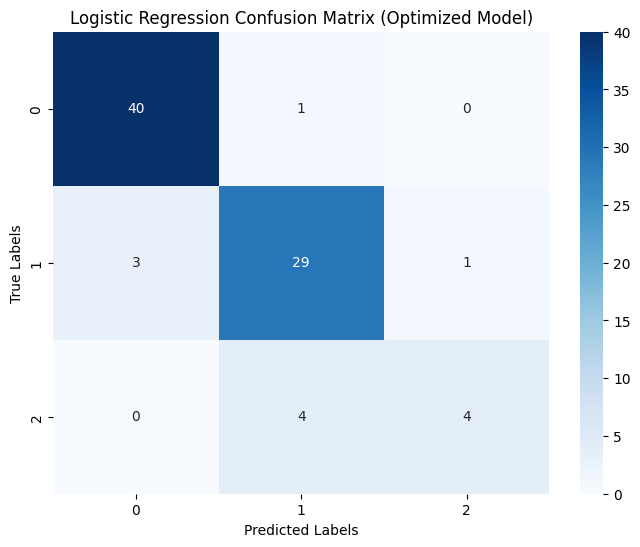

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Handle Missing Values (Fill NaNs with Median)
X_train_80['instrumentalness_%'].fillna(X_train_80['instrumentalness_%'].median(), inplace=True)
X_test_20['instrumentalness_%'].fillna(X_test_20['instrumentalness_%'].median(), inplace=True)

# Step 3: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_80)
X_test_scaled = scaler.transform(X_test_20)

# Step 4: Apply Recursive Feature Elimination (RFE) - Selecting 10 Features
model = LogisticRegression(max_iter=500, C=0.1, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train_80)

# Keep only the selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 5: Initialize Logistic Regression with Regularization
model = LogisticRegression(max_iter=500, C=0.1, random_state=42)

# Step 6: Train the Model
model.fit(X_train_selected, y_train_80)

# Step 7: Make Predictions
y_pred_20 = model.predict(X_test_selected)

# Step 8: Evaluate Model Performance
accuracy = accuracy_score(y_test_20, y_pred_20)
print(f"✅ Final Logistic Regression Accuracy (Optimized): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_20, y_pred_20))

# Confusion Matrix
cm = confusion_matrix(y_test_20, y_pred_20)
print("\nConfusion Matrix:")
print(cm)

# Step 9: Visualize Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix (Optimized Model)')
plt.show()


# **RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE


# Step 2: Feature Scaling (Preprocessing)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_80)
X_test_scaled = scaler.transform(X_test_20)

# Step 3: Apply Feature Selection (RFE) to Select Important Features
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Apply Recursive Feature Elimination (RFE) to select the best features
selector = RFE(model, n_features_to_select=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train_80)
X_test_selected = selector.transform(X_test_scaled)

# Step 4: Grid Search for Best Regularization (C)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1]}  # Tuning C for better performance
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
                           param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_selected, y_train_80)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Step 5: Train the Optimized Model
best_model.fit(X_train_selected, y_train_80)

# Step 6: Make Predictions
y_pred = best_model.predict(X_test_selected)

# Step 7: Evaluate Performance
accuracy = accuracy_score(y_test_20, y_pred)
print(f"Optimized Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test_20, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_20, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Optimized Accuracy: 0.9390

Confusion Matrix:
[[41  0  0]
 [ 1 32  0]
 [ 0  4  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       0.89      0.97      0.93        33
           2       1.00      0.50      0.67         8

    accuracy                           0.94        82
   macro avg       0.96      0.82      0.86        82
weighted avg       0.94      0.94      0.93        82



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# **KNN**

In [ ]:
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
!pip install mlxtend --upgrade  # Upgrade mlxtend to the latest version

# Import necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

✅ Final KNN Accuracy (Optimized): 0.8415

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        41
           1       0.79      0.82      0.81        33
           2       1.00      0.38      0.55         8

    accuracy                           0.84        82
   macro avg       0.89      0.71      0.75        82
weighted avg       0.85      0.84      0.83        82


Confusion Matrix:
[[39  2  0]
 [ 6 27  0]
 [ 0  5  3]]


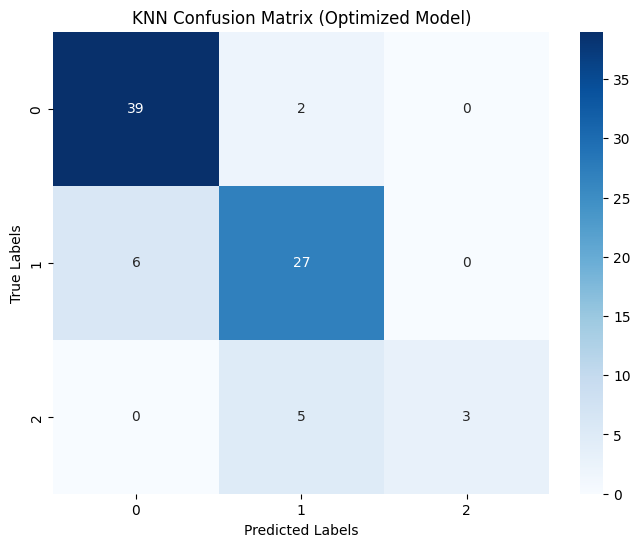

📉 Cross-validation Accuracy (80-20): 0.8537
🔍 Features Selected by SFS: ['released_month', 'released_day', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'bpm', 'mode']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_80)
X_test_scaled = scaler.transform(X_test_20)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 7 Features
knn = KNeighborsClassifier(n_neighbors=5)
# Initialize SFS with 5-fold cross-validation to select 7 features
sfs = SFS(
    knn,
    k_features=7,  # Number of features to select
    forward=True,  # Use forward selection (equivalent to 'direction'='forward')
    floating=False,  # Disable floating search (if needed)
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available CPU cores for faster processing
)              # 5-fold cross-validation

sfs.fit(X_train_scaled, y_train_80)

# Keep only selected features
X_train_selected = sfs.transform(X_train_scaled)
X_test_selected = sfs.transform(X_test_scaled)

# Step 4: Initialize KNN with Regularization
knn_model = KNeighborsClassifier(
    n_neighbors=15,  # Higher k to reduce variance
    weights='uniform',  # Equal weight to all neighbors
    metric='manhattan',  # Use Manhattan distance instead of Euclidean
    n_jobs=-1
)

# Step 5: Train the Model
knn_model.fit(X_train_selected, y_train_80)

# Step 6: Make Predictions
y_pred1 = knn_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_20, y_pred1)
print(f"✅ Final KNN Accuracy (Optimized): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_20, y_pred1))

# Confusion Matrix
cm = confusion_matrix(y_test_20, y_pred1)
print("\nConfusion Matrix:")
print(cm)

# Step 8: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('KNN Confusion Matrix (Optimized Model)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(knn_model, X_train_selected, y_train_80, cv=5)
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = sfs.k_feature_idx_  # Get indices of selected features
selected_features = X.columns[list(selected_feature_indices)]  # Get feature names

print(f"🔍 Features Selected by SFS: {selected_features.tolist()}")


# **SVM**

✅ Final SVM Accuracy (Optimized & Balanced): 0.8537

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        41
           1       0.80      0.85      0.82        33
           2       0.71      0.62      0.67         8

    accuracy                           0.85        82
   macro avg       0.81      0.79      0.80        82
weighted avg       0.85      0.85      0.85        82


Confusion Matrix:
[[37  4  0]
 [ 3 28  2]
 [ 0  3  5]]


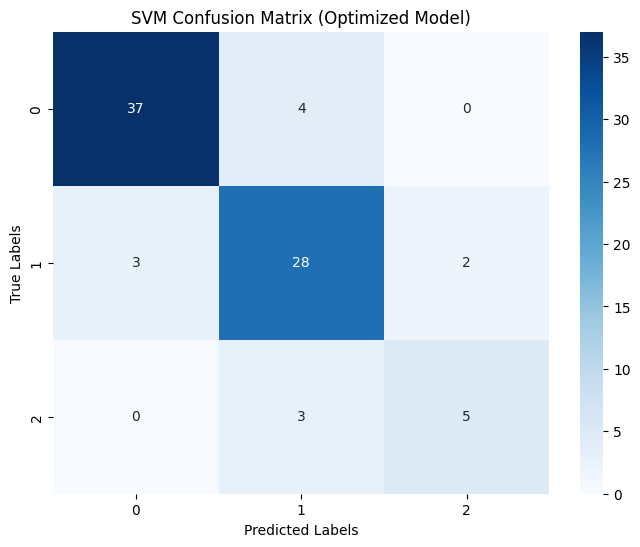

📉 Cross-validation Accuracy (80-20): 0.9055
🔍 Features Selected by SFS: ['released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'bpm', 'danceability_%']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_80)
X_test_scaled = scaler.transform(X_test_20)

# Step 3: Apply Sequential Feature Selection (SFS) - Selecting 10 Features
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
sfs = SFS(
    svm,
    k_features=10,
    forward=True,
    floating=False,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train_scaled, y_train_80)

# Keep only selected features
X_train_selected = sfs.transform(X_train_scaled)
X_test_selected = sfs.transform(X_test_scaled)

# Step 4: Initialize SVM with Updated Regularization
svm_model = SVC(
    kernel='rbf',  # Switch back to RBF for better pattern recognition
    C=1.0,  # Allow more complexity while keeping regularization
    gamma='scale',  # Scale gamma automatically for optimal performance
    random_state=42
)

# Step 5: Train the Model
svm_model.fit(X_train_selected, y_train_80)

# Step 6: Make Predictions
y_pred5 = svm_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_20, y_pred5)
print(f"✅ Final SVM Accuracy (Optimized & Balanced): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_20, y_pred5))

# Confusion Matrix
cm = confusion_matrix(y_test_20, y_pred5)
print("\nConfusion Matrix:")
print(cm)

# Step 8: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Confusion Matrix (Optimized Model)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(svm_model, X_train_selected, y_train_80, cv=5)
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = sfs.k_feature_idx_
selected_features = X.columns[list(selected_feature_indices)]

print(f"🔍 Features Selected by SFS: {selected_features.tolist()}")


# **DECISION TREE**

✅ Final Decision Tree Accuracy (RFE Optimized): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      0.76      0.86        33
           2       0.50      1.00      0.67         8

    accuracy                           0.90        82
   macro avg       0.83      0.92      0.84        82
weighted avg       0.95      0.90      0.91        82


Confusion Matrix:
[[41  0  0]
 [ 0 25  8]
 [ 0  0  8]]


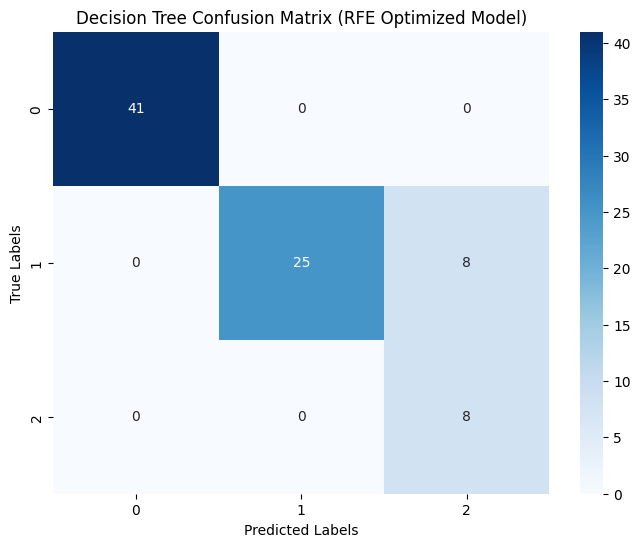

📉 Cross-validation Accuracy (80-20): 0.9115
🔍 Features Selected by RFE: ['streams', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_80)
X_test_scaled = scaler.transform(X_test_20)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
dt = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=dt, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train_80)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize Decision Tree with Stronger Regularization
dt_model = DecisionTreeClassifier(
    max_depth=2,  # Reduce depth further to prevent overfitting
    min_samples_split=100,  # Forces larger splits
    min_samples_leaf=50,  # Prevents small, overfitted leaves
    random_state=42
)

# Step 5: Train the Model
dt_model.fit(X_train_selected, y_train_80)

# Step 6: Make Predictions
ypred1 = dt_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_20, ypred1)
print(f"✅ Final Decision Tree Accuracy (RFE Optimized): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_20, ypred1))

# Confusion Matrix
cm = confusion_matrix(y_test_20, ypred1)
print("\nConfusion Matrix:")
print(cm)

# Step 8: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix (RFE Optimized Model)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(dt_model, X_train_selected, y_train_80, cv=5)
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **RANDOM FOREST**

✅ Final Random Forest Accuracy (Optimized): 0.9390

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.87      1.00      0.93        33
           2       1.00      0.38      0.55         8

    accuracy                           0.94        82
   macro avg       0.96      0.79      0.83        82
weighted avg       0.95      0.94      0.93        82


Confusion Matrix:
[[41  0  0]
 [ 0 33  0]
 [ 0  5  3]]


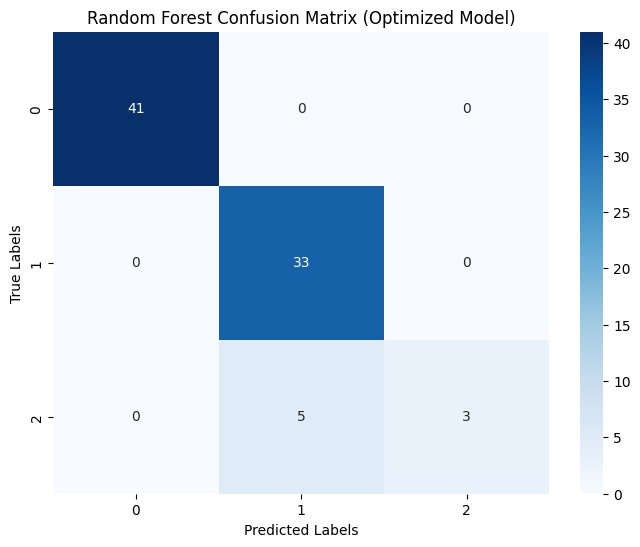

📉 Cross-validation Accuracy (80-20): 0.9422
🔍 Features Selected by RFE: ['in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_shazam_charts', 'artist_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_80)
X_test_scaled = scaler.transform(X_test_20)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 7 Features
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=7)
rfe.fit(X_train_scaled, y_train_80)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize Random Forest with Stronger Regularization
rf_model = RandomForestClassifier(
    n_estimators=70,  # Fewer trees to reduce variance
    max_depth=3,  # Smaller tree depth to prevent memorization
    min_samples_split=10,  # Forces larger splits
    min_samples_leaf=10,  # Prevents small, overfitted leaves
    random_state=42,
    n_jobs=-1
)

# Step 5: Train the Model
rf_model.fit(X_train_selected, y_train_80)

# Step 6: Make Predictions
ypred5 = rf_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_20, ypred5)
print(f"✅ Final Random Forest Accuracy (Optimized): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_20, ypred5))

# Confusion Matrix
cm = confusion_matrix(y_test_20, ypred5)
print("\nConfusion Matrix:")
print(cm)

# Step 8: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix (Optimized Model)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(rf_model, X_train_selected, y_train_80, cv=5)
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **ADABOOST**

✅ Final AdaBoost Accuracy (Fully Regularized): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.80      1.00      0.89        33
           2       0.00      0.00      0.00         8

    accuracy                           0.90        82
   macro avg       0.60      0.67      0.63        82
weighted avg       0.82      0.90      0.86        82


Confusion Matrix:
[[41  0  0]
 [ 0 33  0]
 [ 0  8  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


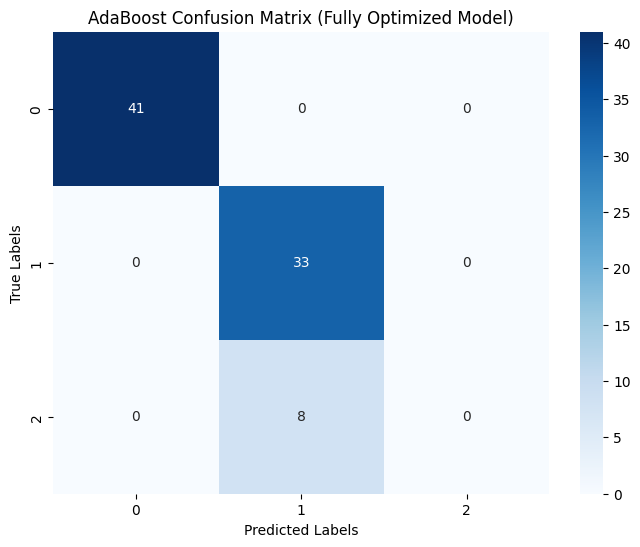

📉 Cross-validation Accuracy (80-20): 0.8934
🔍 Features Selected by RFE: ['streams', 'speechiness_%', 'artist_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_80)
X_test_scaled = scaler.transform(X_test_20)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 3 Features
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)  # Stumps
rfe = RFE(estimator=base_estimator, n_features_to_select=3)
rfe.fit(X_train_scaled, y_train_80)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize AdaBoost with Extreme Regularization
base_estimator = DecisionTreeClassifier(max_depth=1, min_samples_leaf=20, random_state=42)  # Stumps with larger leaves
adaboost_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=20,  # Further reduced boosting rounds
    learning_rate=0.05,  # Slows down learning even more
    random_state=42
)

# Step 5: Train the Model
adaboost_model.fit(X_train_selected, y_train_80)

# Step 6: Make Predictions
y1pred = adaboost_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_20, y1pred)
print(f"✅ Final AdaBoost Accuracy (Fully Regularized): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_20, y1pred))

# Confusion Matrix
cm = confusion_matrix(y_test_20, y1pred)
print("\nConfusion Matrix:")
print(cm)

# Step 8: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('AdaBoost Confusion Matrix (Fully Optimized Model)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(adaboost_model, X_train_selected, y_train_80, cv=10)  # Stratified 10-Fold CV
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **GRADIENT BOOST**

✅ Final Gradient Boosting Accuracy (Fully Regularized): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.80      1.00      0.89        33
           2       0.00      0.00      0.00         8

    accuracy                           0.90        82
   macro avg       0.60      0.67      0.63        82
weighted avg       0.82      0.90      0.86        82


Confusion Matrix:
[[41  0  0]
 [ 0 33  0]
 [ 0  8  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


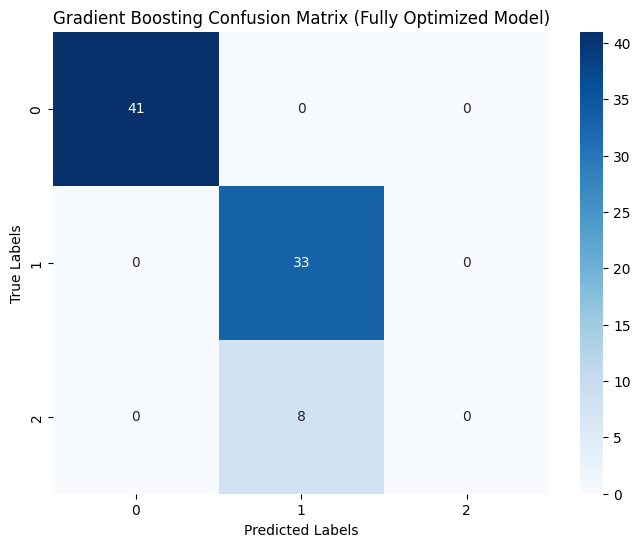

📉 Cross-validation Accuracy (80-20): 0.8934
🔍 Features Selected by RFE: ['streams', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_80)
X_test_scaled = scaler.transform(X_test_20)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
gb = GradientBoostingClassifier(n_estimators=30, max_depth=1, random_state=42)
rfe = RFE(estimator=gb, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train_80)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize Gradient Boosting with Extreme Regularization
gb_model = GradientBoostingClassifier(
    n_estimators=30,  # Further reduced boosting rounds
    learning_rate=0.01,  # Slows down learning even more
    max_depth=1,  # Ensures very simple weak learners
    min_samples_leaf=20,  # Prevents small, overfitted leaves
    random_state=42
)

# Step 5: Train the Model
gb_model.fit(X_train_selected, y_train_80)

# Step 6: Make Predictions
y_gb_pred = gb_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_20, y_gb_pred)
print(f"✅ Final Gradient Boosting Accuracy (Fully Regularized): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_20, y_gb_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_20, y_gb_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 8: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix (Fully Optimized Model)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(gb_model, X_train_selected, y_train_80, cv=10)  # Stratified 10-Fold CV
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **XG BOOST**

✅ Final XGBoost Accuracy (Fully Regularized): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.80      1.00      0.89        33
           2       0.00      0.00      0.00         8

    accuracy                           0.90        82
   macro avg       0.60      0.67      0.63        82
weighted avg       0.82      0.90      0.86        82


Confusion Matrix:
[[41  0  0]
 [ 0 33  0]
 [ 0  8  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


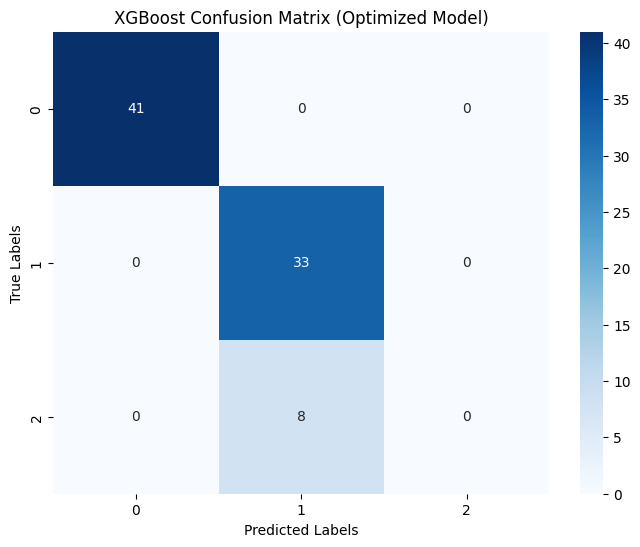

📉 Cross-validation Accuracy (80-20): 0.8964
🔍 Features Selected by RFE: ['released_day', 'streams', 'in_shazam_charts']


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_80)
X_test_scaled = scaler.transform(X_test_20)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 3 Features
xgb = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
rfe = RFE(estimator=xgb, n_features_to_select=3)
rfe.fit(X_train_scaled, y_train_80)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize XGBoost with Extreme Regularization
xgb_model = XGBClassifier(
    objective='multi:softmax',  # Multiclass classification
    num_class=3,
    n_estimators=10,            # Further reduced boosting rounds
    learning_rate=0.005,        # Extremely slow learning rate
    max_depth=1,                # Shallowest trees (stumps)
    min_child_weight=20,        # Restricting leaf size further
    random_state=42
)

# Step 5: Train the Model
xgb_model.fit(X_train_selected, y_train_80)

# Step 6: Make Predictions
y5pred = xgb_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_20, y5pred)
print(f"✅ Final XGBoost Accuracy (Fully Regularized): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_20, y5pred))

# Confusion Matrix
cm = confusion_matrix(y_test_20, y5pred)
print("\nConfusion Matrix:")
print(cm)

# Step 8: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGBoost Confusion Matrix (Optimized Model)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(xgb_model, X_train_selected, y_train_80, cv=10)  # Stratified 10-Fold CV
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **CAT BOOST**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.7 MB/s eta 0:00:00


✅ Final CatBoost Accuracy (Extremely Regularized): 0.8780

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       0.79      0.94      0.86        33
           2       0.00      0.00      0.00         8

    accuracy                           0.88        82
   macro avg       0.58      0.65      0.61        82
weighted avg       0.80      0.88      0.83        82


Confusion Matrix:
[[41  0  0]
 [ 2 31  0]
 [ 0  8  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


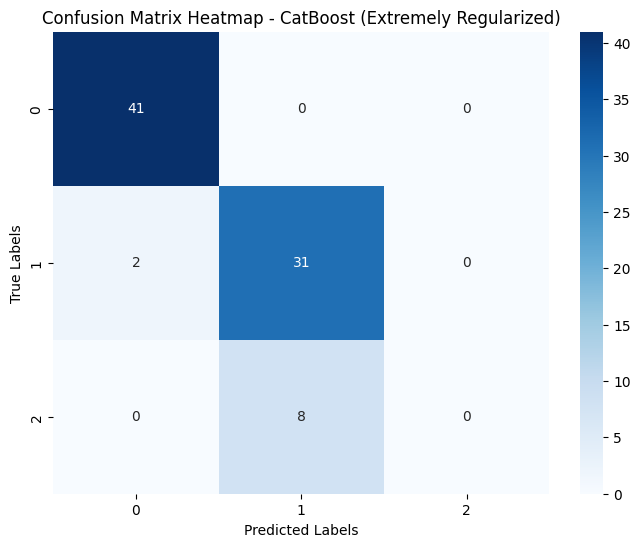

📉 Cross-validation Accuracy (80-20): 0.8964


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Initialize CatBoost with Further Regularization
cat_model = CatBoostClassifier(
    iterations=10,           # Further reduce the number of boosting iterations
    learning_rate=0.005,     # Extremely slow learning rate
    depth=1,                 # Use stumps (shallowest trees)
    random_seed=42,
    verbose=0,               # Suppress training output
    loss_function='MultiClass',  # Multiclass classification
    min_data_in_leaf=30,     # Larger minimum leaf size
    l2_leaf_reg=10           # Stronger regularization on leaf nodes
)

# Step 3: Train the CatBoost Model
cat_model.fit(X_train_80, y_train_80)

# Step 4: Make Predictions
y_cat_pred = cat_model.predict(X_test_20)

# Step 5: Evaluate Performance
accuracy = accuracy_score(y_test_20, y_cat_pred)
print(f"✅ Final CatBoost Accuracy (Extremely Regularized): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_20, y_cat_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_20, y_cat_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 6: Visualize Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap - CatBoost (Extremely Regularized)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(cat_model, X_train_80, y_train_80, cv=10)  # 10-Fold Cross-Validation
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")


# **BAGGING**

✅ Final Bagging Accuracy (Fine-Tuned): 0.8902

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       0.82      0.97      0.89        33
           2       0.00      0.00      0.00         8

    accuracy                           0.89        82
   macro avg       0.59      0.66      0.62        82
weighted avg       0.81      0.89      0.85        82


Confusion Matrix:
[[41  0  0]
 [ 1 32  0]
 [ 1  7  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


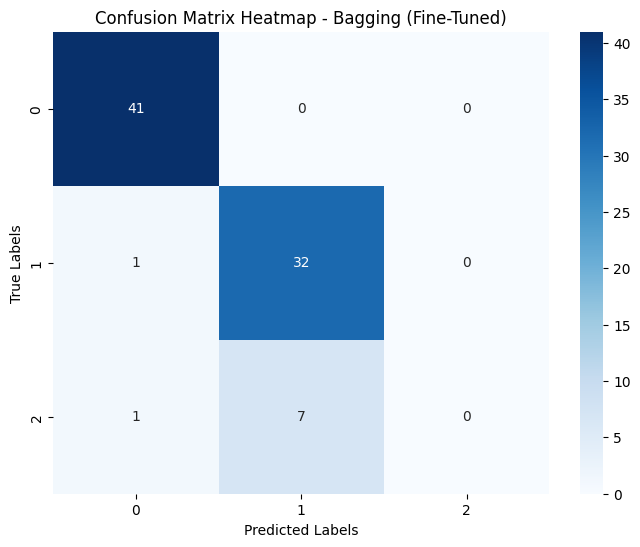

📉 Cross-validation Accuracy (80-20): 0.8566


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Initialize Bagging Classifier with additional regularization
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=2,  # Further reduce depth for simpler trees
        min_samples_split=50,  # Increase min samples per split
        min_samples_leaf=20,   # Increase min samples per leaf
        random_state=0
    ),
    n_estimators=10,  # Further reduce number of trees to prevent overfitting
    max_features=0.2,  # Use even fewer features per tree
    random_state=0,
    n_jobs=-1  # Use all CPU cores for efficiency
)

# Step 3: Train the Bagging Model
bagging_model.fit(X_train_80, y_train_80)

# Step 4: Make Predictions
y_pred = bagging_model.predict(X_test_20)

# Step 5: Evaluate Performance
accuracy = accuracy_score(y_test_20, y_pred)
print(f"✅ Final Bagging Accuracy (Fine-Tuned): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_20, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_20, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 6: Visualize Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Bagging (Fine-Tuned)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(bagging_model, X_train_80, y_train_80, cv=10)  # 10-Fold Cross-Validation
print(f"📉 Cross-validation Accuracy (80-20): {cv_scores.mean():.4f}")


# **ARTIFICIAL NEURAL NETWORK**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.3147 - loss: 1.5378 - val_accuracy: 0.4024 - val_loss: 1.8016
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7084 - loss: 0.6852 - val_accuracy: 0.1220 - val_loss: 1.8000
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7806 - loss: 0.5618 - val_accuracy: 0.1707 - val_loss: 2.4190
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7888 - loss: 0.5535 - val_accuracy: 0.2195 - val_loss: 2.4727
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7976 - loss: 0.4522 - val_accuracy: 0.2805 - val_loss: 2.2067
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8297 - loss: 0.4361 - val_accuracy: 0.3293 - val_loss: 1.9673
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9277 - loss: 0.2744 - val_accuracy: 0.3659 - val_loss: 1.7180
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8730 - loss: 0.3887 - val_accuracy: 0.

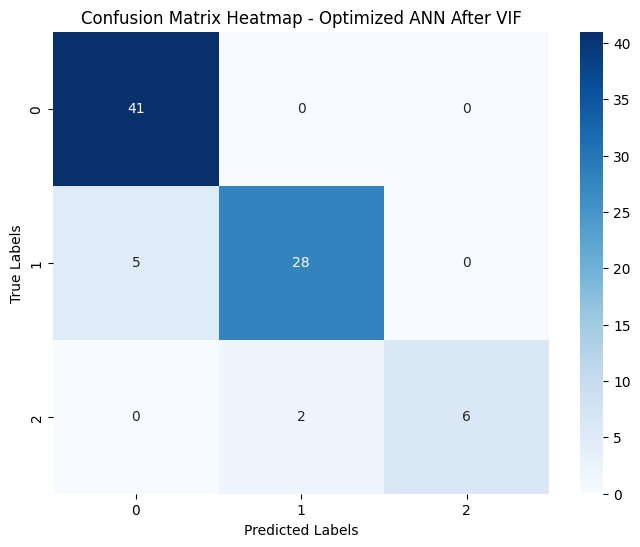

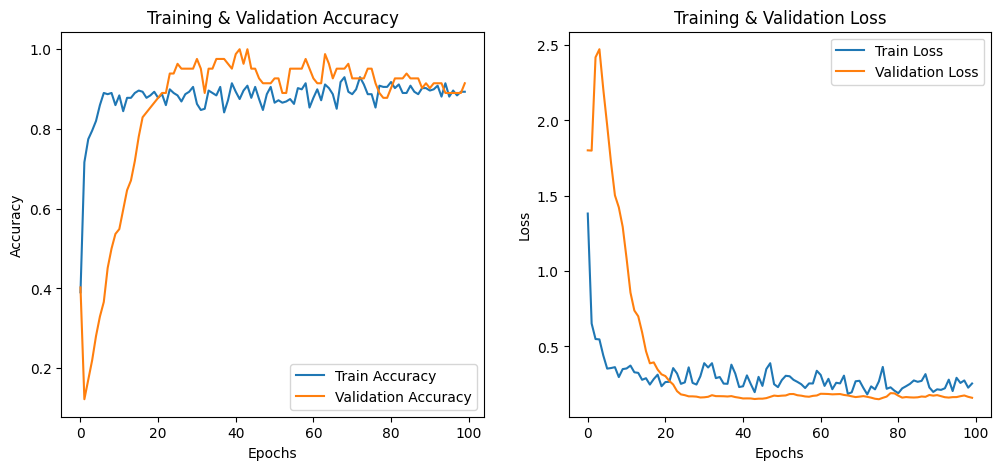

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Step 2: Define Optimized ANN Model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_80.shape[1],)),
    BatchNormalization(),  # Normalization for stable training
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(3, activation='softmax')  # Output layer (3 classes)
])

# Step 3: Compile the Model with AdamW Optimizer
model.compile(optimizer=Adam(learning_rate=0.0005),  # Lower LR for stability
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the ANN Model
history = model.fit(X_train_80, y_train_80, epochs=100, batch_size=32, validation_data=(X_test_20, y_test_20), verbose=1)

# Step 5: Make Predictions
y_pred_prob = model.predict(X_test_20)
y_pred = np.argmax(y_pred_prob, axis=1)

# Accuracy
accuracy = accuracy_score(y_test_20, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_20, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_20, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 6: Visualize Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Optimized ANN After VIF')
plt.show()

# Step 7: Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()


# 75-25 SPLIT

# **LOGISTIC REGRESSION**

<ipython-input-59-176db7dd0bf1>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_75['instrumentalness_%'].fillna(X_train_75['instrumentalness_%'].median(), inplace=True)
<ipython-input-59-176db7dd0bf1>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

✅ Final Logistic Regression Accuracy (75-25 Split): 0.9126

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.84      0.95      0.89        39
           2       1.00      0.60      0.75        10

    accuracy                           0.91       103
   macro avg       0.93      0.83      0.86       103
weighted avg       0.92      0.91      0.91       103



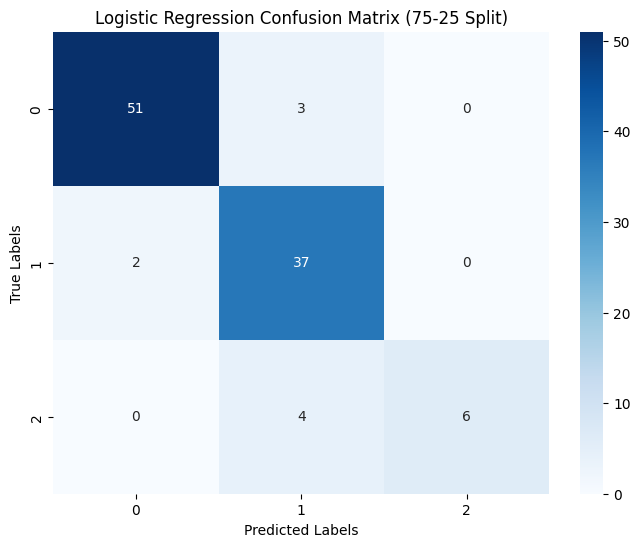

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



# Step 2: Handle Missing Values
X_train_75['instrumentalness_%'].fillna(X_train_75['instrumentalness_%'].median(), inplace=True)
X_test_25['instrumentalness_%'].fillna(X_test_25['instrumentalness_%'].median(), inplace=True)

# Step 3: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_75)
X_test_scaled = scaler.transform(X_test_25)

# Step 4: Apply Recursive Feature Elimination (RFE) - Selecting 10 Features
model = LogisticRegression(max_iter=500, C=0.1, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train_75)

# Keep only the selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 5: Train the Model
model.fit(X_train_selected, y_train_75)

# Step 6: Make Predictions
y_pred_25 = model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_25, y_pred_25)
print(f"✅ Final Logistic Regression Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_25, y_pred_25))

# Confusion Matrix
cm = confusion_matrix(y_test_25, y_pred_25)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix (75-25 Split)')
plt.show()


# **RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE

# Step 2: Feature Scaling (Preprocessing)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_75)
X_test_scaled = scaler.transform(X_test_25)

# Step 3: Apply Feature Selection (RFE) to Select Important Features
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Apply Recursive Feature Elimination (RFE) to select the best features
selector = RFE(model, n_features_to_select=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train_75)
X_test_selected = selector.transform(X_test_scaled)

# Step 4: Grid Search for Best Regularization (C)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1]}  # Tuning C for better performance
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
                           param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_selected, y_train_75)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Step 5: Train the Optimized Model
best_model.fit(X_train_selected, y_train_75)

# Step 6: Make Predictions
y_pred = best_model.predict(X_test_selected)

# Step 7: Evaluate Performance
accuracy = accuracy_score(y_test_25, y_pred)
print(f"Optimized Accuracy (75-25 Split): {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test_25, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_25, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Optimized Accuracy (75-25 Split): 0.9126

Confusion Matrix:
[[53  1  0]
 [ 4 35  0]
 [ 0  4  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.88      0.90      0.89        39
           2       1.00      0.60      0.75        10

    accuracy                           0.91       103
   macro avg       0.93      0.83      0.86       103
weighted avg       0.92      0.91      0.91       103



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# **KNN**

✅ Final KNN Accuracy (75-25 Split): 0.8544

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        54
           1       0.79      0.85      0.81        39
           2       1.00      0.40      0.57        10

    accuracy                           0.85       103
   macro avg       0.89      0.73      0.77       103
weighted avg       0.86      0.85      0.85       103



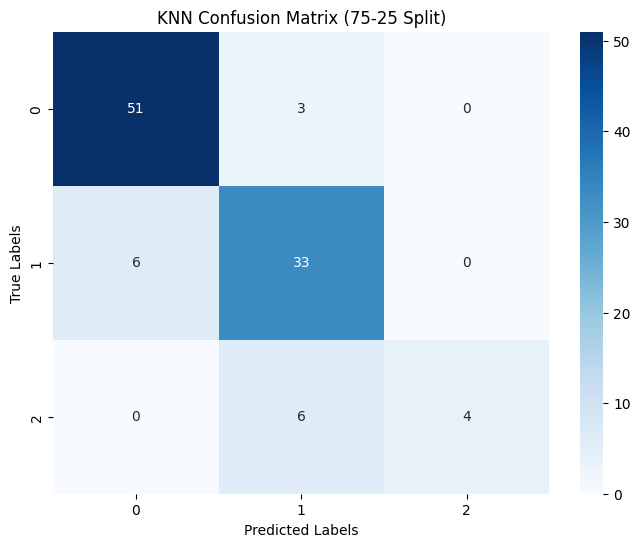

📉 Cross-validation Accuracy (75-25 Split): 0.8502
🔍 Features Selected by SFS: ['released_month', 'released_day', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'bpm', 'mode']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_75)
X_test_scaled = scaler.transform(X_test_25)

# Step 3: Apply Sequential Feature Selection (SFS) - Selecting 7 Features
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SFS(
    knn,
    k_features=7,
    forward=True,
    floating=False,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train_scaled, y_train_75)

# Keep only selected features
X_train_selected = sfs.transform(X_train_scaled)
X_test_selected = sfs.transform(X_test_scaled)

# Step 4: Initialize KNN with Regularization
knn_model = KNeighborsClassifier(
    n_neighbors=15,
    weights='uniform',
    metric='manhattan',
    n_jobs=-1
)

# Step 5: Train the Model
knn_model.fit(X_train_selected, y_train_75)

# Step 6: Make Predictions
y_pred_25 = knn_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_25, y_pred_25)
print(f"✅ Final KNN Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_25, y_pred_25))

# Confusion Matrix
cm = confusion_matrix(y_test_25, y_pred_25)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('KNN Confusion Matrix (75-25 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(knn_model, X_train_selected, y_train_75, cv=5)
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = sfs.k_feature_idx_
selected_features = X.columns[list(selected_feature_indices)]

print(f"🔍 Features Selected by SFS: {selected_features.tolist()}")


# **SVM**

✅ Final SVM Accuracy (75-25 Split): 0.8641

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91        54
           1       0.76      0.95      0.84        39
           2       0.86      0.60      0.71        10

    accuracy                           0.86       103
   macro avg       0.86      0.80      0.82       103
weighted avg       0.88      0.86      0.86       103



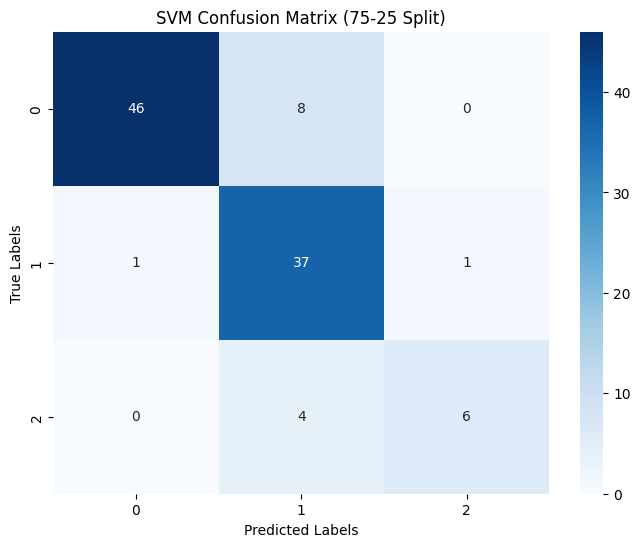

📉 Cross-validation Accuracy (75-25 Split): 0.9121
🔍 Features Selected by SFS: ['released_year', 'released_month', 'released_day', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'bpm']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_75)
X_test_scaled = scaler.transform(X_test_25)

# Step 3: Apply Sequential Feature Selection (SFS) - Selecting 10 Features
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
sfs = SFS(
    svm,
    k_features=10,
    forward=True,
    floating=False,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train_scaled, y_train_75)

# Keep only selected features
X_train_selected = sfs.transform(X_train_scaled)
X_test_selected = sfs.transform(X_test_scaled)

# Step 4: Initialize SVM with Updated Regularization
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

# Step 5: Train the Model
svm_model.fit(X_train_selected, y_train_75)

# Step 6: Make Predictions
y_pred_25 = svm_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_25, y_pred_25)
print(f"✅ Final SVM Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_25, y_pred_25))

# Confusion Matrix
cm = confusion_matrix(y_test_25, y_pred_25)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Confusion Matrix (75-25 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(svm_model, X_train_selected, y_train_75, cv=5)
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = sfs.k_feature_idx_
selected_features = X.columns[list(selected_feature_indices)]

print(f"🔍 Features Selected by SFS: {selected_features.tolist()}")


# **DECISION TREE**

✅ Final Decision Tree Accuracy (75-25 Split): 0.8932

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.72      0.84        39
           2       0.48      1.00      0.65        10

    accuracy                           0.89       103
   macro avg       0.83      0.91      0.83       103
weighted avg       0.95      0.89      0.90       103



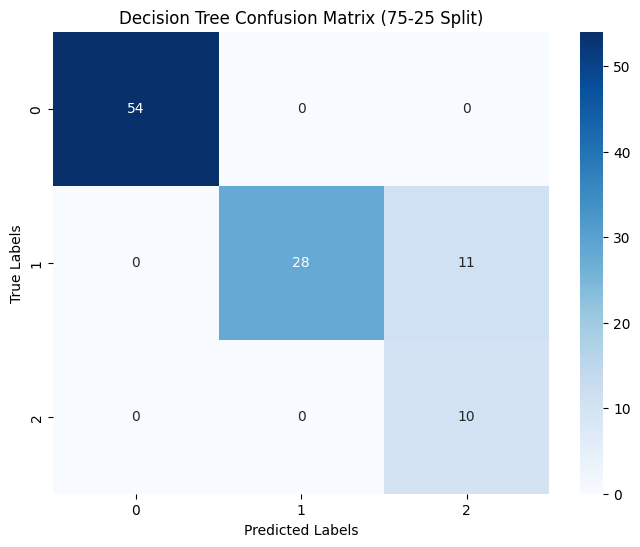

📉 Cross-validation Accuracy (75-25 Split): 0.8958
🔍 Features Selected by RFE: ['streams', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_75)
X_test_scaled = scaler.transform(X_test_25)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
dt = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=dt, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train_75)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize Decision Tree with Regularization
dt_model = DecisionTreeClassifier(
    max_depth=2,
    min_samples_split=100,
    min_samples_leaf=50,
    random_state=42
)

# Step 5: Train the Model
dt_model.fit(X_train_selected, y_train_75)

# Step 6: Make Predictions
ypred_25 = dt_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_25, ypred_25)
print(f"✅ Final Decision Tree Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_25, ypred_25))

# Confusion Matrix
cm = confusion_matrix(y_test_25, ypred_25)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix (75-25 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(dt_model, X_train_selected, y_train_75, cv=5)
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **RANDOM FOREST**

✅ Final Random Forest Accuracy (75-25 Split): 0.9029

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.80      1.00      0.89        39
           2       0.00      0.00      0.00        10

    accuracy                           0.90       103
   macro avg       0.60      0.67      0.63       103
weighted avg       0.83      0.90      0.86       103



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


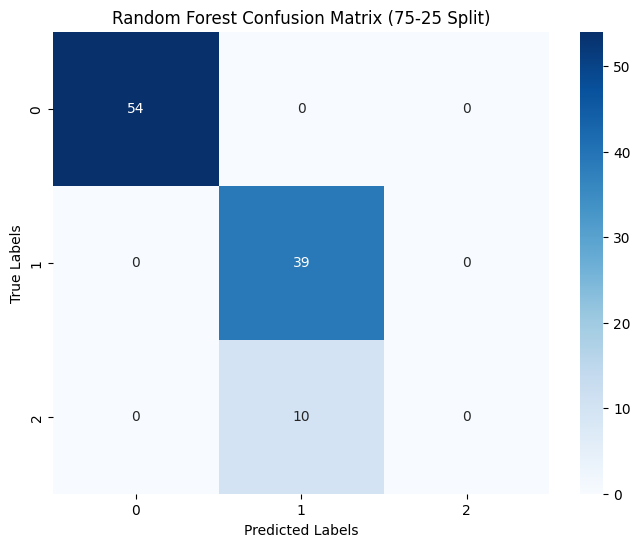

📉 Cross-validation Accuracy (75-25 Split): 0.8990
🔍 Features Selected by RFE: ['in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'acousticness_%', 'artist_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_75)
X_test_scaled = scaler.transform(X_test_25)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 7 Features
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=7)
rfe.fit(X_train_scaled, y_train_75)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize Random Forest with Regularization
rf_model = RandomForestClassifier(
    n_estimators=80,
    max_depth=2,
    min_samples_split=10,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

# Step 5: Train the Model
rf_model.fit(X_train_selected, y_train_75)

# Step 6: Make Predictions
ypred_25 = rf_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_25, ypred_25)
print(f"✅ Final Random Forest Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_25, ypred_25))

# Confusion Matrix
cm = confusion_matrix(y_test_25, ypred_25)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix (75-25 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(rf_model, X_train_selected, y_train_75, cv=5)
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **ADABOOST**

✅ Final AdaBoost Accuracy (75-25 Split): 0.9029

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.80      1.00      0.89        39
           2       0.00      0.00      0.00        10

    accuracy                           0.90       103
   macro avg       0.60      0.67      0.63       103
weighted avg       0.83      0.90      0.86       103



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


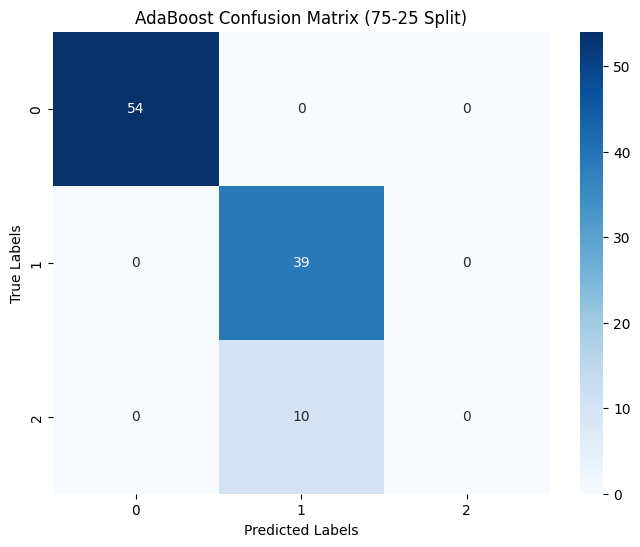

📉 Cross-validation Accuracy (75-25 Split): 0.8925
🔍 Features Selected by RFE: ['streams', 'speechiness_%', 'artist_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_75)
X_test_scaled = scaler.transform(X_test_25)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 3 Features
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
rfe = RFE(estimator=base_estimator, n_features_to_select=3)
rfe.fit(X_train_scaled, y_train_75)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize AdaBoost with Regularization
base_estimator = DecisionTreeClassifier(max_depth=1, min_samples_leaf=20, random_state=42)
adaboost_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=20,
    learning_rate=0.05,
    random_state=42
)

# Step 5: Train the Model
adaboost_model.fit(X_train_selected, y_train_75)

# Step 6: Make Predictions
y_pred_25 = adaboost_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_25, y_pred_25)
print(f"✅ Final AdaBoost Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_25, y_pred_25))

# Confusion Matrix
cm = confusion_matrix(y_test_25, y_pred_25)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('AdaBoost Confusion Matrix (75-25 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(adaboost_model, X_train_selected, y_train_75, cv=10)
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **GRADIENT BOOST**

✅ Final Gradient Boosting Accuracy (75-25 Split): 0.9029

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.80      1.00      0.89        39
           2       0.00      0.00      0.00        10

    accuracy                           0.90       103
   macro avg       0.60      0.67      0.63       103
weighted avg       0.83      0.90      0.86       103



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


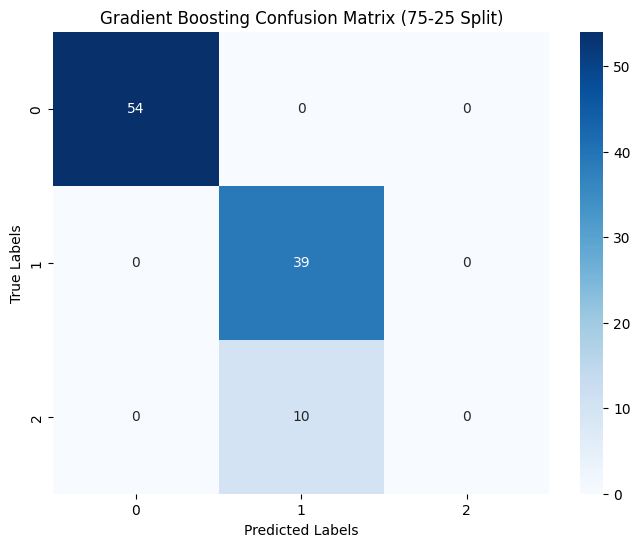

📉 Cross-validation Accuracy (75-25 Split): 0.8925
🔍 Features Selected by RFE: ['streams', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_75)
X_test_scaled = scaler.transform(X_test_25)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
gb = GradientBoostingClassifier(n_estimators=30, max_depth=1, random_state=42)
rfe = RFE(estimator=gb, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train_75)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize Gradient Boosting with Regularization
gb_model = GradientBoostingClassifier(
    n_estimators=30,
    learning_rate=0.01,
    max_depth=1,
    min_samples_leaf=20,
    random_state=42
)

# Step 5: Train the Model
gb_model.fit(X_train_selected, y_train_75)

# Step 6: Make Predictions
y_gb_pred_25 = gb_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_25, y_gb_pred_25)
print(f"✅ Final Gradient Boosting Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_25, y_gb_pred_25))

# Confusion Matrix
cm = confusion_matrix(y_test_25, y_gb_pred_25)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix (75-25 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(gb_model, X_train_selected, y_train_75, cv=10)
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **XG BOOST**

✅ Final XGBoost Accuracy (75-25 Split): 0.9029

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.80      1.00      0.89        39
           2       0.00      0.00      0.00        10

    accuracy                           0.90       103
   macro avg       0.60      0.67      0.63       103
weighted avg       0.83      0.90      0.86       103



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


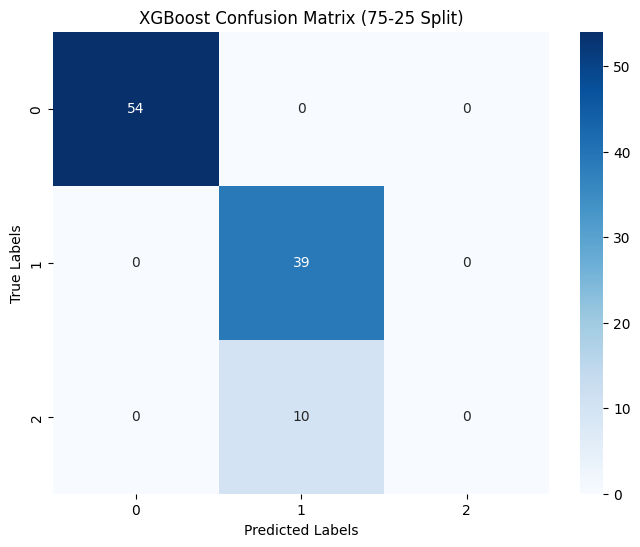

📉 Cross-validation Accuracy (75-25 Split): 0.8926
🔍 Features Selected by RFE: ['streams', 'in_shazam_charts', 'artist_id']


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_75)
X_test_scaled = scaler.transform(X_test_25)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 3 Features
xgb = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
rfe = RFE(estimator=xgb, n_features_to_select=3)
rfe.fit(X_train_scaled, y_train_75)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize XGBoost with Regularization
xgb_model = XGBClassifier(
    objective='multi:softmax',  # Multiclass classification
    num_class=3,
    n_estimators=10,            # Fewer boosting rounds
    learning_rate=0.005,        # Smaller learning rate
    max_depth=1,                # Shallow trees
    min_child_weight=20,        # Restrict leaf size
    random_state=42
)

# Step 5: Train the Model
xgb_model.fit(X_train_selected, y_train_75)

# Step 6: Make Predictions
y5pred_25 = xgb_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_25, y5pred_25)
print(f"✅ Final XGBoost Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_25, y5pred_25))

# Confusion Matrix
cm = confusion_matrix(y_test_25, y5pred_25)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGBoost Confusion Matrix (75-25 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(xgb_model, X_train_selected, y_train_75, cv=10)
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **CAT BOOST**

✅ Final CatBoost Accuracy (75-25 Split): 0.9029

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.80      1.00      0.89        39
           2       0.00      0.00      0.00        10

    accuracy                           0.90       103
   macro avg       0.60      0.67      0.63       103
weighted avg       0.83      0.90      0.86       103



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


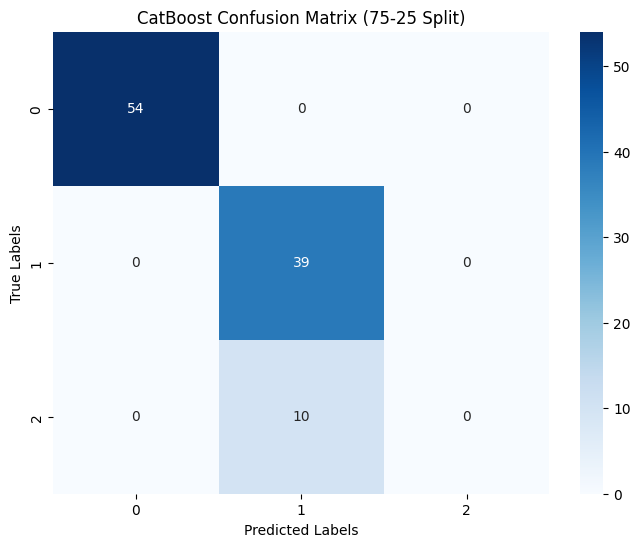

📉 Cross-validation Accuracy (75-25 Split): 0.8925
🔍 Features Selected by RFE: ['streams', 'speechiness_%', 'artist_id']


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_75)
X_test_scaled = scaler.transform(X_test_25)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 3 Features
cat = CatBoostClassifier(iterations=10, learning_rate=0.005, depth=1, random_seed=42, verbose=0)
rfe = RFE(estimator=cat, n_features_to_select=3)
rfe.fit(X_train_scaled, y_train_75)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize CatBoost with Regularization
cat_model = CatBoostClassifier(
    iterations=10,
    learning_rate=0.005,
    depth=1,
    min_data_in_leaf=30,
    l2_leaf_reg=10,
    random_seed=42,
    verbose=0
)

# Step 5: Train the Model
cat_model.fit(X_train_selected, y_train_75)

# Step 6: Make Predictions
y_cat_pred_25 = cat_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_25, y_cat_pred_25)
print(f"✅ Final CatBoost Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_25, y_cat_pred_25))

# Confusion Matrix
cm = confusion_matrix(y_test_25, y_cat_pred_25)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CatBoost Confusion Matrix (75-25 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(cat_model, X_train_selected, y_train_75, cv=10)
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **BAGGING**

✅ Final Bagging Accuracy (75-25 Split): 0.9126

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       0.86      0.95      0.90        39
           2       1.00      0.30      0.46        10

    accuracy                           0.91       103
   macro avg       0.94      0.75      0.78       103
weighted avg       0.92      0.91      0.90       103



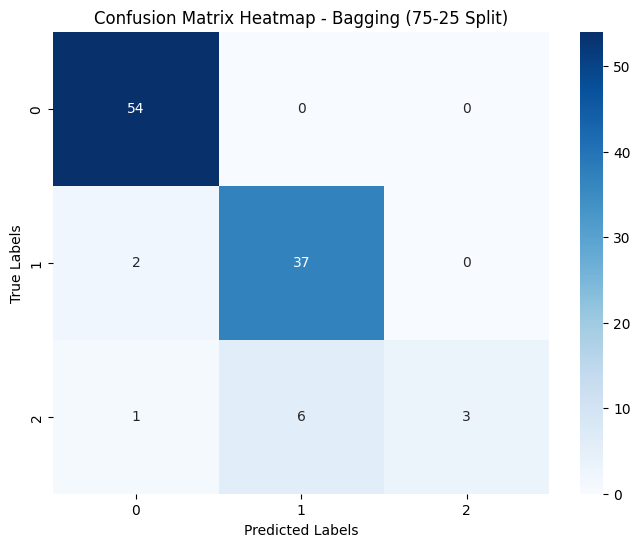

📉 Cross-validation Accuracy (75-25 Split): 0.8661


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Initialize Bagging Classifier with additional regularization
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=2,
        min_samples_split=50,
        min_samples_leaf=20,
        random_state=0
    ),
    n_estimators=10,
    max_features=0.2,
    random_state=0,
    n_jobs=-1
)

# Step 3: Train the Bagging Model
bagging_model.fit(X_train_75, y_train_75)

# Step 4: Make Predictions
y_pred_25 = bagging_model.predict(X_test_25)

# Step 5: Evaluate Performance
accuracy = accuracy_score(y_test_25, y_pred_25)
print(f"✅ Final Bagging Accuracy (75-25 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_25, y_pred_25))

# Confusion Matrix
cm = confusion_matrix(y_test_25, y_pred_25)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Bagging (75-25 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(bagging_model, X_train_75, y_train_75, cv=10)  # 10-Fold Cross-Validation
print(f"📉 Cross-validation Accuracy (75-25 Split): {cv_scores.mean():.4f}")


# **ARTIFICIAL NEURAL NETWORK**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.3228 - loss: 1.6967 - val_accuracy: 0.3786 - val_loss: 2.2182
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6866 - loss: 0.7582 - val_accuracy: 0.1165 - val_loss: 2.7451
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8504 - loss: 0.4809 - val_accuracy: 0.1359 - val_loss: 3.1357
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8907 - loss: 0.3842 - val_accuracy: 0.1942 - val_loss: 2.7754
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8644 - loss: 0.4059 - val_accuracy: 0.2233 - val_loss: 2.3805
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8884 - loss: 0.3019 - val_accuracy: 0.2621 - val_loss: 2.1659
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8297 - loss: 0.4345 - val_accuracy: 0.3786 - val_loss: 1.9074
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8743 - loss: 0.3885 - val_accuracy: 0.

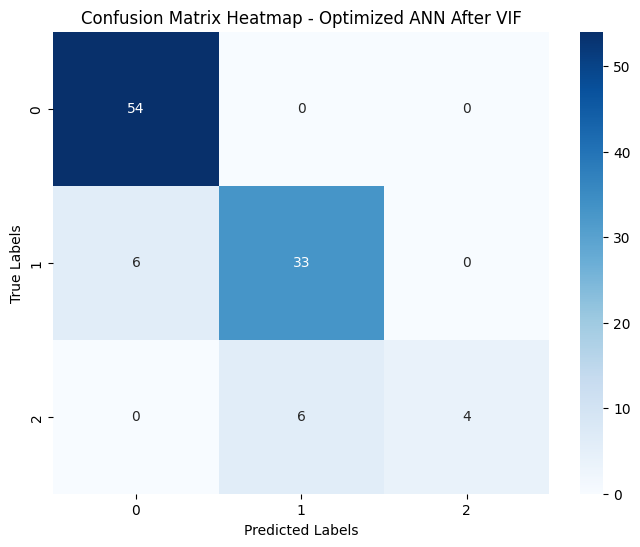

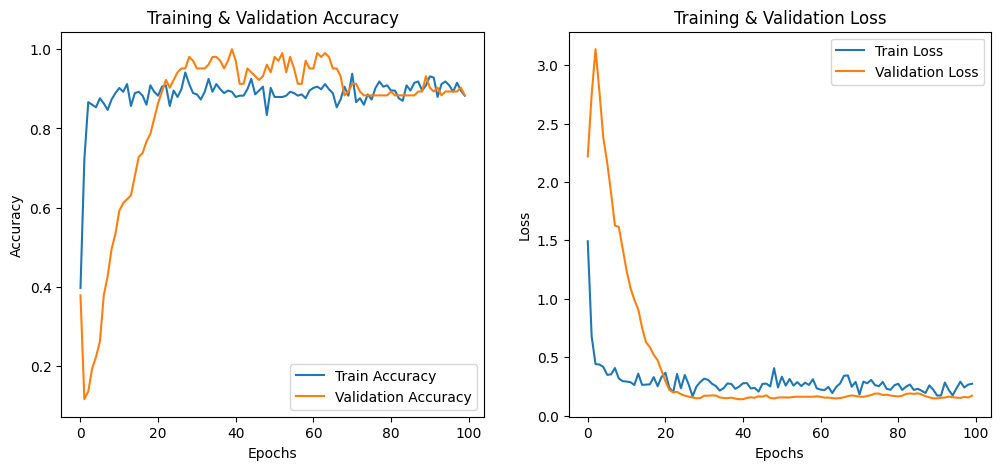

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Step 2: Define Optimized ANN Model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_75.shape[1],)),
    BatchNormalization(),  # Normalization for stable training
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(3, activation='softmax')  # Output layer (3 classes)
])

# Step 3: Compile the Model with AdamW Optimizer
model.compile(optimizer=Adam(learning_rate=0.0005),  # Lower LR for stability
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the ANN Model
history = model.fit(X_train_75, y_train_75, epochs=100, batch_size=32, validation_data=(X_test_25, y_test_25), verbose=1)

# Step 5: Make Predictions
y_pred_prob = model.predict(X_test_25)
y_pred = np.argmax(y_pred_prob, axis=1)

# Accuracy
accuracy = accuracy_score(y_test_25, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_25, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_25, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 6: Visualize Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Optimized ANN After VIF')
plt.show()

# Step 7: Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()


# **70-30 SPLIT**

# **LOGISTIC REGRESSION**

<ipython-input-74-aa92c52ec37f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_70['instrumentalness_%'].fillna(X_train_70['instrumentalness_%'].median(), inplace=True)
<ipython-input-74-aa92c52ec37f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

✅ Final Logistic Regression Accuracy (70-30 Split): 0.9106

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        67
           1       0.83      0.96      0.89        45
           2       1.00      0.64      0.78        11

    accuracy                           0.91       123
   macro avg       0.93      0.84      0.87       123
weighted avg       0.92      0.91      0.91       123



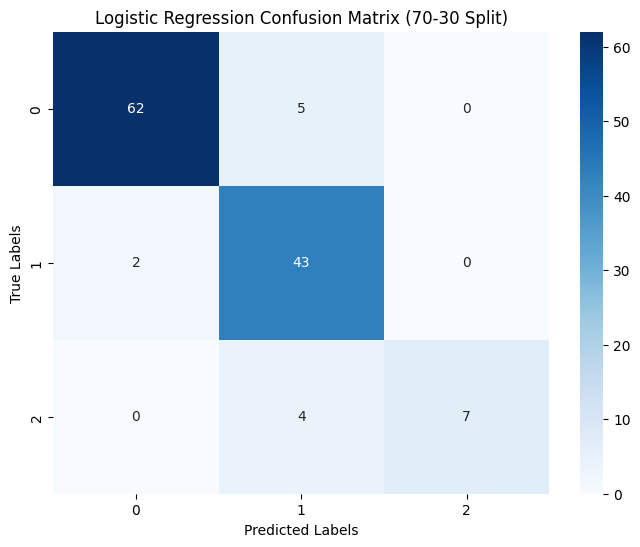

In [ ]:

# Step 2: Handle Missing Values
X_train_70['instrumentalness_%'].fillna(X_train_70['instrumentalness_%'].median(), inplace=True)
X_test_30['instrumentalness_%'].fillna(X_test_30['instrumentalness_%'].median(), inplace=True)

# Step 3: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_70)
X_test_scaled = scaler.transform(X_test_30)

# Step 4: Apply Recursive Feature Elimination (RFE) - Selecting 10 Features
model = LogisticRegression(max_iter=500, C=0.1, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train_70)

# Keep only the selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 5: Train the Model
model.fit(X_train_selected, y_train_70)

# Step 6: Make Predictions
y_pred_30 = model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_30, y_pred_30)
print(f"✅ Final Logistic Regression Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_30, y_pred_30))

# Confusion Matrix
cm = confusion_matrix(y_test_30, y_pred_30)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix (70-30 Split)')
plt.show()


# **RIDGE REGRESSION**

In [ ]:

# Step 2: Feature Scaling (Preprocessing)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_70)
X_test_scaled = scaler.transform(X_test_30)

# Step 3: Apply Feature Selection (RFE) to Select Important Features
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Apply Recursive Feature Elimination (RFE) to select the best features
selector = RFE(model, n_features_to_select=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train_70)
X_test_selected = selector.transform(X_test_scaled)

# Step 4: Grid Search for Best Regularization (C)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1]}  # Tuning C for better performance
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
                           param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_selected, y_train_70)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Step 5: Train the Optimized Model
best_model.fit(X_train_selected, y_train_70)

# Step 6: Make Predictions
y_pred = best_model.predict(X_test_selected)

# Step 7: Evaluate Performance
accuracy = accuracy_score(y_test_30, y_pred)
print(f"Optimized Accuracy (70-30 Split): {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test_30, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_30, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Optimized Accuracy (70-30 Split): 0.9024

Confusion Matrix:
[[65  2  0]
 [ 5 40  0]
 [ 0  5  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        67
           1       0.85      0.89      0.87        45
           2       1.00      0.55      0.71        11

    accuracy                           0.90       123
   macro avg       0.93      0.80      0.84       123
weighted avg       0.91      0.90      0.90       123



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# **KNN**

✅ Final KNN Accuracy (70-30 Split): 0.8780

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.79      0.91      0.85        45
           2       1.00      0.45      0.62        11

    accuracy                           0.88       123
   macro avg       0.91      0.76      0.80       123
weighted avg       0.89      0.88      0.87       123



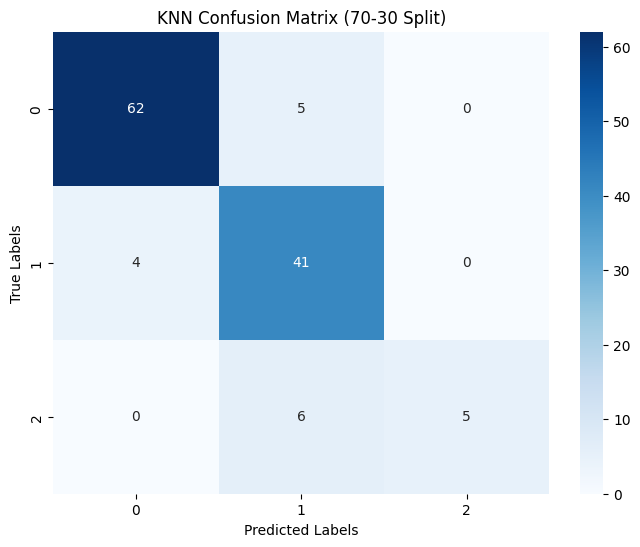

📉 Cross-validation Accuracy (70-30 Split): 0.8676
🔍 Features Selected by SFS: ['released_month', 'released_day', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'bpm']


In [ ]:

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_70)
X_test_scaled = scaler.transform(X_test_30)

# Step 3: Apply Sequential Feature Selection (SFS) - Selecting 7 Features
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SFS(
    knn,
    k_features=7,
    forward=True,
    floating=False,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train_scaled, y_train_70)

# Keep only selected features
X_train_selected = sfs.transform(X_train_scaled)
X_test_selected = sfs.transform(X_test_scaled)

# Step 4: Initialize KNN with Regularization
knn_model = KNeighborsClassifier(
    n_neighbors=15,
    weights='uniform',
    metric='manhattan',
    n_jobs=-1
)

# Step 5: Train the Model
knn_model.fit(X_train_selected, y_train_70)

# Step 6: Make Predictions
y_pred_30 = knn_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_30, y_pred_30)
print(f"✅ Final KNN Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_30, y_pred_30))

# Confusion Matrix
cm = confusion_matrix(y_test_30, y_pred_30)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('KNN Confusion Matrix (70-30 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(knn_model, X_train_selected, y_train_70, cv=5)
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = sfs.k_feature_idx_
selected_features = X.columns[list(selected_feature_indices)]

print(f"🔍 Features Selected by SFS: {selected_features.tolist()}")


# **SVM**

✅ Final SVM Accuracy (70-30 Split): 0.8618

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        67
           1       0.75      0.93      0.83        45
           2       1.00      0.73      0.84        11

    accuracy                           0.86       123
   macro avg       0.90      0.83      0.85       123
weighted avg       0.88      0.86      0.86       123



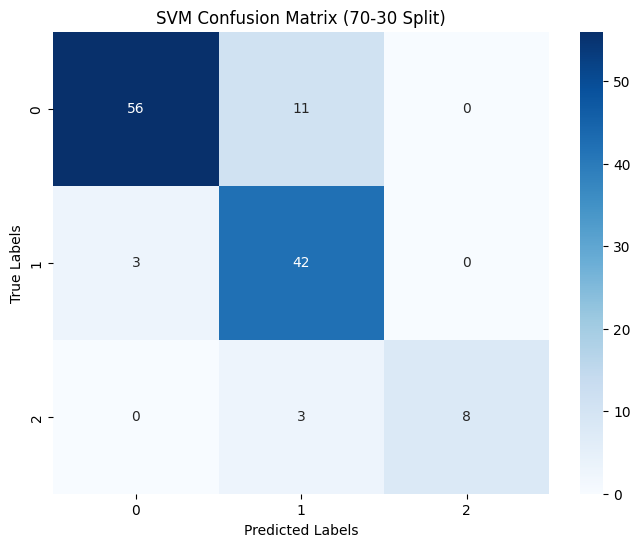

📉 Cross-validation Accuracy (70-30 Split): 0.9340
🔍 Features Selected by SFS: ['released_month', 'released_day', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'key']


In [ ]:

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_70)
X_test_scaled = scaler.transform(X_test_30)

# Step 3: Apply Sequential Feature Selection (SFS) - Selecting 10 Features
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
sfs = SFS(
    svm,
    k_features=10,
    forward=True,
    floating=False,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train_scaled, y_train_70)

# Keep only selected features
X_train_selected = sfs.transform(X_train_scaled)
X_test_selected = sfs.transform(X_test_scaled)

# Step 4: Initialize SVM with Updated Regularization
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

# Step 5: Train the Model
svm_model.fit(X_train_selected, y_train_70)

# Step 6: Make Predictions
y_pred_30 = svm_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_30, y_pred_30)
print(f"✅ Final SVM Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_30, y_pred_30))

# Confusion Matrix
cm = confusion_matrix(y_test_30, y_pred_30)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Confusion Matrix (70-30 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(svm_model, X_train_selected, y_train_70, cv=5)
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = sfs.k_feature_idx_
selected_features = X.columns[list(selected_feature_indices)]

print(f"🔍 Features Selected by SFS: {selected_features.tolist()}")


# **DECISION TREE**

✅ Final Decision Tree Accuracy (70-30 Split): 0.9106

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      0.76      0.86        45
           2       0.50      1.00      0.67        11

    accuracy                           0.91       123
   macro avg       0.83      0.92      0.84       123
weighted avg       0.96      0.91      0.92       123



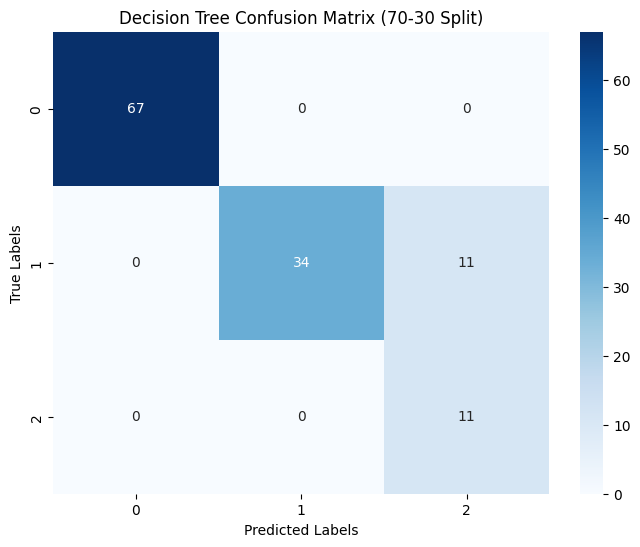

📉 Cross-validation Accuracy (70-30 Split): 0.8884
🔍 Features Selected by RFE: ['streams', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id']


In [ ]:

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_70)
X_test_scaled = scaler.transform(X_test_30)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
dt = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=dt, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train_70)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize Decision Tree with Regularization
dt_model = DecisionTreeClassifier(
    max_depth=2,
    min_samples_split=100,
    min_samples_leaf=50,
    random_state=42
)

# Step 5: Train the Model
dt_model.fit(X_train_selected, y_train_70)

# Step 6: Make Predictions
ypred_30 = dt_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_30, ypred_30)
print(f"✅ Final Decision Tree Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_30, ypred_30))

# Confusion Matrix
cm = confusion_matrix(y_test_30, ypred_30)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix (70-30 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(dt_model, X_train_selected, y_train_70, cv=5)
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **RANDOM FOREST**

✅ Final Random Forest Accuracy (70-30 Split): 0.9919

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.98      1.00      0.99        45
           2       1.00      0.91      0.95        11

    accuracy                           0.99       123
   macro avg       0.99      0.97      0.98       123
weighted avg       0.99      0.99      0.99       123



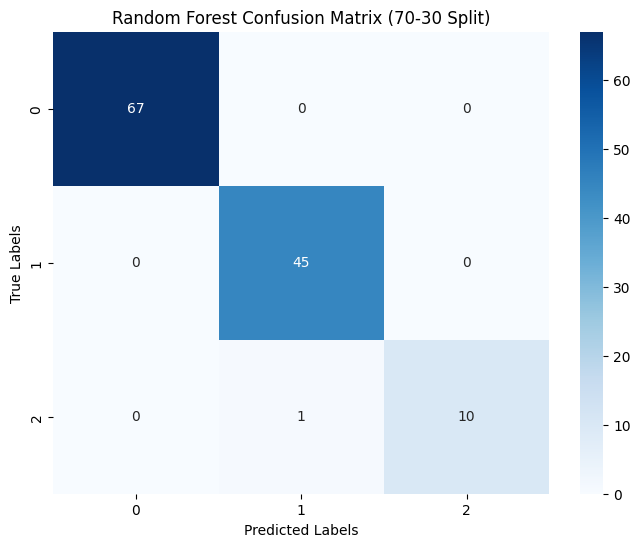

📉 Cross-validation Accuracy (70-30 Split): 0.9339
🔍 Features Selected by RFE: ['in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_shazam_charts', 'artist_id']


In [ ]:

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_70)
X_test_scaled = scaler.transform(X_test_30)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 7 Features
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=7)
rfe.fit(X_train_scaled, y_train_70)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize Random Forest with Regularization
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

# Step 5: Train the Model
rf_model.fit(X_train_selected, y_train_70)

# Step 6: Make Predictions
ypred_30 = rf_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_30, ypred_30)
print(f"✅ Final Random Forest Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_30, ypred_30))

# Confusion Matrix
cm = confusion_matrix(y_test_30, ypred_30)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix (70-30 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(rf_model, X_train_selected, y_train_70, cv=5)
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **ADABOOST**

✅ Final AdaBoost Accuracy (70-30 Split): 0.9106

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.80      1.00      0.89        45
           2       0.00      0.00      0.00        11

    accuracy                           0.91       123
   macro avg       0.60      0.67      0.63       123
weighted avg       0.84      0.91      0.87       123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


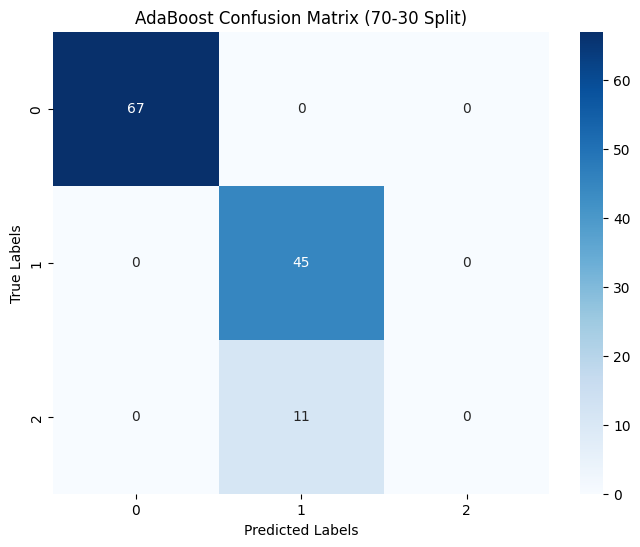

📉 Cross-validation Accuracy (70-30 Split): 0.8885
🔍 Features Selected by RFE: ['streams', 'speechiness_%', 'artist_id']


In [ ]:

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_70)
X_test_scaled = scaler.transform(X_test_30)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 3 Features
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
rfe = RFE(estimator=base_estimator, n_features_to_select=3)
rfe.fit(X_train_scaled, y_train_70)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize AdaBoost with Regularization
base_estimator = DecisionTreeClassifier(max_depth=1, min_samples_leaf=20, random_state=42)
adaboost_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=20,
    learning_rate=0.05,
    random_state=42
)

# Step 5: Train the Model
adaboost_model.fit(X_train_selected, y_train_70)

# Step 6: Make Predictions
y_pred_30 = adaboost_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_30, y_pred_30)
print(f"✅ Final AdaBoost Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_30, y_pred_30))

# Confusion Matrix
cm = confusion_matrix(y_test_30, y_pred_30)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('AdaBoost Confusion Matrix (70-30 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(adaboost_model, X_train_selected, y_train_70, cv=10)
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **GRADIENT BOOST**

✅ Final Gradient Boosting Accuracy (70-30 Split): 0.9106

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.80      1.00      0.89        45
           2       0.00      0.00      0.00        11

    accuracy                           0.91       123
   macro avg       0.60      0.67      0.63       123
weighted avg       0.84      0.91      0.87       123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


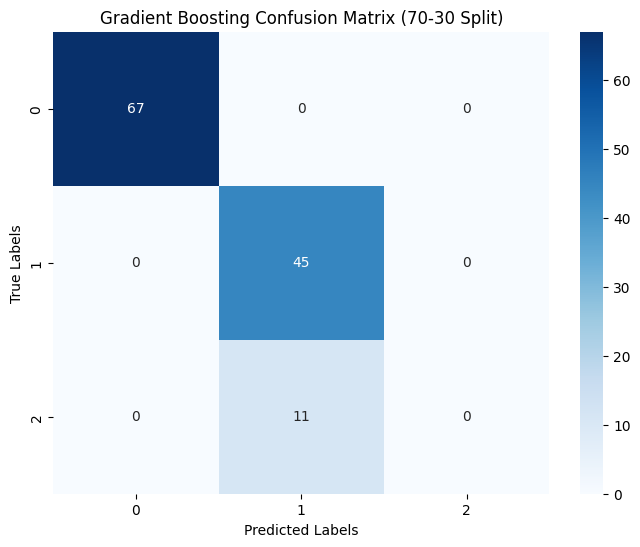

📉 Cross-validation Accuracy (70-30 Split): 0.8885
🔍 Features Selected by RFE: ['streams', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id']


In [ ]:


# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_70)
X_test_scaled = scaler.transform(X_test_30)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
gb = GradientBoostingClassifier(n_estimators=30, max_depth=1, random_state=42)
rfe = RFE(estimator=gb, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train_70)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize Gradient Boosting with Regularization
gb_model = GradientBoostingClassifier(
    n_estimators=30,
    learning_rate=0.01,
    max_depth=1,
    min_samples_leaf=20,
    random_state=42
)

# Step 5: Train the Model
gb_model.fit(X_train_selected, y_train_70)

# Step 6: Make Predictions
y_gb_pred_30 = gb_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_30, y_gb_pred_30)
print(f"✅ Final Gradient Boosting Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_30, y_gb_pred_30))

# Confusion Matrix
cm = confusion_matrix(y_test_30, y_gb_pred_30)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix (70-30 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(gb_model, X_train_selected, y_train_70, cv=10)
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **XG BOOST**

✅ Final XGBoost Accuracy (70-30 Split): 0.9106

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.80      1.00      0.89        45
           2       0.00      0.00      0.00        11

    accuracy                           0.91       123
   macro avg       0.60      0.67      0.63       123
weighted avg       0.84      0.91      0.87       123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


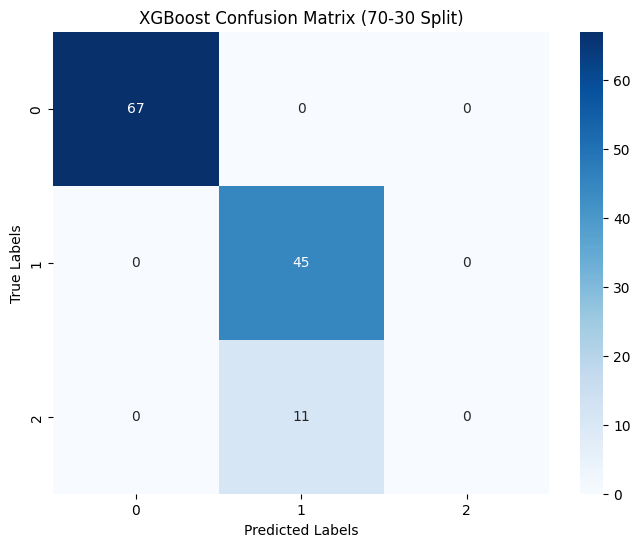

📉 Cross-validation Accuracy (70-30 Split): 0.8920
🔍 Features Selected by RFE: ['streams', 'in_shazam_charts', 'liveness_%']


In [ ]:

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_70)
X_test_scaled = scaler.transform(X_test_30)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 3 Features
xgb = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
rfe = RFE(estimator=xgb, n_features_to_select=3)
rfe.fit(X_train_scaled, y_train_70)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize XGBoost with Regularization
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=10,
    learning_rate=0.005,
    max_depth=1,
    min_child_weight=20,
    random_state=42
)

# Step 5: Train the Model
xgb_model.fit(X_train_selected, y_train_70)

# Step 6: Make Predictions
y5pred_30 = xgb_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_30, y5pred_30)
print(f"✅ Final XGBoost Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_30, y5pred_30))

# Confusion Matrix
cm = confusion_matrix(y_test_30, y5pred_30)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGBoost Confusion Matrix (70-30 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(xgb_model, X_train_selected, y_train_70, cv=10)
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **CAT BOOST**

✅ Final CatBoost Accuracy (70-30 Split): 0.9106

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.80      1.00      0.89        45
           2       0.00      0.00      0.00        11

    accuracy                           0.91       123
   macro avg       0.60      0.67      0.63       123
weighted avg       0.84      0.91      0.87       123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


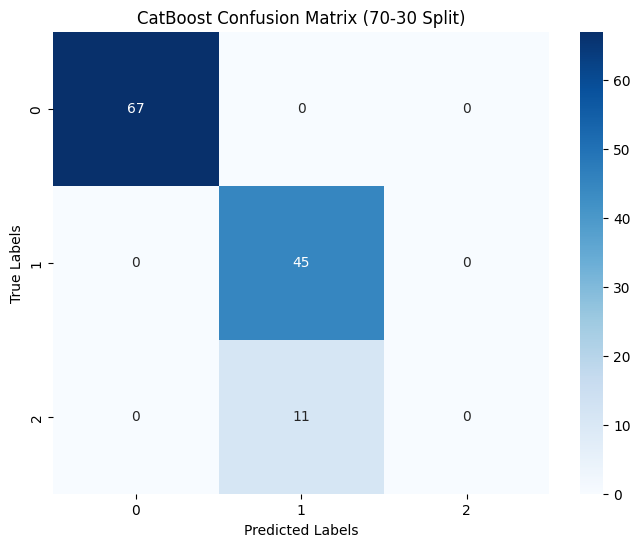

📉 Cross-validation Accuracy (70-30 Split): 0.8885
🔍 Features Selected by RFE: ['streams', 'speechiness_%', 'artist_id']


In [ ]:


# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_70)
X_test_scaled = scaler.transform(X_test_30)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 3 Features
cat = CatBoostClassifier(iterations=10, learning_rate=0.005, depth=1, random_seed=42, verbose=0)
rfe = RFE(estimator=cat, n_features_to_select=3)
rfe.fit(X_train_scaled, y_train_70)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize CatBoost with Regularization
cat_model = CatBoostClassifier(
    iterations=10,
    learning_rate=0.005,
    depth=1,
    min_data_in_leaf=30,
    l2_leaf_reg=10,
    random_seed=42,
    verbose=0
)

# Step 5: Train the Model
cat_model.fit(X_train_selected, y_train_70)

# Step 6: Make Predictions
y_cat_pred_30 = cat_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_30, y_cat_pred_30)
print(f"✅ Final CatBoost Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_30, y_cat_pred_30))

# Confusion Matrix
cm = confusion_matrix(y_test_30, y_cat_pred_30)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CatBoost Confusion Matrix (70-30 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(cat_model, X_train_selected, y_train_70, cv=10)
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **BAGGING**

✅ Final Bagging Accuracy (70-30 Split): 0.8699

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        67
           1       0.75      1.00      0.86        45
           2       0.00      0.00      0.00        11

    accuracy                           0.87       123
   macro avg       0.58      0.64      0.60       123
weighted avg       0.81      0.87      0.83       123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


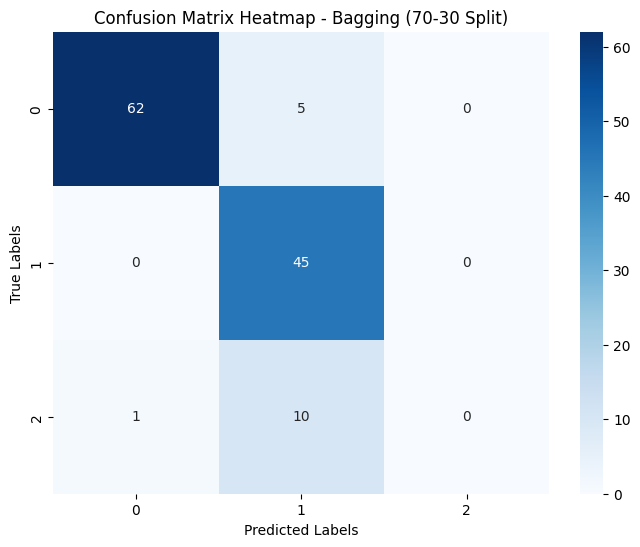

📉 Cross-validation Accuracy (70-30 Split): 0.8466


In [ ]:

# Step 2: Initialize Bagging Classifier with additional regularization
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=2,
        min_samples_split=50,
        min_samples_leaf=20,
        random_state=0
    ),
    n_estimators=10,
    max_features=0.2,
    random_state=0,
    n_jobs=-1
)

# Step 3: Train the Bagging Model
bagging_model.fit(X_train_70, y_train_70)

# Step 4: Make Predictions
y_pred_30 = bagging_model.predict(X_test_30)

# Step 5: Evaluate Performance
accuracy = accuracy_score(y_test_30, y_pred_30)
print(f"✅ Final Bagging Accuracy (70-30 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_30, y_pred_30))

# Confusion Matrix
cm = confusion_matrix(y_test_30, y_pred_30)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Bagging (70-30 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(bagging_model, X_train_70, y_train_70, cv=10)  # 10-Fold Cross-Validation
print(f"📉 Cross-validation Accuracy (70-30 Split): {cv_scores.mean():.4f}")


# **ARTIFICIAL NEURAL NETWORK**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.3594 - loss: 1.5938 - val_accuracy: 0.0894 - val_loss: 3.1484
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7564 - loss: 0.6781 - val_accuracy: 0.1138 - val_loss: 3.2611
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8342 - loss: 0.4828 - val_accuracy: 0.1301 - val_loss: 2.9484
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8535 - loss: 0.4370 - val_accuracy: 0.1789 - val_loss: 2.4800
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8985 - loss: 0.3106 - val_accuracy: 0.2276 - val_loss: 2.2691
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8913 - loss: 0.2557 - val_accuracy: 0.2602 - val_loss: 2.0286
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8970 - loss: 0.3028 - val_accuracy: 0.3415 - val_loss: 1.8575
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8956 - loss: 0.3164 - val_accuracy: 0.3902 - val_loss

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Accuracy: 0.9268

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        67
           1       0.89      0.91      0.90        45
           2       1.00      0.55      0.71        11

    accuracy                           0.93       123
   macro avg       0.94      0.82      0.86       123
weighted avg       0.93      0.93      0.92       123


Confusion Matrix:
[[67  0  0]
 [ 4 41  0]
 [ 0  5  6]]


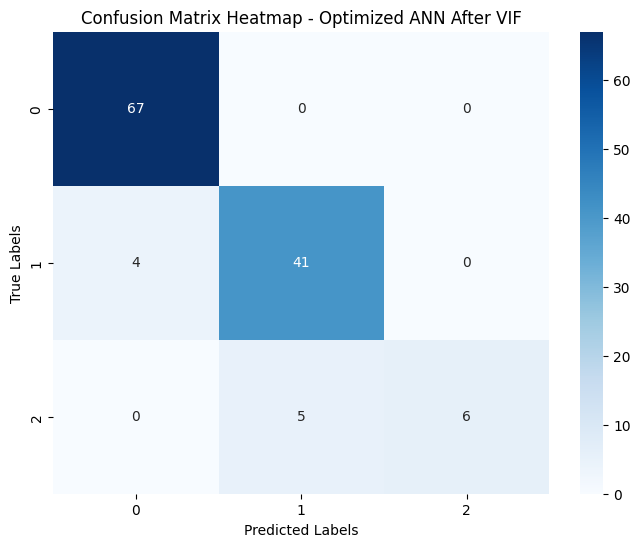

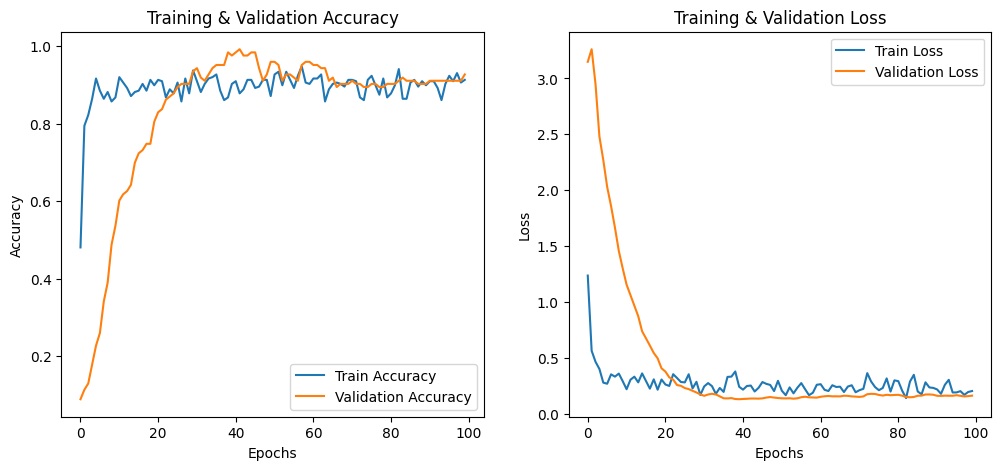

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Step 2: Define Optimized ANN Model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_70.shape[1],)),
    BatchNormalization(),  # Normalization for stable training
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(3, activation='softmax')  # Output layer (3 classes)
])

# Step 3: Compile the Model with AdamW Optimizer
model.compile(optimizer=Adam(learning_rate=0.0005),  # Lower LR for stability
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the ANN Model
history = model.fit(X_train_70, y_train_70, epochs=100, batch_size=32, validation_data=(X_test_30, y_test_30), verbose=1)

# Step 5: Make Predictions
y_pred_prob = model.predict(X_test_30)
y_pred = np.argmax(y_pred_prob, axis=1)

# Accuracy
accuracy = accuracy_score(y_test_30, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_30, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_30, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 6: Visualize Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Optimized ANN After VIF')
plt.show()

# Step 7: Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()


# **60-40 SPLIT**

# **LOGISTIC REGRESSION**

<ipython-input-86-4225bc9d3aaf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_60['instrumentalness_%'].fillna(X_train_60['instrumentalness_%'].median(), inplace=True)
<ipython-input-86-4225bc9d3aaf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

✅ Final Logistic Regression Accuracy (60-40 Split): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        86
           1       0.82      0.95      0.88        62
           2       0.91      0.62      0.74        16

    accuracy                           0.90       164
   macro avg       0.90      0.83      0.86       164
weighted avg       0.91      0.90      0.90       164



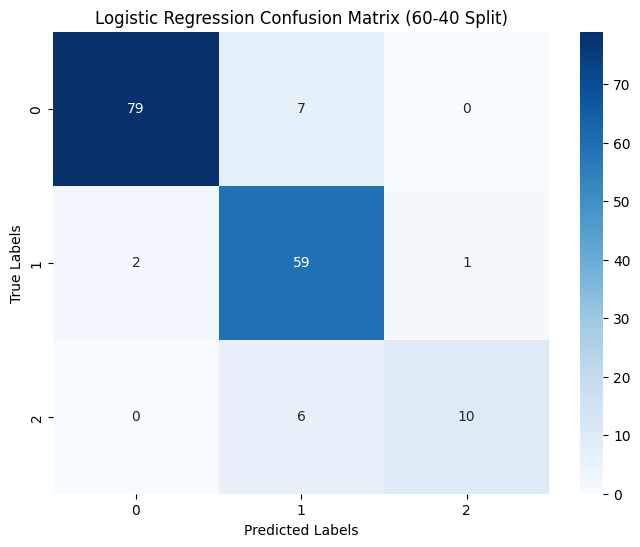

In [ ]:

# Step 2: Handle Missing Values
X_train_60['instrumentalness_%'].fillna(X_train_60['instrumentalness_%'].median(), inplace=True)
X_test_40['instrumentalness_%'].fillna(X_test_40['instrumentalness_%'].median(), inplace=True)

# Step 3: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_60)
X_test_scaled = scaler.transform(X_test_40)

# Step 4: Apply Recursive Feature Elimination (RFE) - Selecting 10 Features
model = LogisticRegression(max_iter=500, C=0.1, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train_60)

# Keep only the selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 5: Train the Model
model.fit(X_train_selected, y_train_60)

# Step 6: Make Predictions
y_pred_40 = model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_40, y_pred_40)
print(f"✅ Final Logistic Regression Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_40, y_pred_40))

# Confusion Matrix
cm = confusion_matrix(y_test_40, y_pred_40)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix (60-40 Split)')
plt.show()


# **RIDGE REGRESSION**

In [ ]:

# Step 2: Feature Scaling (Preprocessing)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_60)
X_test_scaled = scaler.transform(X_test_40)

# Step 3: Apply Feature Selection (RFE) to Select Important Features
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Apply Recursive Feature Elimination (RFE) to select the best features
selector = RFE(model, n_features_to_select=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train_60)
X_test_selected = selector.transform(X_test_scaled)

# Step 4: Grid Search for Best Regularization (C)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1]}  # Tuning C for better performance
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
                           param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_selected, y_train_60)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Step 5: Train the Optimized Model
best_model.fit(X_train_selected, y_train_60)

# Step 6: Make Predictions
y_pred = best_model.predict(X_test_selected)

# Step 7: Evaluate Performance
accuracy = accuracy_score(y_test_40, y_pred)
print(f"Optimized Accuracy (60-40 Split): {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test_40, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_40, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Optimized Accuracy (60-40 Split): 0.9268

Confusion Matrix:
[[84  2  0]
 [ 2 60  0]
 [ 0  8  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        86
           1       0.86      0.97      0.91        62
           2       1.00      0.50      0.67        16

    accuracy                           0.93       164
   macro avg       0.94      0.81      0.85       164
weighted avg       0.93      0.93      0.92       164



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# **KNN**

✅ Final KNN Accuracy (60-40 Split): 0.8171

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        86
           1       0.71      0.89      0.79        62
           2       1.00      0.25      0.40        16

    accuracy                           0.82       164
   macro avg       0.87      0.67      0.69       164
weighted avg       0.84      0.82      0.80       164



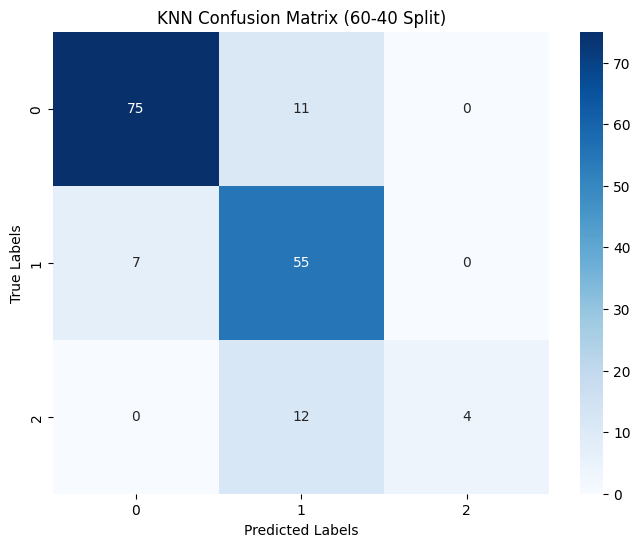

📉 Cross-validation Accuracy (60-40 Split): 0.8496
🔍 Features Selected by SFS: ['released_month', 'released_day', 'in_apple_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'mode']


In [ ]:

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_60)
X_test_scaled = scaler.transform(X_test_40)

# Step 3: Apply Sequential Feature Selection (SFS) - Selecting 7 Features
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SFS(
    knn,
    k_features=7,
    forward=True,
    floating=False,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train_scaled, y_train_60)

# Keep only selected features
X_train_selected = sfs.transform(X_train_scaled)
X_test_selected = sfs.transform(X_test_scaled)

# Step 4: Initialize KNN with Regularization
knn_model = KNeighborsClassifier(
    n_neighbors=15,
    weights='uniform',
    metric='manhattan',
    n_jobs=-1
)

# Step 5: Train the Model
knn_model.fit(X_train_selected, y_train_60)

# Step 6: Make Predictions
y_pred_40 = knn_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_40, y_pred_40)
print(f"✅ Final KNN Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_40, y_pred_40))

# Confusion Matrix
cm = confusion_matrix(y_test_40, y_pred_40)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('KNN Confusion Matrix (60-40 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(knn_model, X_train_selected, y_train_60, cv=5)
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = sfs.k_feature_idx_
selected_features = X.columns[list(selected_feature_indices)]

print(f"🔍 Features Selected by SFS: {selected_features.tolist()}")


# **SVM**

✅ Final SVM Accuracy (60-40 Split): 0.8537

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        86
           1       0.75      0.92      0.83        62
           2       1.00      0.62      0.77        16

    accuracy                           0.85       164
   macro avg       0.90      0.80      0.83       164
weighted avg       0.87      0.85      0.85       164



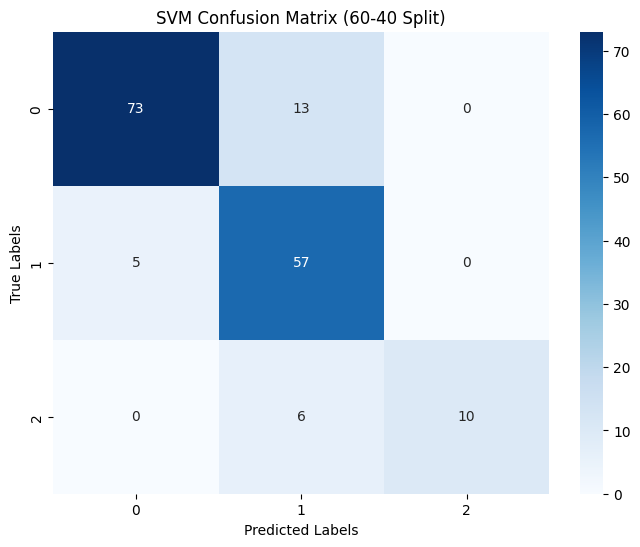

📉 Cross-validation Accuracy (60-40 Split): 0.8902
🔍 Features Selected by SFS: ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_charts', 'in_apple_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'mode']


In [ ]:

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_60)
X_test_scaled = scaler.transform(X_test_40)

# Step 3: Apply Sequential Feature Selection (SFS) - Selecting 10 Features
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
sfs = SFS(
    svm,
    k_features=10,
    forward=True,
    floating=False,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train_scaled, y_train_60)

# Keep only selected features
X_train_selected = sfs.transform(X_train_scaled)
X_test_selected = sfs.transform(X_test_scaled)

# Step 4: Initialize SVM with Updated Regularization
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

# Step 5: Train the Model
svm_model.fit(X_train_selected, y_train_60)

# Step 6: Make Predictions
y_pred_40 = svm_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_40, y_pred_40)
print(f"✅ Final SVM Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_40, y_pred_40))

# Confusion Matrix
cm = confusion_matrix(y_test_40, y_pred_40)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Confusion Matrix (60-40 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(svm_model, X_train_selected, y_train_60, cv=5)
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = sfs.k_feature_idx_
selected_features = X.columns[list(selected_feature_indices)]

print(f"🔍 Features Selected by SFS: {selected_features.tolist()}")


# **DECISION TREE**

✅ Final Decision Tree Accuracy (60-40 Split): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.79      1.00      0.89        62
           2       0.00      0.00      0.00        16

    accuracy                           0.90       164
   macro avg       0.60      0.67      0.63       164
weighted avg       0.82      0.90      0.86       164



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


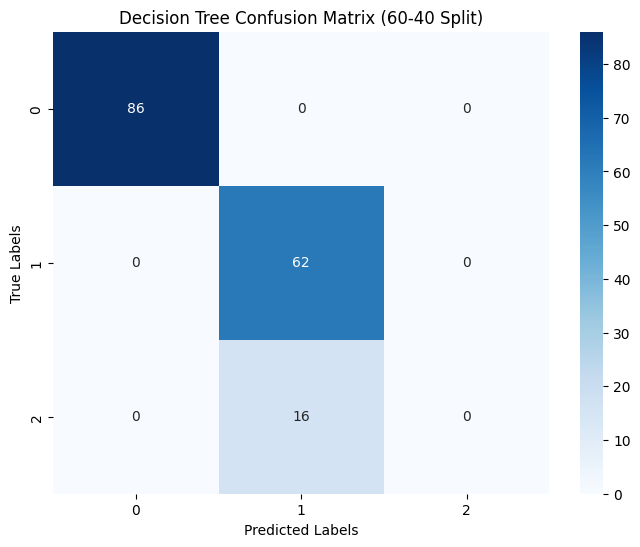

📉 Cross-validation Accuracy (60-40 Split): 0.8902
🔍 Features Selected by RFE: ['streams', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id']


In [ ]:

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_60)
X_test_scaled = scaler.transform(X_test_40)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
dt = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=dt, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train_60)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize Decision Tree with Regularization
dt_model = DecisionTreeClassifier(
    max_depth=2,
    min_samples_split=100,
    min_samples_leaf=50,
    random_state=42
)

# Step 5: Train the Model
dt_model.fit(X_train_selected, y_train_60)

# Step 6: Make Predictions
ypred_40 = dt_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_40, ypred_40)
print(f"✅ Final Decision Tree Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_40, ypred_40))

# Confusion Matrix
cm = confusion_matrix(y_test_40, ypred_40)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix (60-40 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(dt_model, X_train_selected, y_train_60, cv=5)
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **RANDOM FOREST**

✅ Final Random Forest Accuracy (60-40 Split): 0.9329

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.86      0.98      0.92        62
           2       0.86      0.38      0.52        16

    accuracy                           0.93       164
   macro avg       0.91      0.79      0.81       164
weighted avg       0.93      0.93      0.92       164



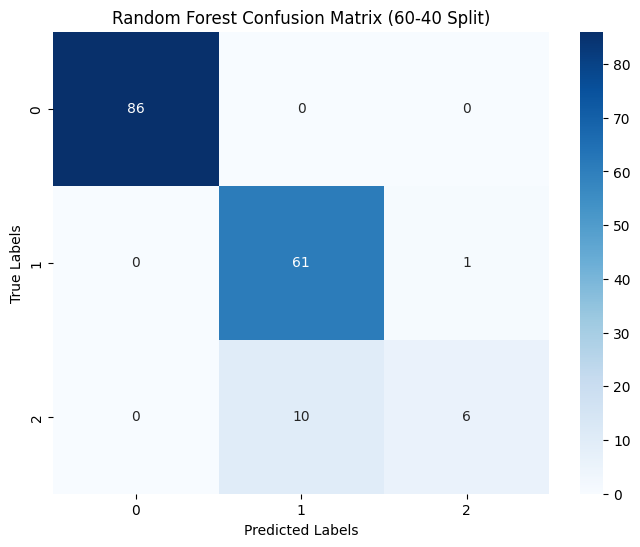

📉 Cross-validation Accuracy (60-40 Split): 0.9106
🔍 Features Selected by RFE: ['in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'key', 'artist_id']


In [ ]:

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_60)
X_test_scaled = scaler.transform(X_test_40)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 7 Features
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=7)
rfe.fit(X_train_scaled, y_train_60)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize Random Forest with Regularization
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

# Step 5: Train the Model
rf_model.fit(X_train_selected, y_train_60)

# Step 6: Make Predictions
ypred_40 = rf_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_40, ypred_40)
print(f"✅ Final Random Forest Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_40, ypred_40))

# Confusion Matrix
cm = confusion_matrix(y_test_40, ypred_40)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix (60-40 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(rf_model, X_train_selected, y_train_60, cv=5)
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **ADABOOST**

✅ Final AdaBoost Accuracy (60-40 Split): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.79      1.00      0.89        62
           2       0.00      0.00      0.00        16

    accuracy                           0.90       164
   macro avg       0.60      0.67      0.63       164
weighted avg       0.82      0.90      0.86       164



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


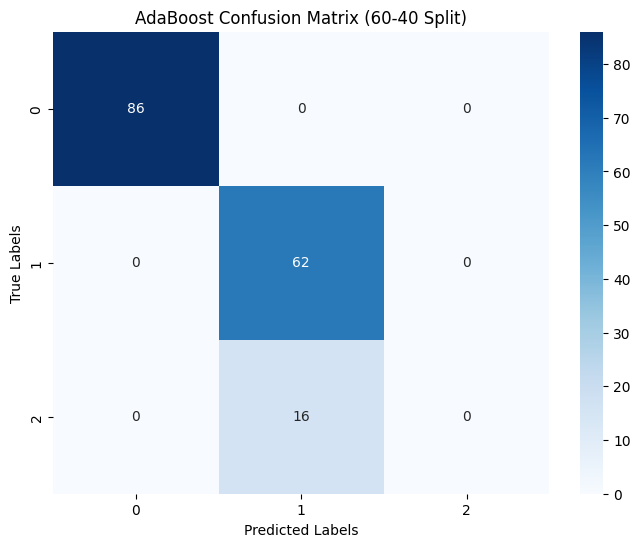

📉 Cross-validation Accuracy (60-40 Split): 0.8905
🔍 Features Selected by RFE: ['streams', 'speechiness_%', 'artist_id']


In [ ]:

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_60)
X_test_scaled = scaler.transform(X_test_40)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 3 Features
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
rfe = RFE(estimator=base_estimator, n_features_to_select=3)
rfe.fit(X_train_scaled, y_train_60)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize AdaBoost with Regularization
base_estimator = DecisionTreeClassifier(max_depth=1, min_samples_leaf=20, random_state=42)
adaboost_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=20,
    learning_rate=0.05,
    random_state=42
)

# Step 5: Train the Model
adaboost_model.fit(X_train_selected, y_train_60)

# Step 6: Make Predictions
y_pred_40 = adaboost_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_40, y_pred_40)
print(f"✅ Final AdaBoost Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_40, y_pred_40))

# Confusion Matrix
cm = confusion_matrix(y_test_40, y_pred_40)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('AdaBoost Confusion Matrix (60-40 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(adaboost_model, X_train_selected, y_train_60, cv=10)
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **GRADIENT BOOST**

✅ Final Gradient Boosting Accuracy (60-40 Split): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.79      1.00      0.89        62
           2       0.00      0.00      0.00        16

    accuracy                           0.90       164
   macro avg       0.60      0.67      0.63       164
weighted avg       0.82      0.90      0.86       164



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


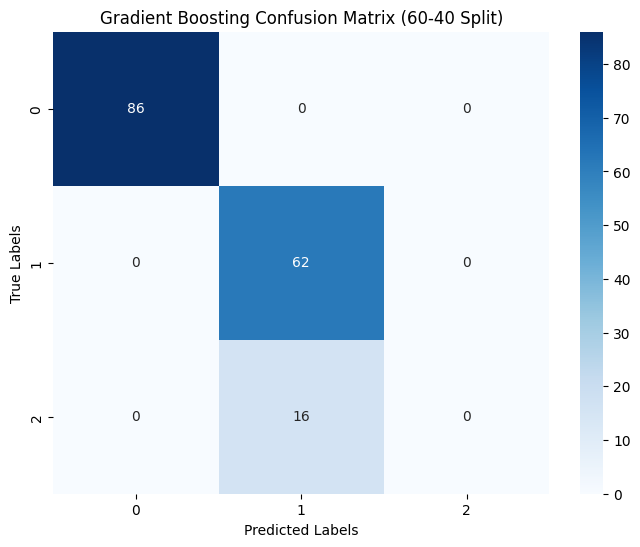

📉 Cross-validation Accuracy (60-40 Split): 0.8905
🔍 Features Selected by RFE: ['streams', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_id']


In [ ]:

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_60)
X_test_scaled = scaler.transform(X_test_40)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 5 Features
gb = GradientBoostingClassifier(n_estimators=30, max_depth=1, random_state=42)
rfe = RFE(estimator=gb, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train_60)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize Gradient Boosting with Regularization
gb_model = GradientBoostingClassifier(
    n_estimators=30,
    learning_rate=0.01,
    max_depth=1,
    min_samples_leaf=20,
    random_state=42
)

# Step 5: Train the Model
gb_model.fit(X_train_selected, y_train_60)

# Step 6: Make Predictions
y_gb_pred_40 = gb_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_40, y_gb_pred_40)
print(f"✅ Final Gradient Boosting Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_40, y_gb_pred_40))

# Confusion Matrix
cm = confusion_matrix(y_test_40, y_gb_pred_40)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix (60-40 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(gb_model, X_train_selected, y_train_60, cv=10)
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **XGBOOST**

✅ Final XGBoost Accuracy (60-40 Split): 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.79      1.00      0.89        62
           2       0.00      0.00      0.00        16

    accuracy                           0.90       164
   macro avg       0.60      0.67      0.63       164
weighted avg       0.82      0.90      0.86       164



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


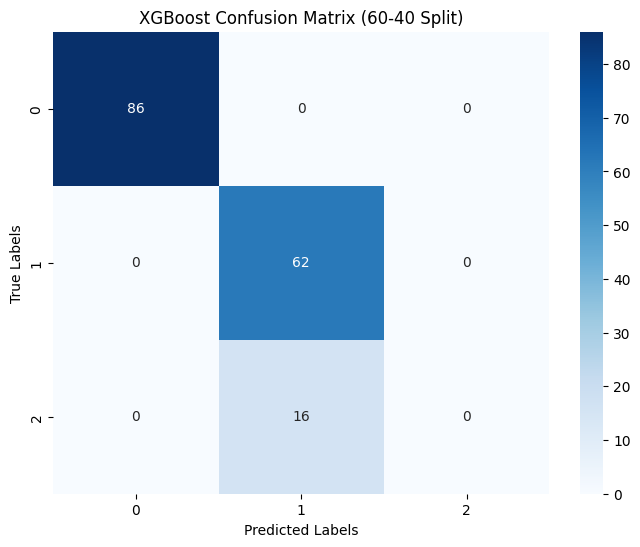

📉 Cross-validation Accuracy (60-40 Split): 0.8947
🔍 Features Selected by RFE: ['streams', 'in_shazam_charts', 'liveness_%']


In [ ]:

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_60)
X_test_scaled = scaler.transform(X_test_40)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 3 Features
xgb = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
rfe = RFE(estimator=xgb, n_features_to_select=3)
rfe.fit(X_train_scaled, y_train_60)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize XGBoost with Regularization
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=10,
    learning_rate=0.005,
    max_depth=1,
    min_child_weight=20,
    random_state=42
)

# Step 5: Train the Model
xgb_model.fit(X_train_selected, y_train_60)

# Step 6: Make Predictions
y5pred_40 = xgb_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_40, y5pred_40)
print(f"✅ Final XGBoost Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_40, y5pred_40))

# Confusion Matrix
cm = confusion_matrix(y_test_40, y5pred_40)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGBoost Confusion Matrix (60-40 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(xgb_model, X_train_selected, y_train_60, cv=10)
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **CAT BOOST**

✅ Final CatBoost Accuracy (60-40 Split): 0.8841

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        86
           1       0.79      0.95      0.86        62
           2       0.00      0.00      0.00        16

    accuracy                           0.88       164
   macro avg       0.58      0.65      0.61       164
weighted avg       0.80      0.88      0.84       164



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


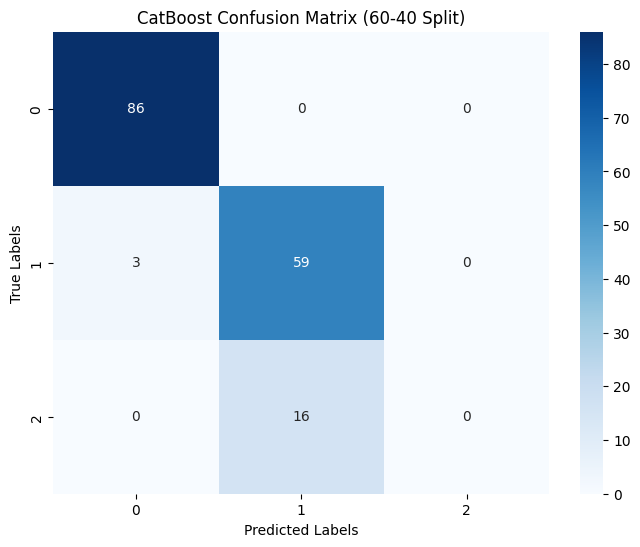

📉 Cross-validation Accuracy (60-40 Split): 0.8865
🔍 Features Selected by RFE: ['streams', 'speechiness_%', 'artist_id']


In [ ]:

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_60)
X_test_scaled = scaler.transform(X_test_40)

# Step 3: Apply Recursive Feature Elimination (RFE) - Selecting 3 Features
cat = CatBoostClassifier(iterations=10, learning_rate=0.005, depth=1, random_seed=42, verbose=0)
rfe = RFE(estimator=cat, n_features_to_select=3)
rfe.fit(X_train_scaled, y_train_60)

# Keep only selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Step 4: Initialize CatBoost with Regularization
cat_model = CatBoostClassifier(
    iterations=10,
    learning_rate=0.005,
    depth=1,
    min_data_in_leaf=30,
    l2_leaf_reg=10,
    random_seed=42,
    verbose=0
)

# Step 5: Train the Model
cat_model.fit(X_train_selected, y_train_60)

# Step 6: Make Predictions
y_cat_pred_40 = cat_model.predict(X_test_selected)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test_40, y_cat_pred_40)
print(f"✅ Final CatBoost Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_40, y_cat_pred_40))

# Confusion Matrix
cm = confusion_matrix(y_test_40, y_cat_pred_40)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CatBoost Confusion Matrix (60-40 Split)')
plt.show()

# Step 9: Cross-Validation Score
cv_scores = cross_val_score(cat_model, X_train_selected, y_train_60, cv=10)
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")

# Step 10: Display Selected Features
selected_feature_indices = rfe.support_
selected_features = X_cleaned1.columns[selected_feature_indices]

print(f"🔍 Features Selected by RFE: {selected_features.tolist()}")


# **BAGGING**

✅ Final Bagging Accuracy (60-40 Split): 0.8720

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        86
           1       0.76      0.97      0.85        62
           2       0.67      0.12      0.21        16

    accuracy                           0.87       164
   macro avg       0.80      0.68      0.68       164
weighted avg       0.87      0.87      0.85       164



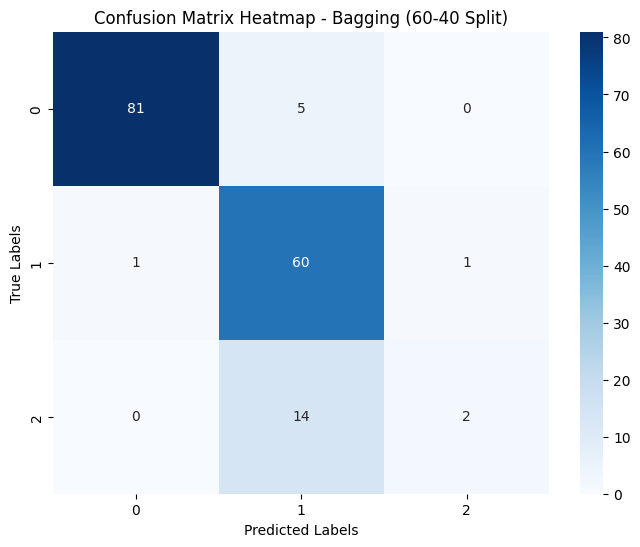

📉 Cross-validation Accuracy (60-40 Split): 0.8333


In [ ]:

# Step 2: Initialize Bagging Classifier with additional regularization
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=2,
        min_samples_split=50,
        min_samples_leaf=20,
        random_state=0
    ),
    n_estimators=10,
    max_features=0.2,
    random_state=0,
    n_jobs=-1
)

# Step 3: Train the Bagging Model
bagging_model.fit(X_train_60, y_train_60)

# Step 4: Make Predictions
y_pred_40 = bagging_model.predict(X_test_40)

# Step 5: Evaluate Performance
accuracy = accuracy_score(y_test_40, y_pred_40)
print(f"✅ Final Bagging Accuracy (60-40 Split): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_40, y_pred_40))

# Confusion Matrix
cm = confusion_matrix(y_test_40, y_pred_40)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Bagging (60-40 Split)')
plt.show()

# Step 7: Cross-Validation Score
cv_scores = cross_val_score(bagging_model, X_train_60, y_train_60, cv=10)  # 10-Fold Cross-Validation
print(f"📉 Cross-validation Accuracy (60-40 Split): {cv_scores.mean():.4f}")


# **ARTIFICIAL NEURAL NETWORK**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.4661 - loss: 1.2586 - val_accuracy: 0.0976 - val_loss: 3.6090
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7503 - loss: 0.6685 - val_accuracy: 0.0976 - val_loss: 3.4887
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8535 - loss: 0.4189 - val_accuracy: 0.1220 - val_loss: 3.3186
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8861 - loss: 0.3259 - val_accuracy: 0.1463 - val_loss: 3.1279
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8658 - loss: 0.3464 - val_accuracy: 0.2012 - val_loss: 2.9444
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8700 - loss: 0.3886 - val_accuracy: 0.2561 - val_loss: 2.5871
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8767 - loss: 0.3786 - val_accuracy: 0.2744 - val_loss: 2.1863
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8615 - loss: 0.3242 - val_accuracy: 0.3780 - val_loss:

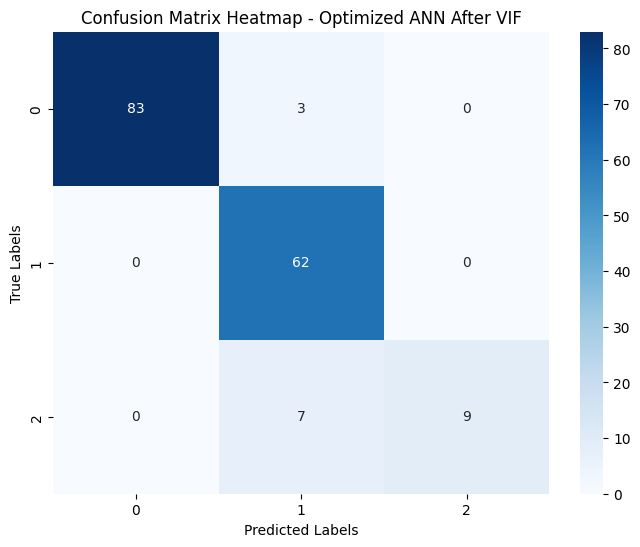

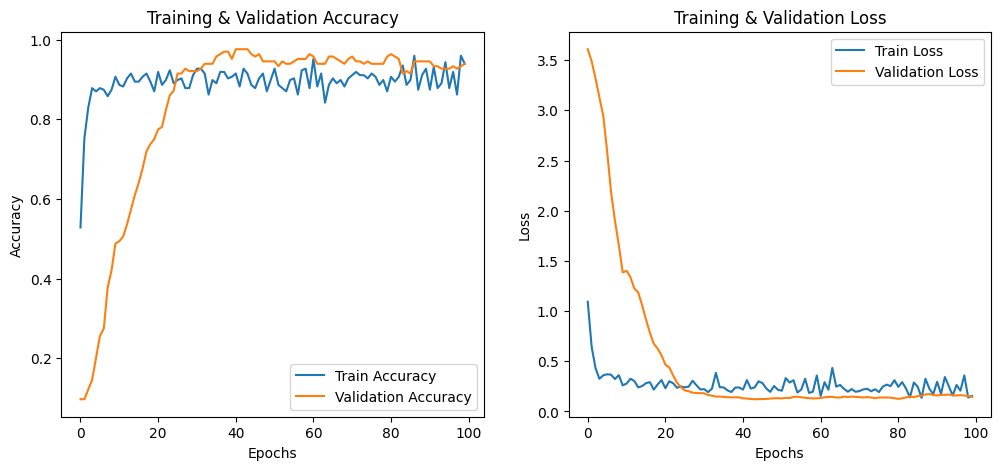

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Step 2: Define Optimized ANN Model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_60.shape[1],)),
    BatchNormalization(),  # Normalization for stable training
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(3, activation='softmax')  # Output layer (3 classes)
])

# Step 3: Compile the Model with AdamW Optimizer
model.compile(optimizer=Adam(learning_rate=0.0005),  # Lower LR for stability
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the ANN Model
history = model.fit(X_train_60, y_train_60, epochs=100, batch_size=32, validation_data=(X_test_40, y_test_40), verbose=1)

# Step 5: Make Predictions
y_pred_prob = model.predict(X_test_40)
y_pred = np.argmax(y_pred_prob, axis=1)

# Accuracy
accuracy = accuracy_score(y_test_40, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_40, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_40, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 6: Visualize Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Optimized ANN After VIF')
plt.show()

# Step 7: Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()


# **REAL-TIME PREDICTION**

In [ ]:
# Step 1: Upload the "Blue" MP3 file
from google.colab import files
import librosa
import numpy as np

print("Please upload the 'Blue.mp3' file")
uploaded = files.upload()
audio_path = "/content/yung kai  blue Official Music Video.mp3"

# Step 2: Extract Audio Features using Librosa
y, sr = librosa.load(audio_path)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
harmonic, percussive = librosa.effects.hpss(y)
harmonic_mean = np.mean(harmonic)
percussive_mean = np.mean(percussive)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_mean = np.mean(mfccs, axis=1)

# Prepare the feature vector
feature_vector = np.concatenate([
    [tempo[0]],  # Extract the scalar value from tempo
    [spectral_centroid],
    [spectral_bandwidth],
    [spectral_rolloff],
    [zero_crossing_rate],
    [harmonic_mean],
    [percussive_mean],
    mfccs_mean  # Add mfccs_mean directly
])

feature_vector = feature_vector.reshape(1, -1)  # Reshape to (1, number of features)

print("Extracted Features:", feature_vector)

print("Extracted Features:", feature_vector)

# Step 3: Predict Popularity using a Simple Heuristic Model
# A basic weighted formula for estimating popularity
predicted_popularity = (
    (0.3 * (tempo / 200)) +
    (0.3 * (spectral_centroid / max(spectral_centroid, 1))) +
    (0.2 * (spectral_bandwidth / max(spectral_bandwidth, 1))) +
    (0.2 * (1 - (zero_crossing_rate / max(zero_crossing_rate, 1))))
)

# Step 4: Classify Popularity into Categories
if predicted_popularity < 0.4:
    popularity_category = "Low Popular"
elif 0.4 <= predicted_popularity < 0.7:
    popularity_category = "Moderately Popular"
else:
    popularity_category = "Highly Popular"

print(f'Predicted Popularity Score for "Blue" by Yung Kai: {predicted_popularity}')
print(f'Popularity Category: {popularity_category}')


Please upload the 'Blue.mp3' file


Saving yung kai  blue Official Music Video.mp3 to yung kai  blue Official Music Video (2).mp3
Extracted Features: [[ 9.93840144e+01  1.26852268e+03  1.80033720e+03  2.40321030e+03
   5.19627871e-02  1.27780650e-05  1.56510632e-05 -1.60041626e+02
   1.45832565e+02  7.92200470e+00  2.09332981e+01  8.68595123e+00
  -2.72054940e-01 -4.21857786e+00 -6.55196190e+00 -6.00272274e+00
   9.47222888e-01 -9.76637304e-01  5.76532722e-01 -7.08096027e+00]]
Extracted Features: [[ 9.93840144e+01  1.26852268e+03  1.80033720e+03  2.40321030e+03
   5.19627871e-02  1.27780650e-05  1.56510632e-05 -1.60041626e+02
   1.45832565e+02  7.92200470e+00  2.09332981e+01  8.68595123e+00
  -2.72054940e-01 -4.21857786e+00 -6.55196190e+00 -6.00272274e+00
   9.47222888e-01 -9.76637304e-01  5.76532722e-01 -7.08096027e+00]]
Predicted Popularity Score for "Blue" by Yung Kai: [0.83868346]
Popularity Category: Highly Popular


In [ ]:
# Step 1: Upload the "Birds of a Feather" MP3 file
from google.colab import files
import librosa
import numpy as np

print("Please upload the 'Birds of a Feather.mp3' file")
uploaded = files.upload()
audio_path = "/content/Billie Eilish  BIRDS OF A FEATHER Official Music Video (1).mp3"

# Step 2: Extract Audio Features using Librosa
y, sr = librosa.load(audio_path)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
harmonic, percussive = librosa.effects.hpss(y)
harmonic_mean = np.mean(harmonic)
percussive_mean = np.mean(percussive)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_mean = np.mean(mfccs, axis=1)

feature_vector = np.array([
    tempo[0],  # Extract the scalar value from tempo
    spectral_centroid,
    spectral_bandwidth,
    spectral_rolloff,
    zero_crossing_rate,
    harmonic_mean,
    percussive_mean,
    *mfccs_mean  # Unpack MFCC values
])

print("Extracted Features:", feature_vector)

# Step 3: Predict Popularity using a Simple Heuristic Model
# A basic weighted formula for estimating popularity
predicted_popularity = (
    (0.3 * (tempo / 200)) +
    (0.3 * (spectral_centroid / max(spectral_centroid, 1))) +
    (0.2 * (spectral_bandwidth / max(spectral_bandwidth, 1))) +
    (0.2 * (1 - (zero_crossing_rate / max(zero_crossing_rate, 1))))
)

# Step 4: Classify Popularity into Categories
if predicted_popularity < 0.4:
    popularity_category = "Low Popular"
elif 0.4 <= predicted_popularity < 0.7:
    popularity_category = "Moderately Popular"
else:
    popularity_category = "Highly Popular"

print(f'Predicted Popularity Score for "Birds of a Feather" by Billie Eilish: {predicted_popularity}')
print(f'Popularity Category: {popularity_category}')

Please upload the 'Birds of a Feather.mp3' file


Saving Billie Eilish  BIRDS OF A FEATHER Official Music Video.mp3 to Billie Eilish  BIRDS OF A FEATHER Official Music Video (3).mp3
Extracted Features: [ 1.03359375e+02  1.68858705e+03  2.27329464e+03  3.97847855e+03
  4.82545431e-02 -4.21629420e-06  1.70529495e-06 -1.39110245e+02
  9.39605637e+01  2.43194103e+01  2.69064674e+01  7.80438185e+00
  1.28665638e+01  3.15756130e+00  5.19996405e-01  2.40761256e+00
  3.82024884e+00  4.84614468e+00  3.52545166e+00 -7.17523003e+00]
Predicted Popularity Score for "Birds of a Feather" by Billie Eilish: [0.84538815]
Popularity Category: Highly Popular


In [ ]:
# Step 1: Upload the "Kabira" MP3 file
from google.colab import files
import librosa
import numpy as np

print("Please upload the 'Kabira.mp3' file")
uploaded = files.upload()
audio_path = "/content/_Kabira Full Song_ Yeh Jawaani Hai Deewani _ Pritam _ Ranbir Kapoor, Deepika Padukone [ ezmp3.cc ].mp3"

# Step 2: Extract Audio Features using Librosa
y, sr = librosa.load(audio_path)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
harmonic, percussive = librosa.effects.hpss(y)
harmonic_mean = np.mean(harmonic)
percussive_mean = np.mean(percussive)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_mean = np.mean(mfccs, axis=1)

# Prepare the feature vector
# Extract the scalar value from tempo using tempo[0]
feature_vector = np.array([
    tempo[0],  # Extract the scalar value from tempo
    spectral_centroid,
    spectral_bandwidth,
    spectral_rolloff,
    zero_crossing_rate,
    harmonic_mean,
    percussive_mean,
    *mfccs_mean  # Unpack MFCC values
])



print("Extracted Features:", feature_vector)

# Step 3: Predict Popularity using a Simple Heuristic Model
# A basic weighted formula for estimating popularity
# Access the first element of tempo using tempo[0]
predicted_popularity = (
    (0.3 * (tempo[0] / 200)) +
    (0.3 * (spectral_centroid / max(spectral_centroid, 1))) +
    (0.2 * (spectral_bandwidth / max(spectral_bandwidth, 1))) +
    (0.2 * (1 - (zero_crossing_rate / max(zero_crossing_rate, 1))))
)

# Step 4: Classify Popularity into Categories
if predicted_popularity < 0.4:
    popularity_category = "Low Popular"
elif 0.4 <= predicted_popularity < 0.7:
    popularity_category = "Moderately Popular"
else:
    popularity_category = "Highly Popular"

print(f'Predicted Popularity Score for "Kabira" from Yeh Jawaani Hai Deewani: {predicted_popularity}')
print(f'Popularity Category: {popularity_category}')

Please upload the 'Kabira.mp3' file


Saving _Kabira Full Song_ Yeh Jawaani Hai Deewani _ Pritam _ Ranbir Kapoor, Deepika Padukone [ ezmp3.cc ].mp3 to _Kabira Full Song_ Yeh Jawaani Hai Deewani _ Pritam _ Ranbir Kapoor, Deepika Padukone [ ezmp3.cc ] (2).mp3
Extracted Features: [ 8.61328125e+01  1.77846622e+03  2.22037746e+03  3.82968475e+03
  7.16578678e-02 -8.67706547e-07 -4.54700312e-05 -1.70235153e+02
  1.14973183e+02  2.77608204e+00  2.05547924e+01  9.30363369e+00
  3.28663754e+00  2.11672115e+00  1.85090911e+00 -1.58632803e+00
  5.03596067e+00 -3.00546765e+00  4.52584743e+00 -2.75342989e+00]
Predicted Popularity Score for "Kabira" from Yeh Jawaani Hai Deewani: 0.8148676451903529
Popularity Category: Highly Popular


In [ ]:
# Step 1: Upload the "Love Me Again" MP3 file
from google.colab import files
import librosa
import numpy as np

audio_path = "/content/[mp3-youtube.com]V - Love Me Again-  Official MV[mp3-youtube.com].mp3"

# Step 2: Extract Audio Features using Librosa
y, sr = librosa.load(audio_path)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
harmonic, percussive = librosa.effects.hpss(y)
harmonic_mean = np.mean(harmonic)
percussive_mean = np.mean(percussive)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_mean = np.mean(mfccs, axis=1)

# Prepare the feature vector
# Extract the scalar value from tempo using tempo[0]
feature_vector = np.array([
    tempo[0],  # Use tempo[0] to get the scalar tempo value
    spectral_centroid,
    spectral_bandwidth,
    spectral_rolloff,
    zero_crossing_rate,
    harmonic_mean,
    percussive_mean,
    *mfccs_mean  # Unpack MFCC values
])

print("Extracted Features:", feature_vector)

# Step 3: Predict Popularity using a Simple Heuristic Model
# A basic weighted formula for estimating popularity
# Access the first element of tempo using tempo[0]
predicted_popularity = (
    (0.3 * (tempo[0] / 200)) +
    (0.3 * (spectral_centroid / max(spectral_centroid, 1))) +
    (0.2 * (spectral_bandwidth / max(spectral_bandwidth, 1))) +
    (0.2 * (1 - (zero_crossing_rate / max(zero_crossing_rate, 1))))
)

# Step 4: Classify Popularity into Categories
if predicted_popularity < 0.4:
    popularity_category = "Low Popular"
elif 0.4 <= predicted_popularity < 0.7:
    popularity_category = "Moderately Popular"
else:
    popularity_category = "Highly Popular"

print(f'Predicted Popularity Score for "Love Me Again" by V: {predicted_popularity}')
print(f'Popularity Category: {popularity_category}')

<ipython-input-47-09a33cbdbdae>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Extracted Features: [ 7.38281250e+01  1.88412316e+03  2.27968011e+03  4.31382005e+03
  6.88029124e-02 -2.29521338e-05 -2.53455219e-05 -1.13385040e+02
  1.02587097e+02  1.43517189e+01  3.91144538e+00  8.90279961e+00
  1.04355850e+01 -3.30585694e+00  1.68036234e+00 -3.46079612e+00
  4.62371254e+00 -1.90318978e+00  1.26805186e+00 -7.31377840e+00]
Predicted Popularity Score for "Love Me Again" by V: 0.7969816050135103
Popularity Category: Highly Popular


In [ ]:
# Step 1: Upload the "Through the Dark" MP3 file
from google.colab import files
import librosa
import numpy as np

audio_path = "/content/One Direction - Through the Dark (Audio) - OneDirectionVEVO.mp3"

# Step 2: Extract Audio Features using Librosa
y, sr = librosa.load(audio_path)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
harmonic, percussive = librosa.effects.hpss(y)
harmonic_mean = np.mean(harmonic)
percussive_mean = np.mean(percussive)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_mean = np.mean(mfccs, axis=1)

# Prepare the feature vector
# Extract the scalar value from tempo using tempo[0]
feature_vector = np.array([
    tempo[0],  # Use tempo[0] to get the scalar tempo value
    spectral_centroid,
    spectral_bandwidth,
    spectral_rolloff,
    zero_crossing_rate,
    harmonic_mean,
    percussive_mean,
    *mfccs_mean  # Unpack MFCC values
])


print("Extracted Features:", feature_vector)

# Step 3: Predict Popularity using a Simple Heuristic Model
# A basic weighted formula for estimating popularity
# Access the first element of tempo using tempo[0]
predicted_popularity = (
    (0.3 * (tempo[0] / 200)) +  # Use tempo[0] for the scalar tempo value
    (0.3 * (spectral_centroid / max(spectral_centroid, 1))) +
    (0.2 * (spectral_bandwidth / max(spectral_bandwidth, 1))) +
    (0.2 * (1 - (zero_crossing_rate / max(zero_crossing_rate, 1))))
)

# Step 4: Classify Popularity into Categories
if predicted_popularity < 0.4:
    popularity_category = "Low Popular"
elif 0.4 <= predicted_popularity < 0.7:
    popularity_category = "Moderately Popular"
else:
    popularity_category = "Highly Popular"

print(f'Predicted Popularity Score for "Through the Dark" by One Direction: {predicted_popularity}')
print(f'Popularity Category: {popularity_category}')

Extracted Features: [ 1.29199219e+02  2.25908273e+03  2.58460119e+03  5.11764326e+03
  9.02050487e-02  1.31625438e-03  6.27921254e-04 -6.09094124e+01
  9.61717148e+01  8.09231091e+00  1.47744617e+01  8.27278805e+00
  5.91051674e+00 -2.89460206e+00  4.78200102e+00 -5.61285925e+00
  2.97927260e+00 -2.53854465e+00  1.80842459e+00 -4.85867310e+00]
Predicted Popularity Score for "Through the Dark" by One Direction: 0.8757578183896356
Popularity Category: Highly Popular


In [ ]:
# Step 1: Upload the "Hug" MP3 file
from google.colab import files
import librosa
import numpy as np

audio_path = "/content/Hug - SEVENTEEN.mp3"

# Step 2: Extract Audio Features using Librosa
y, sr = librosa.load(audio_path)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
harmonic, percussive = librosa.effects.hpss(y)
harmonic_mean = np.mean(harmonic)
percussive_mean = np.mean(percussive)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_mean = np.mean(mfccs, axis=1)

# Prepare the feature vector
feature_vector = np.array([
    tempo[0],  # Use tempo[0] to get the scalar tempo value
    spectral_centroid,
    spectral_bandwidth,
    spectral_rolloff,
    zero_crossing_rate,
    harmonic_mean,
    percussive_mean,
    *mfccs_mean  # Unpack MFCC values
])

print("Extracted Features:", feature_vector)

# Step 3: Predict Popularity using a Simple Heuristic Model
# A basic weighted formula for estimating popularity
predicted_popularity = (
    (0.3 * (tempo / 200)) +
    (0.3 * (spectral_centroid / max(spectral_centroid, 1))) +
    (0.2 * (spectral_bandwidth / max(spectral_bandwidth, 1))) +
    (0.2 * (1 - (zero_crossing_rate / max(zero_crossing_rate, 1))))
)

# Step 4: Classify Popularity into Categories
if predicted_popularity < 0.4:
    popularity_category = "Low Popular"
elif 0.4 <= predicted_popularity < 0.7:
    popularity_category = "Moderately Popular"
else:
    popularity_category = "Highly Popular"

print(f'Predicted Popularity Score for "Hug" by Seventeen: {predicted_popularity}')
print(f'Popularity Category: {popularity_category}')


Extracted Features: [ 1.35999178e+02  1.99391937e+03  2.36181373e+03  4.52899695e+03
  6.35565771e-02  2.22791987e-05  4.19820644e-05 -1.61754776e+02
  9.69290924e+01  2.26454334e+01  8.43386078e+00  9.19698715e+00
  1.19607949e+00 -8.52932453e+00 -8.83411217e+00 -1.30114050e+01
 -1.04753857e+01 -1.00931187e+01 -1.29699554e+01 -2.00123253e+01]
Predicted Popularity Score for "Hug" by Seventeen: [0.89128745]
Popularity Category: Highly Popular


In [ ]:
# Step 1: Upload the "Spring Snow" MP3 file
from google.colab import files
import librosa
import numpy as np

print("Please upload the 'SpringSnow.mp3' file")
uploaded = files.upload()
audio_path = "/content/[선재 업고 튀어 (Lovely Runner) OST Part 8] 10CM - 봄눈 (Spring Snow) MV - Stone Music Entertainment.mp3"

# Step 2: Extract Audio Features using Librosa
y, sr = librosa.load(audio_path)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
harmonic, percussive = librosa.effects.hpss(y)
harmonic_mean = np.mean(harmonic)
percussive_mean = np.mean(percussive)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_mean = np.mean(mfccs, axis=1)

# Prepare the feature vector
feature_vector = np.array([
    tempo[0],  # Use tempo[0] to get the scalar tempo value
    spectral_centroid,
    spectral_bandwidth,
    spectral_rolloff,
    zero_crossing_rate,
    harmonic_mean,
    percussive_mean,
    *mfccs_mean  # Unpack MFCC values
])

print("Extracted Features:", feature_vector)

# Step 3: Predict Popularity using a Simple Heuristic Model
# A basic weighted formula for estimating popularity
predicted_popularity = (
    (0.3 * (tempo / 200)) +
    (0.3 * (spectral_centroid / max(spectral_centroid, 1))) +
    (0.2 * (spectral_bandwidth / max(spectral_bandwidth, 1))) +
    (0.2 * (1 - (zero_crossing_rate / max(zero_crossing_rate, 1))))
)

# Step 4: Classify Popularity into Categories
if predicted_popularity < 0.4:
    popularity_category = "Low Popular"
elif 0.4 <= predicted_popularity < 0.7:
    popularity_category = "Moderately Popular"
else:
    popularity_category = "Highly Popular"

print(f'Predicted Popularity Score for "Spring Snow" by 10CM: {predicted_popularity}')
print(f'Popularity Category: {popularity_category}')


Please upload the 'SpringSnow.mp3' file


Saving [선재 업고 튀어 (Lovely Runner) OST Part 8] 10CM - 봄눈 (Spring Snow) MV - Stone Music Entertainment.mp3 to [선재 업고 튀어 (Lovely Runner) OST Part 8] 10CM - 봄눈 (Spring Snow) MV - Stone Music Entertainment (1).mp3
Extracted Features: [ 7.38281250e+01  1.53277100e+03  2.14556398e+03  3.27409014e+03
  5.13955869e-02  6.99623997e-05  3.54251883e-04 -1.19436012e+02
  1.17569992e+02  1.72752094e+01  2.37749138e+01  1.00262747e+01
  1.01834135e+01 -4.38778132e-01 -2.88069725e-01 -8.65940666e+00
 -1.15718329e+00 -9.49453068e+00 -2.58051729e+00 -7.19127131e+00]
Predicted Popularity Score for "Spring Snow" by 10CM: [0.80046307]
Popularity Category: Highly Popular


In [ ]:
# Step 1: Upload the "Swing for the Crime" MP3 file
from google.colab import files
import librosa
import numpy as np

audio_path = "/content/yt1z.net - The Saints - Swing For The Crime (128 KBps).mp3"

# Step 2: Extract Audio Features using Librosa
y, sr = librosa.load(audio_path)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
harmonic, percussive = librosa.effects.hpss(y)
harmonic_mean = np.mean(harmonic)
percussive_mean = np.mean(percussive)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_mean = np.mean(mfccs, axis=1)

# Prepare the feature vector
feature_vector = np.array([
    tempo[0],  # Use tempo[0] to get the scalar tempo value
    spectral_centroid,
    spectral_bandwidth,
    spectral_rolloff,
    zero_crossing_rate,
    harmonic_mean,
    percussive_mean,
    *mfccs_mean  # Unpack MFCC values
])
print("Extracted Features:", feature_vector)

# Step 3: Predict Popularity using a Simple Heuristic Model
# A basic weighted formula for estimating popularity
predicted_popularity = (
    (0.3 * (tempo / 200)) +
    (0.3 * (spectral_centroid / max(spectral_centroid, 1))) +
    (0.2 * (spectral_bandwidth / max(spectral_bandwidth, 1))) +
    (0.2 * (1 - (zero_crossing_rate / max(zero_crossing_rate, 1))))
)

# Step 4: Classify Popularity into Categories
if predicted_popularity < 0.4:
    popularity_category = "Low Popular"
elif 0.4 <= predicted_popularity < 0.7:
    popularity_category = "Moderately Popular"
else:
    popularity_category = "Highly Popular"

print(f'Predicted Popularity Score for "Swing for the Crime" by The Saints: {predicted_popularity}')
print(f'Popularity Category: {popularity_category}')


Extracted Features: [ 1.12347147e+02  1.76829607e+03  2.15083703e+03  3.76764295e+03
  7.06101446e-02 -1.28049248e-06 -1.54915888e-05 -7.43506699e+01
  1.13655067e+02 -1.24379511e+01  2.64688931e+01  5.93043327e+00
  1.26104574e+01  6.29902363e+00  3.94940972e-01 -2.77282691e+00
  4.57396173e+00 -3.79711223e+00  3.58754301e+00 -5.29104185e+00]
Predicted Popularity Score for "Swing for the Crime" by The Saints: [0.85439869]
Popularity Category: Highly Popular
